Project description:

The credit dataset is provided by Home Credit Group on Kaggle:
https://www.kaggle.com/competitions/home-credit-default-risk/overview

The workbook is divided into five section:
* Importing the data
* Define the preprocessing steps
* Define the classifiers used in the experiment
* Building the pipeline (by combining the definition in the previous two steps)
* Model training and tuning
* Model evaluation

This workbook build upon the work of the EDA performed in:
https://colab.research.google.com/drive/1-tPYsMyIGJWiXSGJi9nqbfjkbu075tmJ?usp=sharing
Only the general results of this EDA will be visualised in this notebook. For a more elaborate understanding of the dataset, please visit the link stated above.


# Importing dataset and combining tables
the original dataset source and problem description can be found on:
https://www.kaggle.com/competitions/home-credit-default-risk/overview


`

In [2]:
!pip install seaborn
!pip install -U scikit-learn==1.2.2 #dependency imblearn is not working for 1.3
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import os

In [4]:
# #mount drive
# from google.colab import drive
# drive.mount('/content/drive/')

define root folder for home credit data

In [5]:
# root_folder_path = r"C:\Users\bjorn\OneDrive - University of Twente\School\$12th_module\experiment"

In [6]:
# os.chdir(root_folder_path)

In [7]:
os.getcwd()

'/home/jovyan'

In [8]:
#root_data_path = "/content/drive/MyDrive/ColabNotebooks/home-credit-default-risk"

In [9]:
RAW_application_train_dataset = pd.read_csv("application_train.csv")
# RAW_application_test_dataset = pd.read_csv("application_test.csv")
# RAW_bureau_dataset = pd.read_csv(root_data_path + "/bureau.csv")
# RAW_bureau_balance_dataset = pd.read_csv(root_data_path + "/bureau_balance.csv")
# RAW_pos_cash_balance_dataset = pd.read_csv(root_data_path + "/POS_CASH_balance.csv")
# RAW_credit_card_balance_dataset = pd.read_csv(root_data_path + "/credit_card_balance.csv")
# RAW_previous_application_dataset = pd.read_csv(root_data_path + "/previous_application.csv")
# RAW_installments_payments_dataset = pd.read_csv(root_data_path + "/installments_payments.csv")

In [10]:
#!pip freeze

In [11]:
#!python -m pip uninstall pycodestyle --yes

In [12]:
# all_raw_datasets = [RAW_application_train_dataset, RAW_application_test_dataset, RAW_bureau_dataset, RAW_bureau_balance_dataset, RAW_pos_cash_balance_dataset, RAW_credit_card_balance_dataset, RAW_previous_application_dataset, RAW_installments_payments_dataset]

### Combining multiple tables into one
The information from all tables with be combined into one used for the machine learning training process

In [13]:
#Question how does combining the table help when you are evaluating the test set.
#Since the test set does not have this additional information
#or do you then also add that information to the main test table?
#Is there not a specific data leakage in that case?
#No don't think so because these are probably different customers

#TEMP
combined_train_dataset = RAW_application_train_dataset
# combined_test_dataset= RAW_application_test_dataset

In [14]:
# short overview of the dataset (for a more elaberate overview see the EDA notebook)
# with pd.option_context('display.max_columns', None):
pd.set_option('display.max_columns', None)
combined_train_dataset

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0           100002       1         Cash loans           M            N  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
0                    Y             0          202500.0    406597.5  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE   
0           24700.5         351000.0   Unaccompanied               Working  \
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS   
0       Secondary / secondary special  Single / not married  \
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH   
0       House / apartment                    0.018801       -9461  \
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

##Define the types of the columns

In [15]:
    #all the target features
    target_features = ['TARGET']

    #the input features are seperated into nominal, ordinal, interval and continuous
    # NOMINAL
    # NOTE: THE FOLLOWING THREE 'MODE' ARE CATEGORICAL DATA, BUT HAVE BEEN MISLABBELED
    # AS MODE
    # - FONDKAPREMONT_MODE
    # - HOUSETYPE_MODE
    # - WALLSMATERIAL_MODE
    # - EMERGENCYSTATE_MODE
    RAW_nominal_application_features = [
        'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 
        'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
        'FLAG_DOCUMENT_2',	'FLAG_DOCUMENT_3',	'FLAG_DOCUMENT_4',	'FLAG_DOCUMENT_5',	'FLAG_DOCUMENT_6'	,
        'FLAG_DOCUMENT_7',	'FLAG_DOCUMENT_8',	'FLAG_DOCUMENT_9',	'FLAG_DOCUMENT_10',	'FLAG_DOCUMENT_11',	
        'FLAG_DOCUMENT_12',	'FLAG_DOCUMENT_13',	'FLAG_DOCUMENT_14',	'FLAG_DOCUMENT_15',	'FLAG_DOCUMENT_16',
        'FLAG_DOCUMENT_17',	'FLAG_DOCUMENT_18',	'FLAG_DOCUMENT_19',	'FLAG_DOCUMENT_20',	'FLAG_DOCUMENT_21', 
        'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
    ]
    # ORDINAL
    RAW_ordinal_application_features = ['NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

    # INTERVAL
    RAW_int_application_features = [
        'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
        'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
        'OBS_30_CNT_SOCIAL_CIRCLE',	'DEF_30_CNT_SOCIAL_CIRCLE',	'OBS_60_CNT_SOCIAL_CIRCLE',	
        'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',	
        'AMT_REQ_CREDIT_BUREAU_DAY',	'AMT_REQ_CREDIT_BUREAU_WEEK',	'AMT_REQ_CREDIT_BUREAU_MON',	
        'AMT_REQ_CREDIT_BUREAU_QRT',	'AMT_REQ_CREDIT_BUREAU_YEAR'
    ]
    # CONTINUOUS
    RAW_float_application_features = [
        'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
        'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 
        'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG', 
        'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
        'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
        'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
        'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 
        'FLOORSMIN_MODE',	'LANDAREA_MODE',	'LIVINGAPARTMENTS_MODE',	'LIVINGAREA_MODE',	'NONLIVINGAPARTMENTS_MODE',
        'NONLIVINGAREA_MODE',	'APARTMENTS_MEDI',	'BASEMENTAREA_MEDI',	'YEARS_BEGINEXPLUATATION_MEDI',	'YEARS_BUILD_MEDI',
        'COMMONAREA_MEDI',	'ELEVATORS_MEDI',	'ENTRANCES_MEDI',	'FLOORSMAX_MEDI',	'FLOORSMIN_MEDI',	'LANDAREA_MEDI',
        'LIVINGAPARTMENTS_MEDI',	'LIVINGAREA_MEDI',	'NONLIVINGAPARTMENTS_MEDI',	'NONLIVINGAREA_MEDI',	
        'TOTALAREA_MODE'
    ]
    
    RAW_education_categories_ordered = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']
    RAW_ordinal_application_features_grouped_order_info = [
        {"columnName": 'NAME_EDUCATION_TYPE', "categories": RAW_education_categories_ordered},
        {"columnName": 'REGION_RATING_CLIENT', "categories": [1,2,3]}, 
        {"columnName": 'REGION_RATING_CLIENT_W_CITY', "categories": [1,2,3]}
    ]

In [16]:
def changeColTypesOfDataframe(raw_data, LOCAL_nominal_application_features, LOCAL_ordinal_application_features_grouped_order_info):

    #import categorical dtype
    from pandas.api.types import CategoricalDtype
    #after reading in the data, the data should be labbeled correctly
    #https://books.google.nl/books?hl=en&lr=&id=F7zADwAAQBAJ&oi=fnd&pg=PP1&dq=Data+Science+and+Machine+Learning:+Mathematical+and+Statistical+Methods&ots=C_IlHtn8sH&sig=THDfZV5_uUtj3DeeapmZwydBHQM&redir_esc=y#v=onepage&q=Data%20Science%20and%20Machine%20Learning%3A%20Mathematical%20and%20Statistical%20Methods&f=false
    #see 1.2 of above book

    #NOTE MAYBE A BETTER SPLIT IS : NOMINAL, ORDINAL, INTERVAL AND RATIO
    #https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825
    
    cols = raw_data.columns

    dTypeMapping = {}
    for feature in LOCAL_nominal_application_features:
      if feature in cols:
        dTypeMapping[feature] = 'category'

    for feature in LOCAL_ordinal_application_features_grouped_order_info:
      if feature["columnName"] in cols:
        pandasOrdinalType =CategoricalDtype(categories=feature["categories"], ordered=True)
        dTypeMapping[feature["columnName"]] = pandasOrdinalType

    #the int and floats will be converted after the missing values have been handled
    return raw_data.astype(dTypeMapping)

In [17]:
combined_train_dataset_typed = changeColTypesOfDataframe(combined_train_dataset, RAW_nominal_application_features, RAW_ordinal_application_features_grouped_order_info)
# combined_test_dataset_typed = changeColTypesOfDataframe(combined_test_dataset, RAW_nominal_application_features, RAW_ordinal_application_features_grouped_order_info)

In [18]:
# combined_test_dataset_typed

## Dropping features based on prior correlation analysis

In [19]:
cat_features_dropped = ['ORGANIZATION_TYPE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT']
num_features_dropped = ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'LIVINGAPARTMENTS_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'LIVINGAREA_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'BASEMENTAREA_AVG', 'NONLIVINGAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'AMT_GOODS_PRICE', 'ELEVATORS_AVG', 'ENTRANCES_AVG']

all_features_dropped = [*cat_features_dropped, *num_features_dropped]
final_train_dataset_typed = combined_train_dataset_typed.drop(columns=all_features_dropped)
# final_test_dataset_typed = combined_test_dataset_typed.drop(columns=all_features_dropped)

In [20]:
print(len(cat_features_dropped) + len(num_features_dropped))
print(len(final_train_dataset_typed.columns))
print(len(combined_train_dataset.columns))
if len(cat_features_dropped) + len(num_features_dropped) + len(final_train_dataset_typed.columns) != len(combined_train_dataset.columns):
    raise Exception("something went wrong when dropping the columns")

34
88
122


In [21]:
#based on dropping these are the ordinal categories left in the dataframe
#the function used will not use colnames which are not specificied
#However this serves as a double safety measure

# def setGlobalCategories(education_categories_ordered, region_rating_ordered):
#   global ordinal_application_features_grouped_order_info
  # ordinal_application_features_grouped_order_info = [
  #     {"columnName": 'NAME_EDUCATION_TYPE', "categories": education_categories_ordered},
  #     {"columnName": 'REGION_RATING_CLIENT_W_CITY', "categories": region_rating_ordered}
  # ]

# def resetGlobalCategories():
#   setGlobalCategories(['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree'], [1,2,3])
  
# resetGlobalCategories()


## Splitting features/target
Note: The test data is already split from this dataset and provided in application_test.csv

In [22]:
#index 0 is the id and should not be included
#how to merge the data together?
#dropping the id for training (only needed for merging)
X = final_train_dataset_typed.drop(columns=['SK_ID_CURR', 'TARGET'])
y = final_train_dataset_typed['TARGET']

## Encoding categorical features for the model
it turns out this is not true for all models and to my surprise, random forest performed consistently worse for datasets with high cardinality categorical variables.
https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

With high cardanality categorical features OneHotEncoding and Numerical Encoding (aka Ordinal Encoding) tend to fall of quickly https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931


lightgbm:
Categorical Feature Support
- LightGBM offers good accuracy with integer-encoded categorical features. LightGBM applies Fisher (1958) to find the optimal split over categories as described here. This often performs better than one-hot encoding.

- Use categorical_feature to specify the categorical features. Refer to the parameter categorical_feature in Parameters.

- Categorical features will be cast to int32 (integer codes will be extracted from pandas categoricals in the Python-package) so they must be encoded as non-negative integers (negative values will be treated as missing) less than Int32.MaxValue (2147483647). It is best to use a contiguous range of integers started from zero. Floating point numbers in categorical features will be rounded towards 0.

- Use min_data_per_group, cat_smooth to deal with over-fitting (when #data is small or #category is large).

- For a categorical feature with high cardinality (#category is large), it often works best to treat the feature as numeric, either by simply ignoring the categorical interpretation of the integers or by embedding the categories in a low-dimensional numeric space.

https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html

In addition to faster execution time, LightGBM has another nice feature: We can use categorical features directly (without encoding) with LightGBM. However, a datatype conversion (object datatype → category datatype) is needed to do manually.
--> src https://towardsdatascience.com/can-lightgbm-outperform-xgboost-d05a94102a55

catboost:
But, this is not the case for CatBoost. We can directly use categorical features with CatBoost without encoding them. For this, we need to convert our data into CatBoost’s special Pool datatype by using the Pool() class. We also need to specify the names of categorical features in the cat_features parameter.
https://towardsdatascience.com/how-do-you-use-categorical-features-directly-with-catboost-947b211c2923

(from catboost docs) ==>
Warning
Do not use one-hot encoding during preprocessing. This affects both the training speed and the resulting quality.
src--> https://catboost.ai/en/docs/features/categorical-features


h2o random forest implementation:
sklearns random forest requires the data to be encoded numerical beforehand. h2o implementation does not require this.

but then the question becomes:
how do we apply the class_weights to the package. The package does have some weights_column=None, which can do that but i don't know if I can do it programmatically in the pipeline. --> also because of smote.


##Manual Feature engineering (skipped)
In this section new features will be created. The new features are based on the insight gained from the EDA.

The decision was made to only apply a power transform to the data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

###Adding additional features

In [23]:
#The dataset had an immense potential to be improved by skilled feature design. 
#We started with the simple things: computing the length of the loan, annuity relative to income, 
#down payment percent. We also computed, how often was the installment calendar rescheduled and 
#whether it was increased or reduced, whether loans were paid out in advance, how regularly the client took loans, 
#and overall loan burden on the client.

# The more recent history is more important, so we separately computed features for the recent history and for the previous years.
#https://blog.mooncascade.com/kaggle-credit-scoring-data-science-competition/


# Installment_payments.csv - aggregates for the last 2, 3, 5 payments. 
# Aggregates over NUM_INSTALMENT_NUMBER at 1, 2, 3, 4 installments. 
# Aggregates over last 60, 90, 180 & 365 days filtered on DAYS_INSTALMENT.
# I also did aggregates over all installments that were past due. Where past due was defined 
# as a 1 if the difference between DAYS_ENTRY_PAYMENT and DAYS_INSTALMENT was positive and 0 if not.

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           307511 non-null  category
 1   CODE_GENDER                  307511 non-null  category
 2   FLAG_OWN_CAR                 307511 non-null  category
 3   FLAG_OWN_REALTY              307511 non-null  category
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307499 non-null  float64 
 8   NAME_TYPE_SUITE              306219 non-null  category
 9   NAME_INCOME_TYPE             307511 non-null  category
 10  NAME_EDUCATION_TYPE          307511 non-null  category
 11  NAME_FAMILY_STATUS           307511 non-null  category
 12  NAME_HOUSING_TYPE            307511 non-null

# Data preprocessing
The data preprocessing contains multiple steps.
An important result regarding the characteristics of the dataset
* contains missing values (NOTE WHICH ROWS?)
* contains several nominal features (--> sparsity) (NOTE HOW MANY?)
* label imbalance (NOTE QUOTE THE RATIO)
* outliers (still need to be done)
The ML pipeline tries to mitigate the effect of these characteristics of the dataset. This workbook will focus on handling the imbalance. 

Specific, for data preprocessing imbalance with SMOTE, sparse by using MaxAbsScaler to retain sparsity while not making assumption about the type of underlying distribution, missing values will either by imputed per feature or the row will be removed. Outliers...

General data preprocessing steps:
src: https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825
* Data Quality Assessment
* Feature Aggregation
* Feature Sampling
* Dimensionality Reduction
* Feature Encoding

## Data cleaning
In this section the data will be cleaned by handling missing values and outliers

### handling missing values
This section gives simple imputing strategies for categorical and numerical data

In [25]:
num_cols = X.shape[1]
pd.set_option('display.max_rows', num_cols)
X.isnull().sum()

NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATIN

In [26]:
from sklearn.impute import SimpleImputer
# Univariate (using only one feature dimension) vs. Multivariate (entire set of feature dimensions) Imputation
# The SimpleImputer class also supports categorical data represented as string values
# or pandas categoricals when using the 'most_frequent' or 'constant' strategy

def createNumericalImputer():
  return SimpleImputer(strategy='median')

def createCategoricalImputer():
  return SimpleImputer(strategy='most_frequent')

#Multiple vs. Single Imputation
# It is still an open problem as to how useful single vs. multiple imputation is 
# in the context of prediction and classification when the user is not interested in measuring uncertainty due to missing values.

#Optional improvement with multivariate imputation
# Any missing values were imputed using the MissForest algorithm due to its robustness in the face of multicollinearity, 
# outliers, and noise. Categorical predictors were one-hot encoded using pandas get_dummies 
# function with no dropped subtypes (drop_first=False). Low-information variables (e.g., ID numbers, etc.) 
# were dropped prior to the train/test partition.
#https://towardsdatascience.com/the-mystery-of-feature-scaling-is-finally-solved-29a7bb58efc2

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           307511 non-null  category
 1   CODE_GENDER                  307511 non-null  category
 2   FLAG_OWN_CAR                 307511 non-null  category
 3   FLAG_OWN_REALTY              307511 non-null  category
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307499 non-null  float64 
 8   NAME_TYPE_SUITE              306219 non-null  category
 9   NAME_INCOME_TYPE             307511 non-null  category
 10  NAME_EDUCATION_TYPE          307511 non-null  category
 11  NAME_FAMILY_STATUS           307511 non-null  category
 12  NAME_HOUSING_TYPE            307511 non-null

###Handling outliers (skipped)
DT based solution are much more resilient against outliers

## Data preperation

### Encoding categorical features

https://towardsdatascience.com/feature-encoding-techniques-in-machine-learning-with-python-implementation-dbf933e64aa
possible encoding methods:
* Label / Ordinal Encoding
* One-Hot / Dummy Encoding
* Target Encoding
* Count / Frequency Encoding
* Binary / BaseN Encoding
* Hash Encoding

Other solutions:
https://blog.mooncascade.com/kaggle-credit-scoring-data-science-competition/

If there is a possibility that the training data might have missing categorical features, it can often be better to specify handle_unknown='infrequent_if_exist' 
instead of setting the categories manually as above. When handle_unknown='infrequent_if_exist' is specified and unknown categories are encountered during transform, 
no error will be raised but the resulting one-hot encoded columns for this feature will be all zeros or considered as an infrequent category if enabled. 
(handle_unknown='infrequent_if_exist' is only supported for one-hot encoding):

Infrequent categories
OneHotEncoder supports aggregating infrequent categories into a single output for each feature. The parameters to enable the gathering of infrequent categories are min_frequency and max_categories.

There were many categorical variables in the dataset (applicant’s profession, loan purpose, product type etc.). For the low cardinality features we used one-hot encoding, for high-cardinality features we used target mean coding with smoothing.

In [28]:
#SOME RESEARCH
#flag_document
#--> maybe Target Encoding
# In target encoding, we calculate the mean of the target variable for each category 
# and replace the category variable with the mean value. 
# In the case of the categorical target variables, the posterior probability of 
# the target replaces each category.

#https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
# Binary Encoding
# Binary encoding is a combination of Hash encoding and one-hot encoding. 
# In this encoding scheme, the categorical feature is first converted into numerical 
# using an ordinal encoder. Then the numbers are transformed in the binary number. 
# After that binary value is split into different columns.

# https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features
# It is common to represent categorical features with one-hot encoding, 
# but this approach is suboptimal for tree learners. 
# Particularly for high-cardinality categorical features, 
# a tree built on one-hot features tends to be unbalanced and needs 
# to grow very deep to achieve good accuracy.

#suggested solution from lightgbm
# Instead of one-hot encoding, the optimal solution is to split on a categorical 
# feature by partitioning its categories into 2 subsets. If the feature has k 
# categories, there are 2^(k-1) - 1 possible partitions. But there is 
# an efficient solution for regression trees[8]. It needs about O(k * log(k)) 
# to find the optimal partition.

In [29]:

# If there is a possibility that the training data might have missing categorical features, 
# it can often be better to specify handle_unknown='infrequent_if_exist' instead of setting the categories manually as above.
#  When handle_unknown='infrequent_if_exist' is specified and unknown categories are encountered during transform, 
#  no error will be raised but the resulting one-hot encoded columns for this feature will be 
#  all zeros or considered as an infrequent category if enabled. (handle_unknown='infrequent_if_exist' 
#                                                                 is only supported for one-hot encoding):

#It is also possible to encode each column into n_categories - 1 columns instead 
#of n_categories columns by using the drop parameter. This parameter allows the 
#user to specify a category for each feature to be dropped. This is useful to avoid 
#co-linearity in the input matrix in some classifiers. Such functionality is useful, 
#for example, when using non-regularized regression (LinearRegression), since co-linearity 
#would cause the covariance matrix to be non-invertible:

# One might want to drop one of the two columns only for features with 2 categories. In this case, you can set the parameter drop='if_binary'

In [30]:
#the SMOTE-NC algorithm will encode all categorical values given with onehotencoding
#therefore the nominal values do not need to be encoded here

#the ordinal values REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY are already numerical in range 1,2,3

#the ordinal feature NAME_EDUCATION_TYPE is not encoded the OrdinalEncoder will be used to transform this data
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
def createOrdinalEncoder(categories):
  # print("ordinalencoder cat ", categories)
  #handle_unknown=
  #should still be handled correclty when basic model is debugged
  #not sure if the handling of unknown values is correct
  return OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

def createNumericLabeler():
  return OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, dtype=np.int32)

from sklearn.preprocessing import OneHotEncoder
def createOneHotEncoder():
  #possible memory optimisation with converting to dtype=np.float32
  #dtype=
  #since 
  #for DT: The input samples. Internally, it will be converted to dtype=np.float32 and if a sparse matrix is provided to a sparse csr_matrix.
  #????????????????
  #handle_unknown=
  #should sitll be handled correctly when basic model is debugged

  #https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b
  #high cardinality problem

  #onehotencoding is also not good for the use in decision tree based models
  return OneHotEncoder(handle_unknown='infrequent_if_exist')

### Scaling Numerical Features
This section define the way numerical features will be scaled. 

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

https://medium.com/analytics-vidhya/data-transformation-for-numeric-features-fb16757382c0

In [31]:
def findColumnIndex(df, colName):
  return df.columns.get_loc(colName)

def findColumnIndexes(df, colNames):
  col_indexes = []
  for colName in colNames:
    index = findColumnIndex(df, colName)
    col_indexes.append(index)
  return col_indexes

In [32]:
# Why Scale, Standardize, or Normalize?
# Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Examples of such algorithm families include:

# linear and logistic regression
# nearest neighbors
# neural networks
# support vector machines with radial bias kernel functions
# principal components analysis
# linear discriminant analysis

#depending on the scaler and models used the outliers need to be handled or not:
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

#We apply feature scaling because this model will also be trained on an SVM
#https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing


# For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models)
#  may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, 
# it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
#--> RBF kernel assumes Guassian distribution

#Scaling sparse data
# Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.
# MaxAbsScaler was specifically designed for scaling sparse data, and is the recommended way to go about this. However, StandardScaler can accept scipy.sparse matrices as input, as long as with_mean=False is explicitly passed to the constructor. Otherwise a ValueError will be raised as silently centering would break the sparsity and would often crash the execution by allocating excessive amounts of memory unintentionally. RobustScaler cannot be fitted to sparse inputs, but you can use the transform method on sparse inputs.
# Note that the scalers accept both Compressed Sparse Rows and Compressed Sparse Columns format (see scipy.sparse.csr_matrix and scipy.sparse.csc_matrix). Any other sparse input will be converted to the Compressed Sparse Rows representation. To avoid unnecessary memory copies, it is recommended to choose the CSR or CSC representation upstream.
# Finally, if the centered data is expected to be small enough, explicitly converting the input to an array using the toarray method of sparse matrices is another option.


#scaling data with outliers:
#If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use RobustScaler as a drop-in replacement instead. It uses more robust estimates for the center and range of your data.

#Recommendation from Marcos

# MaxAbsScaler was specifically designed for scaling sparse data, and is the recommended way to go about this. 
# However, StandardScaler can accept scipy.sparse matrices as input, as long as with_mean=False 
# is explicitly passed to the constructor. Otherwise a ValueError will be raised 
# as silently centering would break the sparsity and would often crash the execution 
# by allocating excessive amounts of memory unintentionally. RobustScaler cannot be fitted to sparse inputs, 
# but you can use the transform method on sparse inputs.
# --> further note about MaxAbsScaler
# This estimator scales and translates each feature individually such that the 
# maximal absolute value of each feature in the training set will be 1.0. 
# It does not shift/center the data, and thus does not destroy any sparsity.

# IMPORTANT ARTICLE ABOUT SCALING
#https://towardsdatascience.com/the-mystery-of-feature-scaling-is-finally-solved-29a7bb58efc2
#distance-based models (e.g., k-nearest neighbors, clustering, support vector machines, etc.), and artificial neural networks all perform better when the predictors are on the same scale or within the same boundaries.

# It should be noted that, according to “A Practical Guide to Support Vector Classification” (Hsu, Chang, Lin, & others, 2003), 
# one should use either Norm(-1, 1) or Norm(0, 1) for best results. This is consistent with the notion,
# that because the radial basis kernel function uses squared Euclidean distance between feature vectors in its math, 
# SVC models should perform better with normalization as it retains more accurate information for distance measures. 
# The SVC documentation in sci-kit learn includes standardization as another option

# The individual, or ‘custom’ feature scaling used standardization for all numeric variables 
# and default normalization (feature_range = (0, 1)) for all obviously categorical variables. 
# At no time did this method exceed the accuracy for the best solo feature scaling method on any dataset, 
# perhaps because the variables are no longer uniformly scaled as required by the learning model.

from sklearn.preprocessing import MinMaxScaler
def createScaler():
  return MinMaxScaler(copy=False)
  

## Sampling techniques
A combination of oversampling and undersampling is use to reduce the imbalance in the data set

In [33]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
#the original paper suggests:
#Our method of synthetic over-sampling works 
#to cause the classifier to build larger decision regions that contain nearby minority class points.

#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# As in the previous section, we will first oversample the minority class with SMOTE to about a 1:10 ratio, 
# then undersample the majority class to achieve about a 1:2 ratio.

#the original paper shows smote being used with undersampling
# SMOTE forces focused learning and introduces a bias towards the minority class.
# The interpretation of why synthetic minority over-sampling improves performance where
# as minority over-sampling with replacement does not is fairly straightforward. Consider
# the effect on the decision regions in feature space when minority over-sampling is done
# by replication (sampling with replacement) versus the introduction of synthetic examples.
# With replication, the decision region that results in a classification decision for the minority
# class can actually become smaller and more specific as the minority samples in the region are
# replicated. This is the opposite of the desired effect. Our method of synthetic over-sampling
# works to cause the classifier to build larger decision regions that contain nearby minority
# class points.
# - The minority class was over-sampled at 100%, 200%, 300%, 400% and 500%
# - By applying a combination of under-sampling and
# over-sampling, the initial bias of the learner towards the negative (majority) class is reversed
# in the favor of the positive (minority) class. Classifiers are learned on the dataset perturbed
# by “SMOTING” the minority class and under-sampling the majority class.

# OTHER OPTIONS FOR COMBINING THE OVER AND UNDERSAMPLING:
# https://imbalanced-learn.org/stable/references/combine.html

# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

# project using smotenc
# https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25

#EVENTUALLY WANT TO USE EITHER SMOTE+ENN OR SMOTE+TOMEK
#related paper: https://dl.acm.org/doi/pdf/10.1145/1007730.1007735
#need to do more research on what is best

#ORIGINAL PAPER PROPOSING TOMEK+SMOTE AND ENN+SMOTE
# https://dl-acm-org.ezproxy2.utwente.nl/doi/pdf/10.1145/1007730.1007735

# DEPREACTED
# def createMaskForCategoricalFeatures(df, cat_indexes):
#   # mask array of shape (n_features, ) and bool dtype for which True indicates the categorical features.
#   #create mask of all zeros of entire dataframes
#   num_cols = df.shape[1]
#   mask = np.zeros(num_cols, dtype=bool)
#   for cat_col_index in cat_col_indexes:
#     mask[cat_col_index] = True
#   return mask

# https://support.sas.com/resources/papers/proceedings18/3604-2018.pdf
# RELEVANT PAPER
# can also use the SMOTE + TOMEK undersampling imblearn also has implementation
# it has proven to work well on credit fraud dataset

from sklearn.neighbors import NearestNeighbors
def createSmote(categorical_features, random_state):
  #concatenates the strings (makes a copy)
  #N_min/N_maj = 0.25 --> brings to 20% N_min of the total_sample (~200% oversampling; original was 8.9%)
  #NOTE NO REAL JUSTIFICATION GIVEN OTHER THAN THE ORIGINAL PAPER ALSO OVERSAMPLING IN THIS RANGE

  #NOTE NEED TO SET THE n_jobs of the k_neighbors since -->
  #Deprecated since version 0.10: n_jobs has been deprecated in 0.10 and
  #will be removed in 0.12. It was previously used to set n_jobs of nearest neighbors algorithm. 
  #From now on, you can pass an estimator where n_jobs is already set instead.
  k_neighbors = NearestNeighbors(n_jobs=-1)

  #NOTE OTHER POSSIBLE SPEEDUPS:
  # use cuml
  # https://medium.com/rapids-ai/faster-resampling-with-imbalanced-learn-and-cuml-6cfc1dae63bf
  #sample_strategy is chosen during the grid_search
  return SMOTENC(categorical_features=categorical_features, k_neighbors=k_neighbors, random_state=random_state)

def createRandomUnderSampling(random_state):
  #N_min/N_maj = 0.5 --> brings to 33% N_min of the total_sample
  #NOTE NO REAL JUSTIFICATION GIVEN FOR THE PROPORTION CHOSEN
  return RandomUnderSampler(random_state=random_state)

## Feature engineering
As you can see, tree-based models are good at handling features, where the graph doesn’t change the direction often from upward to downward and vice-versa. Features don’t need to be linear, the main requirement is that they don’t require many split points to separate low and high target values.

Additionally, what is the strong side of tree-based models, is the ability to handle feature interactions. This is when feature A behaved in one way for small feature B values but changes its behavior for big feature B values. Not all models can capture such interaction, but tree-based models handle it very naturally.

The more splits are needed for a feature to capture the full signal, the deeper trees are required. But deeper trees with many leaves means a higher risk of over-fitting. Allowing the model to grow deeper trees, doesn’t mean it will make splits only on the features we want. It can use splits to unnecessarily divide some other features resulting in capturing noise.

https://towardsdatascience.com/better-features-for-a-tree-based-model-d3b21247cdf2

In [34]:
from sklearn.preprocessing import PolynomialFeatures
def createPolynomialFeatures():
  return PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

#Model development

## Classifiers

In [35]:
def compute_oversampling_ratio(y, percentage_increase):
  majority_counts, minority_counts = np.bincount(y)
  multiplier = 1 + (percentage_increase/100)
  new_minority_counts = minority_counts * multiplier
  desired_ratio = new_minority_counts / majority_counts
  return desired_ratio

# def compute_undersampling_ratio(y, modifier):
#   majority_counts, minority_counts = np.bincount(y)
#   if modifier < 0 or modifier > 1:
#     raise Exception("modifier should be between 0 and 1, but modifier input is: ", modifier)     
  

# only for two class problem
def compute_balanced_class_weight(y, modifier):
  #balanced weight are based on the sklearn implementation:
  #n_samples / (n_classes * np.bincount(y))
  #the modifier can have a value between 0 and 1
  if modifier < 0 or modifier > 1:
    raise Exception("modifier should be between 0 and 1, but modifier input is: ", modifier)
  n_classes = 2
  n_samples = len(y)
  counts_per_class = np.bincount(y)
  if len(counts_per_class) != 2:
    raise Exception("please provide a y with only 0 and 1 values ")
  balanced_majority, balanced_minority = n_samples/(n_classes*counts_per_class)
  modified_balanced_majority = balanced_majority + (1-balanced_majority)*modifier
  modified_balanced_minority = balanced_minority - (balanced_minority-1)*modifier
  return {0: modified_balanced_majority, 1: modified_balanced_minority}


In [36]:
class_weight = compute_balanced_class_weight(y, 0)
print(class_weight)

{0: 0.5439091430067283, 1: 6.193575025176234}


### Randomstate

In [37]:
# reason for randomstate initialisation:
# For these reasons, it is preferable to evaluate the cross-validation performance by 
# letting the estimator use a different RNG on each fold. This is done by passing a RandomState 
# instance (or None) to the estimator initialization.
#...
#When we pass an integer, the estimator will use the same RNG on each fold: 
#if the estimator performs well (or bad), as evaluated by CV, it might just 
#be because we got lucky (or unlucky) with that specific seed. 
#Passing instances leads to more robust CV results, and makes the comparison between various algorithms fairer. 

# Since a RandomState instance was passed to a, a and b are not clones in the strict sense, 
# but rather clones in the statistical sense: a and b will still be different models,
# even when calling fit(X, y) on the same data. Moreover, a and b will influence each-other 
# since they share the same internal RNG: calling a.fit will consume b’s RNG, 
# and calling b.fit will consume a’s RNG, since they are the same. This bit is true for any estimators 
# that share a random_state parameter; it is not specific to clones.

# Warning Even though clone is rarely used in user code, it is called pervasively throughout scikit-learn codebase: 
# in particular, most meta-estimators that accept non-fitted estimators call clone internally 
#  (GridSearchCV, StackingClassifier, CalibratedClassifierCV, etc.).

rng_tensor_df = np.random.RandomState(0)
rng_lgbm = np.random.RandomState(1)
catboost_seed_num = 2
rng_rf = np.random.RandomState(3)
#Note We do not recommend setting the global numpy seed by calling np.random.seed(0). See here for a discussion.
#https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array/5837352#comment6712034_5837352


#the model is shared across experiment:
#the reason for recreating is that on each experiment the estimator might get changed internally
#by something for the pipeline

### LightGBM

In [38]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [39]:
from lightgbm import LGBMClassifier
#https://scikit-learn.org/stable/modules/calibration.html

#LightGBM
# https://towardsdatascience.com/lightgbm-with-the-focal-loss-for-imbalanced-datasets-9836a9ae00ca
# another option would be to use focall loss
def create_lightgbm_model():
  params = {'objective': 'binary'}
  lgbm = LGBMClassifier(**params, max_depth=16, random_state=rng_lgbm, n_jobs=-2)
  return lgbm
  # lgbm.fit(x_train, y_train);

  # lgbm, lgbm_report = report(lgbm, x_train, y_train,
  #                                x_test, y_test,
  #                                display_scores=[primary_eval_metric],
  #                                importance_plot=True,
  #                                feature_labels=feature_names,
  #                                confusion_labels=confusion_lbs)

  #train the models on the train data

### Catboost

In [40]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [41]:
from catboost import CatBoostClassifier

# If any features in the cat_features parameter are specified as names instead of indices,
#  feature names must be provided for the training dataset. Therefore, the type of 
#  the X parameter in the future calls of the fit function must be either catboost.Pool 
#  with defined feature names data or pandas.DataFrame with defined column names.

#for some reason random_state is not working like I expect for cat_boost
def create_catboost_model():
  cat_boost = CatBoostClassifier(thread_count=-1, 
                                 random_seed=catboost_seed_num, 
                                 depth=6, #is the default 
                                 verbose=False, 
                                 n_estimators=100,
                                 boosting_type='Plain', #default
                                 leaf_estimation_iterations=1,
                                 min_child_samples=20, #just like lightgbm
                                 # bootstrap_type='MVS' #cpu only
                                )
  return cat_boost
# https://medium.com/analytics-vidhya/combining-scikit-learn-pipelines-with-catboost-and-dask-part-2-9240242966a7

### Random forest sklearn

In [42]:
from sklearn.ensemble import RandomForestClassifier

def create_random_forest_model():
  rf = RandomForestClassifier(n_jobs=-2, max_depth=16, random_state=rng_rf)
  return rf

### TensorFlow Random Forest

In [43]:
# !pip install tensorflow_decision_forests
# !pip install wurlitzer
# Wurlitzer is needed to display the detailed training logs in Colabs (when using verbose=2 in the model constructor).
# https://www.tensorflow.org/decision_forests/tutorials/beginner_colab

In [44]:
# # Test examples
# # KERAS RF
# #Heads-up: If you're using a GPU, do not use multithreading (i.e. do not change n_jobs parameter)
# #https://queirozf.com/entries/scikit-learn-pipeline-examples#keras-model

# # https://faroit.com/keras-docs/1.0.6/scikit-learn-api/

# # https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel
# # Input features do not need to be normalized (e.g. dividing numerical values by the variance) or 
# # indexed (e.g. replacing categorical string values by an integer). Additionally, missing values can be consumed natively.

# # DFs consume natively numerical, categorical, categorical-set features and missing-values. 
# # Numerical features do not need to be normalized. Categorical string values do not need to be encoded in a dictionary.
# from keras.layers import Dense, Dropout
# from keras.models import Model, Sequential
# from keras.wrappers.scikit_learn import KerasRegressor

# import tensorflow_decision_forests as tfdf
# import tensorflow as tf

# combined_train_dataset_typed.select_dtypes(include='category')

# cat_columns = combined_train_dataset_typed.select_dtypes(['category']).columns
# combined_train_dataset_typed[cat_columns] = combined_train_dataset_typed[cat_columns].apply(lambda x: x.cat.codes)

# all_ds = tfdf.keras.pd_dataframe_to_tf_dataset(combined_train_dataset_typed, label="TARGET")
# model_1 = tfdf.keras.RandomForestModel(verbose=2)
# model_1.fit(all_ds, class_weight={0:1,1:2})
# combined_train_dataset_typed.dtypes

In [45]:
# Normal tensorflow
# !pip install scikeras[tensorflow]

# # or tensorflow-cpu
# !pip install scikeras[tensorflow-cpu]

In [46]:
# https://towardsdatascience.com/tensorflow-decision-forests-a-comprehensive-introduction-3b6056a6d6b0

In [47]:
# import tensorflow as tf

# from tensorflow_decision_forests.keras import RandomForestModel
# from tensorflow_decision_forests.keras import FeatureUsage
# from tensorflow_decision_forests.keras import FeatureSemantic
# from tensorflow_decision_forests.keras import pd_dataframe_to_tf_dataset

# from scikeras.wrappers import KerasClassifier
# # from keras.wrappers.scikit_learn import KerasClassifier

# # # DFs consume natively numerical, categorical, categorical-set features and missing-values. 
# # # Numerical features do not need to be normalized. Categorical string values do not need to be encoded in a dictionary.
# # --> HOWEVER, the categorical features used in the model do need to be set
# # example:
# #   # https://www.tensorflow.org/decision_forests/tutorials/beginner_colab#:%7E:text=Labels%20are%20a%20bit%20different%3A%20Keras%20metrics%20expect%20integers.%20The%20label%20(species)%20is%20stored%20as%20a%20string%2C%20so%20let%27s%20convert%20it%20into%20an%20integer.
#   # feature_1 = tfdf.keras.FeatureUsage(name="year", semantic=tfdf.keras.FeatureSemantic.CATEGORICAL)
#   # feature_2 = tfdf.keras.FeatureUsage(name="bill_length_mm")
#   # feature_3 = tfdf.keras.FeatureUsage(name="sex")
#   # all_features = [feature_1, feature_2, feature_3]
#   # model_3 = tfdf.keras.GradientBoostedTreesModel(features=all_features, exclude_non_specified_features=True)
# all_nominal_features = []
# for feature_name in nominal_application_features:
#   feature_info = FeatureUsage(name=feature_name, semantic=FeatureSemantic.CATEGORICAL)
#   all_nominal_features.append(feature_info)

# #specify all the nominal features by name for the model
# #from docs: https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html?highlight=fit#scikeras.wrappers.KerasClassifier.fit
# #warning
# # Passing estimator parameters as keyword arguments (aka as **kwargs) 
# # to fit is not supported by the Scikit-Learn API, and will be 
# # removed in a future version of SciKeras. These parameters can 
# # also be specified by prefixing fit__ to a parameter at initialization 
# #  (KerasClassifier(..., fit__batch_size=32, predict__batch_size=1000)) 
# #  or by using set_params (est.set_params(fit__batch_size=32, predict__batch_size=1000)).
# tfdf_random_forest = RandomForestModel(features=all_nominal_features, exclude_non_specified_features=False, verbose=2)
# keras_clf = KerasClassifier(model=tfdf_random_forest)

# #prepare data
# #all_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X)
# X_ = X.copy()
# cat_columns = X_.select_dtypes(['category']).columns
# X_[cat_columns] = X_[cat_columns].apply(lambda x: x.cat.codes)

# X_transformed = createCategoricalImputer().fit_transform(X_)
# df_test= pd.DataFrame(data=X_transformed, columns=X.columns)
# keras_clf.fit(df_test, y)

## Define sample weight
The sample weight are used by each model to assign higher error to minority class. The sample_weight will be provided to the fit() method of each model.

In [48]:
#ANOTHER WAY TO DO VIA SAMPLE WEIGHT INSTEAD OF CLASS WEIGHT
#https://medium.com/gumgum-tech/handling-class-imbalance-by-introducing-sample-weighting-in-the-loss-function-3bdebd8203b4
#CURRENTLY THE WAY OF SKLEARN IS CHOSEN
#np.unique will return the sorted unique elements of the array

# https://towardsdatascience.com/class-weights-for-categorical-loss-1a4c79818c2d
#different way of class weight
#https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#class_weights
#found here:
# w0 = n0+n1/2n0
# w1 = n0+n1/2n1

# https://arxiv.org/pdf/1901.05555.pdf
# Typically, a class-balanced loss assigns sample weights
# inversely proportionally to the class frequency. This simple
# heuristic method has been widely adopted [17, 43]. However, recent work on training from large-scale, real-world,
# long-tailed datasets [30, 28] reveals poor performance when
# using this strategy. Instead, they use a “smoothed” version
# of weights that are empirically set to be inversely proportional to the square root of class frequency. 
#These observations suggest an interesting question: how can we design 
# a better class-balanced loss that is applicable to a diverse array of datasets?

# https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
# To be more precise, the formula to calculate this is:
# wj=n_samples / (n_classes * n_samplesj)
# Here,
# wj is the weight for each class(j signifies the class)
# n_samples is the total number of samples or rows in the dataset
# n_classes is the total number of unique classes in the target
# n_samplesj is the total number of rows of the respective class

# https://xgboost.readthedocs.io/en/latest/parameter.html
# Control the balance of positive and negative weights, useful for unbalanced classes. 
# A typical value to consider: sum(negative instances) / sum(positive instances). 
# See Parameters Tuning for more discussion. Also, see Higgs Kaggle competition demo for examples: R, py1, py2, py3.

In [49]:
from sklearn.utils.class_weight import compute_sample_weight
#compute the sample weights
sample_weight = compute_sample_weight('balanced', y)
# NOTE: the sample weight will only be used in y_train but since this is a cross-validation
# the train set is dependent on the specfic split (GridSearchCV will split the sample_weight vector 
# accordingly)
# The sample_weight will be used in the pipeline 
# --> pipeline.fit(X, y, classifier__sample_weights = sample_weights_compute)
# --> this is passed through the gridsearchcv

# Pipeline

In [50]:
def findCategories(df, colNames):
  arr = []
  for colName in colNames:
    category = np.unique(df[colName], equal_nan=True)
    if isinstance(category[0], (int, float, complex)):
      # print("****category: ", category)
      #remove instances of NaN
      category = category[(~np.isnan(category))]
    arr.append(category)
  return arr  

### deprecated: tensorflorw random forest pipeline

In [51]:
# # https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156
# from sklearn.base import BaseEstimator, TransformerMixin
# def printTransformerMessage(message):
#   return "\n>>>>>>>>>>>>" + message + "\n"

# #problems for the categories
# #how to fuck do I let the lightgbm train on the category


# #transformer_for_lightgbm
#   #wants a pandas dataframe and the categorical data in the dtype category
#   #(internally it will convert that itself)
#   #OR It is best to use a contiguous range of integers started from zero. Floating point numbers in categorical features will be rounded towards 0.
#   #so a normal labelencoding would also be sufficient if using categorical_feature paramater of the Dataset Parameters
# class LightGBMTransformer(BaseEstimator, TransformerMixin):
#   def __init__(self, categorical_indexes):
#     printTransformerMessage("LIGHTGBM TRANSFORMER INIT")
#     self.categorical_indexes = categorical_indexes
#   def fit(self, X, y = None):
#     printTransformerMessage("LIGHTGBM TRANSFORMER fit() called")
#     #find all the categories
#   def transform(self, X, y = None):
#     printTransformerMessage("LIGHTGBM TRANSFORMER transform() called")


# #transformer_for_catboost
#   #wants the categorical data in the special type of the pool
#   #AND wants specify the names of categorical features in the cat_features parameter
#   #unsure about accepting the specific features

# #Categorical: Generally for a type/class in finite set of possible values without ordering.
# #For example, the color RED in the set {RED, BLUE, GREEN}. Can be a string or an integer. 
# #Missing values are represented as "" (empty sting), value -2 or with an empty sparse tensor.
# #for the specifics how tensorflow handles the categorical values
# # https://stackoverflow.com/questions/74744899/how-does-tensorflows-decision-forests-handle-categorical-data
# class TF_Transformer(BaseEstimator, TransformerMixin):
#   def __init__(self, columns, categorical_col_names):
#     printTransformerMessage("TF DECISION FOREST TRANSFORMER INIT")
#     self.columns = columns #columns in the current order
#     self.categorical_col_names = categorical_col_names

#   def fit(self, X, y = None):
#     printTransformerMessage("TF DECISION FOREST TRANSFORMER fit() called")
#     #do not need to fit anything
#     return self
  
#   def transform(self, X, y = None):
#     printTransformerMessage("TF DECISION FOREST TRANSFORMER transform() called")
#     #create a new dataframe
#     df = pd.DataFrame(data=X, columns=self.columns)
#     #type the categorical features
#     dTypeMapping = {}
#     for feature in self.categorical_col_names:
#       dTypeMapping[feature] = 'category'
#     df_typed = df.astype(dTypeMapping)

#     #convert categorical to int (required by the TF model)
#     #these categorical features will be marked as categorical in the model instance,
#     #however the model cannot interpret pandas categorical dtype
#     #an example case given by the docs:
#     # https://www.tensorflow.org/decision_forests/tutorials/beginner_colab#:%7E:text=Labels%20are%20a%20bit%20different%3A%20Keras%20metrics%20expect%20integers.%20The%20label%20(species)%20is%20stored%20as%20a%20string%2C%20so%20let%27s%20convert%20it%20into%20an%20integer.
#     # feature_1 = tfdf.keras.FeatureUsage(name="year", semantic=tfdf.keras.FeatureSemantic.CATEGORICAL)
#     # feature_2 = tfdf.keras.FeatureUsage(name="bill_length_mm")
#     # feature_3 = tfdf.keras.FeatureUsage(name="sex")
#     # all_features = [feature_1, feature_2, feature_3]
#     # model_3 = tfdf.keras.GradientBoostedTreesModel(features=all_features, exclude_non_specified_features=True)
#     cat_columns = df_typed.select_dtypes(['category']).columns
#     df_typed[cat_columns] = df_typed[cat_columns].apply(lambda x: x.cat.codes)
#     #the dataset required by the keras model
#     # If "preprocessing" is used, features corresponds to the output of the preprocessing. 
#     # In this case, it is recommended for the preprocessing to return a dictionary of tensors.
#     X_transformed = pd_dataframe_to_tf_dataset(df_typed)
#     return X_transformed, y
    


In [52]:
# from sklearn.preprocessing import OrdinalEncoder
# transformer = OrdinalEncoder()
# X_transformed = transformer.fit_transform(X, y)
# tf_transformer = TF_Transformer(X.columns, nominal_application_features)
# tf_transformer.fit(X_transformed, y)
# X_for_model, y = tf_transformer.transform(X_transformed, y)

In [53]:
# all_nominal_features_test = []
# for feature_name in nominal_application_features:
#   feature_info = FeatureUsage(name=feature_name, semantic=FeatureSemantic.CATEGORICAL)
#   all_nominal_features_test.append(feature_info)

# #specify all the nominal features by name for the model
# tfdf_random_forest_test = RandomForestModel(features=all_nominal_features, exclude_non_specified_features=False, verbose=2)
# tfdf_random_forest_test.fit(x=X_for_model, class_weight={0:1,1:2})

In [54]:
#define the ordinal_application_features used in the pipeline
ordinal_application_features = RAW_ordinal_application_features[:]
ordinal_application_features.remove('REGION_RATING_CLIENT')

def get_nominal_cols(df):
    categorical_cols = df.select_dtypes(include='category').columns
    indexes = []
    for ordinal_feature in ordinal_application_features:
        idx = categorical_cols.get_loc(ordinal_feature)
        indexes.append(idx)
    nominal_cols = categorical_cols.delete(indexes)
    return nominal_cols

def get_ordinal_cols(df):
    for feature in ordinal_application_features:
      if not (feature in df.columns):
        raise Exception("feature is not in col of df ", feature)
    return ordinal_application_features

In [55]:
from imblearn.pipeline import Pipeline as Imblearn_Pipeline
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
def build_pipeline(estimator, X):
  #The focus in this function is on essembling the steps together into a pipeline
  #The specific decision made in the 'Data preprocessing' section are not discussed.
  #The general pipeline steps:
  # - impute missing values
  # - encode
  #https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f
  #new plan make two pipelines one for num the other for cat
  #also create the transformers here also gives more clarity
  #instead of in the data preprocessing also gives a lot more clarity
  #it abstract away the exact thing done in each step
  #however, it does keep the columntransformer and the pipeline
  #in here so you have a clue what is going on
  #then try and figure out how to get the categorical colunmn places

  #base number of cols is:
  num_cols = X.shape[1]
  # print("shape in pipeline ", X.shape)
  #the new approach define one column transformer
  #transformer.get_feature_names_out()
  #the transformer will transform all the different types of features
  # DEPRECATED, just using make_column_selector now
  numerical_pipeline = Pipeline(steps=[('impute', createNumericalImputer()), ('scale', createScaler())])

  #ORDINAL PIPELINE
  # ordinal_indexes_pre_transform = findColumnIndexes(df=X, colNames=ordinal_application_features)
  # print("**** ORDINAL INDEXES ****", ordinal_indexes_pre_transform)
  ordinal_feature_names = get_ordinal_cols(df=X)
  ordered_categories_pre_transform = findCategories(df=X, colNames=ordinal_feature_names)
  if len(ordered_categories_pre_transform) != len(ordinal_feature_names):
    raise Exception("different lengths for ordinal features:names, categories ", len(ordinal_feature_names), len(ordered_categories_pre_transform))
  # print("ordered_categories_pre_transform ", ordered_categories_pre_transform)
  ordinal_pipeline = Pipeline(steps=[('impute', createCategoricalImputer()), ('encode', createOrdinalEncoder(categories=ordered_categories_pre_transform)), ('scale', createScaler())])

  #NOMINAL PIPELINE
  #the nominal feature are encoded by the smote algorithm, they only need to be imputed
  # print("**** NOMINAL INDEXES ****", nominal_indexes_pre_transform)
  nominal_feature_names = get_nominal_cols(df=X)
  nominal_pipeline = Pipeline(steps=[('impute', createCategoricalImputer())])
  #nominal_pipeline = Pipeline(steps=[('impute', createCategoricalImputer()), ('encode', createNumericLabeler())])

  # for the dtypes
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes
  # https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html#sklearn.compose.make_column_selector
  # https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
  if len(ordinal_feature_names) + len(nominal_feature_names) + len(X.select_dtypes(include="number").columns) != len(X.columns):
    raise Exception("error occured with the feature names")
  if len(ordinal_feature_names) != 2:
    raise Exception("error occured with the ordinal features: ", ordinal_feature_names)

  #TRANSFORMER FOR PREPROCESSING (ex. SAMPLING)
  #The way a transformer transforms the data is always 
  data_cleaning_and_preparation_transformer = ColumnTransformer(
      transformers = [
          ("nominal_pipe", nominal_pipeline, nominal_feature_names),
          ("ordinal_pipe", ordinal_pipeline, ordinal_feature_names),
          ("numerical_pipe", numerical_pipeline, make_column_selector(dtype_include="number"))
      ], verbose_feature_names_out=False
  )
  #the transformer returns an array so no longer can the names or dtypes be used for the columns

  #From docs:
  #The order of the columns in the transformed feature matrix follows the order 
  #of how the columns are specified in the transformers list.

  #nominal positions
  end_nominal_indexes_AFTER_DATA_PREPARATION = len(nominal_feature_names)
  nominal_indexes_AFTER_DATA_PREPARATION = list(range(end_nominal_indexes_AFTER_DATA_PREPARATION)) #the nominal list are the first due to the way columntransformer works
  
  #ordinal positions
  end_ordinal_indexes_AFTER_DATA_PREPARATION = end_nominal_indexes_AFTER_DATA_PREPARATION + len(ordinal_feature_names)
  ordinal_indexes_AFTER_DATA_PREPARATION = list(range(end_nominal_indexes_AFTER_DATA_PREPARATION, end_ordinal_indexes_AFTER_DATA_PREPARATION))
  
  #numeric positions
  numeric_indexes_AFTER_DATA_PREPARATION = list(range(end_ordinal_indexes_AFTER_DATA_PREPARATION, num_cols))
  
  #RANDOM_STATE
  rng_smote = 100
  rng_under = 101
  
  smote_oversampling = createSmote(categorical_features = nominal_indexes_AFTER_DATA_PREPARATION, random_state=rng_smote)
  random_undersampling = createRandomUnderSampling(random_state=rng_under)
  
  cat_encoding_and_feature_engineering_transformer = ColumnTransformer(
      transformers = [
          ("nominal_encoding", createOneHotEncoder(), nominal_indexes_AFTER_DATA_PREPARATION),
          ("polynomial_features_num", createPolynomialFeatures(), numeric_indexes_AFTER_DATA_PREPARATION)
      ], remainder='passthrough'
  )
  #DIMENSIONS HAVE BEEN CHANGED BY POLYNOMIAL_FEATURE TRANSFORM
  #HOWEVER THE NOMINAL_INDEXES SHOULD STILL BE FIRSt
  
  print("****: running pipeline3")
  preprocessing_steps = [
    ('data_cleaning_and_preparation', data_cleaning_and_preparation_transformer),
    ('oversample', smote_oversampling),
    ('undersample', random_undersampling),
    ('cat_encoding_and_feature_engineering', cat_encoding_and_feature_engineering_transformer),
    #however the different package have different requirements for what form the data needs to be in
  ]     

  #the last has to be called classiefier
  # all_steps = (preprocessing_steps, ))
  # print("steps of the pipeline: ", all_steps)
  # IMPORTANT NOTES
  # the pipeline should be different for predict than for the fit method
  # https://stackoverflow.com/questions/48370150/how-to-implement-smote-in-cross-validation-and-gridsearchcv?rq=4

  # https://stackoverflow.com/questions/48370150/how-to-implement-smote-in-cross-validation-and-gridsearchcv?rq=4
  # thePurplePython Yes. You are correct. The imblearn pipeline will only call sample() method on training data and not on test data. The test data will be passed through without any changes. – 
  # Vivek Kumar
  #  May 21, 2019 at 5:48
  # --> The imblearn pipeline is responsible for invoking the fit_resample method only on the train dataset

  # imblearn_pipeline = Imblearn_Pipeline(steps=all_steps)
  imblearn_pipeline = Imblearn_Pipeline(steps=preprocessing_steps+[('classifier', estimator)])
  # print("********pipeline_build...")
  return imblearn_pipeline


In [56]:
# # TESTING THE PIPELINE STEPS

# set_config(transform_output="default")
# from sklearn.model_selection import train_test_split

# # dt = DecisionTreeClassifier(random_state=1)
# X_mini = X.head(1000)
# y_mini = y.head(1000)
# X_train, X_valid, y_train, y_valid = train_test_split(X_mini, y_mini)
# print("*****ORGINAL SHAPE *****", X_train.shape)

# #base number of cols is:
# num_cols = X.shape[1]


# #for SMOTE the only features seen as categorical are the nominal features
# nominal_indexes_pre_transform = findColumnIndexes(X, nominal_application_features)

# #the new approach define one column transformer
# #transformer.get_feature_names_out()
# #the transformer will transform all the different types of features
# # DEPRECATED, just using make_column_selector now
# # num_names = X.select_dtypes(include=['int64', 'float64']).columns
# # num_indexes = findColumnIndexes(df=X, colNames=num_names)
# numerical_pipeline = Pipeline(steps=[('impute', createNumericalImputer()), ('scale', createScaler())])

# #ORDINAL PIPELINE
# # ordinal_indexes_pre_transform = findColumnIndexes(df=X, colNames=ordinal_application_features)
# # print("**** ORDINAL INDEXES ****", ordinal_indexes_pre_transform)
# ordered_categories_pre_transform = findCategories(df=X, colNames=ordinal_application_features)
# ordinal_pipeline = Pipeline(steps=[('impute', createCategoricalImputer()), ('encode', createOrdinalEncoder(categories=ordered_categories_pre_transform)), ('scale', createScaler())])

# #NOMINAL PIPELINE
# #the nominal feature are encoded by the smote algorithm, they only need to be imputed
# # nominal_indexes_pre_transform = findColumnIndexes(df=X, colNames=nominal_application_features)
# # print("**** NOMINAL INDEXES ****", nominal_indexes_pre_transform)
# nominal_pipeline = Pipeline(steps=[('impute', createCategoricalImputer()), ('encode', createNumericLabeler())])

# # for the dtypes
# # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes
# # https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html#sklearn.compose.make_column_selector
# # https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

# #TRANSFORMER FOR PREPROCESSING (ex. SAMPLING)
# #The way a transformer transforms the data is always 
# data_cleaning_and_preparation_transformer = ColumnTransformer(
#     transformers = [
#         ("nominal_pipe", nominal_pipeline, nominal_application_features),
#         ("ordinal_pipe", ordinal_pipeline, ordinal_application_features),
#         ("numerical_pipe", numerical_pipeline, make_column_selector(dtype_include="number"))
#     ]
# )

# X_train = data_cleaning_and_preparation_transformer.fit_transform(X_train)
# X_valid = data_cleaning_and_preparation_transformer.transform(X_valid)

# print("*****Fist TRANSFORM SHAPE *****", X_train.shape)

# #nominal positions
# end_nominal_indexes_AFTER_DATA_PREPARATION = len(nominal_application_features)
# nominal_indexes_AFTER_DATA_PREPARATION = list(range(end_nominal_indexes_AFTER_DATA_PREPARATION)) #the nominal list are the first due to the way columntransformer works

# #ordinal positions
# end_ordinal_indexes_AFTER_DATA_PREPARATION = end_nominal_indexes_AFTER_DATA_PREPARATION + len(ordinal_application_features)
# ordinal_indexes_AFTER_DATA_PREPARATION = list(range(end_nominal_indexes_AFTER_DATA_PREPARATION, end_ordinal_indexes_AFTER_DATA_PREPARATION))

# #numeric positions
# numeric_indexes_AFTER_DATA_PREPARATION = list(range(end_ordinal_indexes_AFTER_DATA_PREPARATION, num_cols))

# smote_oversampling = createSmote(categorical_features = nominal_indexes_AFTER_DATA_PREPARATION)
# #random_undersampling = createRandomUnderSampling()

# X_train_resampled, y_train_resampled = smote_oversampling.fit_resample(X_train, y_train)
# print(X_train_resampled, y_train_resampled)
# pos = np.count_nonzero(y_train_resampled)
# total = len(y_train_resampled)
# print("******pos, total overampled *****", pos, (total-pos), total)
# print("******ratio_oversampled******", (pos / (total-pos)))

# #NOTES: took around 1h10min for entire dataset with 154 columns

# # preprocessing_steps = [
# #     ('transform_data', transformer),
# #     ('oversample', smote_oversampling),
# #     ('undersample', random_undersampling)
# # ]
# # #the last has to be called classiefier
# # all_steps = np.concatenate((preprocessing_steps, [('classifier', estimator)]))
# # # print("steps of the pipeline: ", all_steps)
# # pipe = Imblearn_Pipeline(steps=all_steps)




In [57]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MaxAbsScaler
# from imblearn.over_sampling import SMOTE
# from sklearn.dummy import DummyClassifier
# pipe = Pipeline([("maxscaler", SMOTE()), ("dummy", DummyClassifier())])
# pipe.set_params(maxscaler='passthrough')
# pipe.named_steps

In [58]:
# imb_pipe = Imblearn_Pipeline([("oversample", SMOTE()), ("dummy", DummyClassifier())])
# imb_pipe.set_params(oversample='passthrough')
# imb_pipe.named_steps['oversample']

In [59]:
pipeline_test = build_pipeline(estimator=create_random_forest_model(), X=X)
pipeline_test.set_params(oversample='passthrough')
pipeline_test.named_steps['oversample']

****: running pipeline3


'passthrough'

In [60]:
# pipeline_test.named_steps

In [61]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# def test_pipeline(estimator, X):
#   pipeline_test = build_pipeline(estimator=estimator, X=X)
#   pipeline_test.set_params(oversample='passthrough', undersample__sampling_strategy=0.16)
#   X_mini = X.head(1000)
#   y_mini = y.head(1000)
#   X_train, X_test, y_train, y_test = train_test_split(X_mini,y_mini)
#   print("fitting the pipeline.....")
#   print("steps: ", pipeline_test.named_steps)
#   pipeline_test.fit(X_train, y_train)
#   y_pred = pipeline_test.predict(X_test)
#   print(accuracy_score(y_test, y_pred))

# # TESTING CLASSIFIERS
# params = {'objective': 'binary'}
# test_lgbm = LGBMClassifier(**params, random_state=0, n_jobs=-1)
# #with all and the params 0.15 oversample, 1 undersample the time is 1.17min
# #with all but the polynomialfeature the params 0.15 oversample, 1 undersample the time is 1.17min
# #with all butthe 0.15 oversample, 0.16 undersample the time is 46.3s
# %time test_pipeline(estimator=test_lgbm, X=X)

# Evaluation metrics
The evaluation metrics used are the f_score, weighted_average_class_accuracy and roc_auc.

## Performance Metrics

Alternative cohen's kappa coefficient can also be

The Kappa statistic can also be extended to evaluate concordance in problems with more than two classes. When there is a natural ordering to the
classes (e.g., “low,”“medium,” and “high”), an alternate form of the statistic
called weighted Kappa can be used to enact more substantial penalties on errors that are further away from the true result. For example, a “low” sample
erroneously predicted as “high” would reduce the Kappa statistic more than
an error were “low” was predicted to be “medium.” See (Agresti 2002) for
more details.

- applied predictive modelling


Feature Engineering and Selection: A Practical Approach for Predictive Models

"As an alternative to accuracy, another statistic called Cohen’s Kappa (Agresti 2012) can be used to account for class imbalances. This metric normalizes the error rate to what would be expected by chance. Kappa takes on values between -1 and 1 where a value of 1 indicates complete concordance between the observed and predicted values (and thus perfect accuracy). A value of -1 is complete discordance and is rarely seen18. Values near zero indicate that there is no relationship between the model predictions and the true results. The Kappa statistic can also be generalized to problems that have more than two groups."

http://www.feat.engineering/measuring-performance.html

In [62]:
# testing how sklearn recall_score works
# from sklearn.metrics import accuracy_score
# y_true = [0, 1, 1, 0, 1, 1]
# y_pred = [0, 1, 1, 1, 1, 1]
# recall_scores = recall_score(y_true, y_pred, average=None, labels=[0, 1])
# print(recall_scores)
# print(recall_score(y_true, y_pred, average='macro'))
# print(recall_score(y_true, y_pred, average='weighted'))
# print(accuracy_score(y_true, y_pred))

from sklearn.metrics import recall_score
#https://arxiv-org.ezproxy2.utwente.nl/pdf/2010.05995.pdf
def compute_weighted_average_recall_score(y_true, y_pred):
  #order of recall_socres will be determined by labels, so first bad lenders
  #then the good lenders recall score will be returned
  recall_scores = recall_score(y_true, y_pred, average=None, labels=[0, 1])
  tpr = recall_scores[1]
  tnr = recall_scores[0]

  freq_good = len(y_true[y_true == 1])
  freq_bad = len(y_true[y_true == 0]) 
  freq_total = freq_bad + freq_good

  #what to do when the thing is zero? 
  sum_freq = (1/freq_good)+(1/freq_bad)
  w_good = 1/(freq_good*sum_freq)
  w_bad = 1/(freq_bad*sum_freq)
  
  weighted_average_class_accuracy = (w_good*tpr+w_bad*tnr)
  # print("weight good, tpr, weight bad, tnr", w_good, tpr, w_bad, tnr)
  # print("total weighted average class accuracy", weighted_average_class_accuracy)
  return weighted_average_class_accuracy


## Fairness metrics

In [63]:
#source: https://fairlearn.org/v0.8/quickstart.html
# from fairlearn.metrics import MetricFrame
# from sklearn.metrics import accuracy_score
# from fairlearn.metrics import selection_rate
# sr = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
# sr.overall
# 0.1638...
# sr.by_group
# sex
# Female    0.0635...
# Male      0.2135...
# Name: selection_rate, dtype: float64

# metrics = {
#     "accuracy": accuracy_score,
#     "precision": precision_score,
#     "false positive rate": false_positive_rate,
#     "false negative rate": false_negative_rate,
#     "selection rate": selection_rate,
#     "count": count,
# }
# metric_frame = MetricFrame(
#     metrics=metrics, y_true=y_true, y_pred=y_pred, sensitive_features=sex
# )
# metric_frame.by_group.plot.bar(
#     subplots=True,
#     layout=[3, 3],
#     legend=False,
#     figsize=[12, 8],
#     title="Show all metrics",
# )

In [64]:
from functools import partial

def calculatePofAGivenBC(df, A_colname, B_colname, C_colname, A_value, B_value, C_values):
  # print("calculatingPOfAGivenBC...")
  num_A_B_C = df[(df[A_colname]==(A_value))&(df[B_colname] == B_value)&(df[C_colname].isin(C_values))].shape[0]
  num_B_C = df[(df[B_colname]==(B_value))&(df[C_colname].isin(C_values))].shape[0]
  # print("num_ABC", num_A_B_C)
  # print("num_B_C: ", num_B_C)
  return num_A_B_C / num_B_C
#am I going to do it on the best_estimators?
#or on all estimators
#definetely only on the best estimators
#I can do it afterwards by predicting with the best model estimators
#and applying something with and without doing something to the dataset?

#score function for EOD
def compute_abs_equality_of_opportunity_difference(y_true, y_pred, bias_colname, bias_sensitive_arr, unprivileged_values, privileged_values):
  if len(y_true) != len(y_pred):
    raise Exception("unequal length :" , y_true, y_pred)
  df = pd.DataFrame({bias_colname:bias_sensitive_arr, 'y_true':y_true, 'y_pred':y_pred})
  #https://stats.stackexchange.com/questions/67318/definition-of-conditional-probability-with-multiple-conditions
  p_yhat1_y1_Aunpriveliged = calculatePofAGivenBC(df, 'y_pred', 'y_true', bias_colname, 1, 1, unprivileged_values)
  p_yhat1_y1_Apriveliged = calculatePofAGivenBC(df, 'y_pred', 'y_true', bias_colname, 1, 1, privileged_values)
  EOD = p_yhat1_y1_Aunpriveliged - p_yhat1_y1_Apriveliged 
  # print("EOD: " , EOD)
  return abs(EOD)

def calculatePofAGivenB(df, A_colname, B_colname, A_value, B_values):
  # print("calculatingPOfAGivenB...")
  # print(df)
  # print("colnameA:", A_colname, "colnameB: ", B_colname, "A_value: ", A_value, "B_value: ", B_values)
  num_A_B = df[(df[A_colname]==A_value)&(df[B_colname].isin(B_values))].shape[0]
  num_B = df[(df[B_colname].isin(B_values))].shape[0]
  # print("num_AB", num_A_B)
  # print("num_B: ", num_B)
  return num_A_B / num_B

#score function for SPD
def compute_abs_statistical_parity_difference(y_true, y_pred, bias_colname, bias_sensitive_arr, unprivileged_values, privileged_values):
  if len(y_true) != len(y_pred):
    raise Exception("unequal length :" , y_true, y_pred)
  y_true = "should be empty"
  df = pd.DataFrame({bias_colname:bias_sensitive_arr, 'y_pred':y_pred})
  #https://stats.stackexchange.com/questions/67318/definition-of-conditional-probability-with-multiple-conditions
  p_yhat1_Aunpriveliged = calculatePofAGivenB(df=df, A_colname='y_pred', B_colname=bias_colname, A_value=1, B_values=unprivileged_values)
  p_yhat1_Apriveliged = calculatePofAGivenB(df=df, A_colname='y_pred', B_colname=bias_colname, A_value=1, B_values=privileged_values)
  SPD = p_yhat1_Aunpriveliged - p_yhat1_Apriveliged 
  # print("SPD: ", SPD)
  return abs(SPD)


#base of custom_bias_scorer
def custom_bias_scorer(estimator, X, y, **kwargs):
  #https://github.com/scikit-learn/scikit-learn/blob/364c77e047ca08a95862becf40a04fe9d4cd2c98/sklearn/metrics/_scorer.py#L247
  #inspired by
  #kwargs are decomposed for clarity
  y_true = y
  y_pred = estimator.predict(X)
  _score_func = kwargs['compute_bias_score']
  bias_colname = kwargs['bias_colname']
  bias_sensitive_arr = X[bias_colname]
  unprivileged_values = kwargs['unprivileged_values']
  privileged_values = kwargs['privileged_values']
  greater_is_better = kwargs['greater_is_better']
  sign = 1 if greater_is_better else -1
  
  # print(bias_sensitive_arr)
  # print("******shape of X in scorer: ", X.shape)
  #calculate the score
  # the sklearn learn convention is followed that all score will be 
  # When converting into a scorer object using make_scorer, set the greater_is_better parameter to False (True by default; see the parameter description below).
  # the underneath code performs a sign flip, this is needed to 
  # this is needed in order for rank_test_score_x to work properly
  return sign * _score_func(y_true, y_pred, bias_colname, bias_sensitive_arr, unprivileged_values, privileged_values)

#bind paramaters related to bias predictor to scorer function
def create_custom_bias_scorer(compute_bias_score, bias_colname, unprivileged_values, privileged_values, greater_is_better):
  #bind paramaters to function
  #the generic scorer function is now converted to a scorer assigned to biased predictor
  bound_params_custom_scorer = partial(custom_bias_scorer,
                                       compute_bias_score = compute_bias_score,
                                       bias_colname = bias_colname,
                                       unprivileged_values = unprivileged_values,
                                       privileged_values = privileged_values,
                                       greater_is_better = greater_is_better)
  return bound_params_custom_scorer

#create the fairness scorer for a specific biased predictor
def createFairnessScorersPerBaisedPredictor(bias_colname, unprivileged_values, privileged_values):
  #following the sklearn naming convention
  neg_abs_spd_loss_scorer = create_custom_bias_scorer(compute_abs_statistical_parity_difference, bias_colname, unprivileged_values, privileged_values, False)
  neg_abs_eod_loss_scorer = create_custom_bias_scorer(compute_abs_equality_of_opportunity_difference, bias_colname, unprivileged_values, privileged_values, False)
  return neg_abs_spd_loss_scorer, neg_abs_eod_loss_scorer

#define all evaluation metrics
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score, fbeta_score, accuracy_score, cohen_kappa_score, balanced_accuracy_score

#the following naming convention was followed for naming scorer functions (based on sklearn)
#The module sklearn.metrics also exposes a set of simple functions measuring a prediction error given ground truth and prediction:
#functions ending with _score return a value to maximize, the higher the better.
#functions ending with _error or _loss return a value to minimize, the lower the better. When converting into a scorer object using make_scorer, set the greater_is_better parameter to False (True by default; see the parameter description below).


#create f-measure
beta = 1
fmeasure_scorer = make_scorer(fbeta_score, beta=beta)

#create balanced accuracy
weighted_average_recall_scorer = make_scorer(compute_weighted_average_recall_score)

#roc_auc_score is complete
roc_auc_scorer = make_scorer(roc_auc_score)

#accuracy
accuracy_scorer = make_scorer(accuracy_score)

cohen_kappa_scorer = make_scorer(cohen_kappa_score)

balanced_accuracy_sklearn_scorer = make_scorer(balanced_accuracy_score)

#the values encode pre pipeline
params_gender_scorer = {
  "bias_colname":'CODE_GENDER', 
  "unprivileged_values":['F', 'XNA'], 
  "privileged_values":['M']
}
neg_abs_spd_loss_GENDER_scorer, neg_abs_eod_loss_GENDER_scorer = createFairnessScorersPerBaisedPredictor(**params_gender_scorer)

params_education_scorer = {
  "bias_colname":'NAME_EDUCATION_TYPE', 
  "unprivileged_values":['Lower secondary', 'Secondary / secondary special', 'Incomplete higher'], 
  "privileged_values": ['Higher education', 'Academic degree']
}
neg_abs_spd_loss_EDUCATION_scorer, neg_abs_eod_loss_EDUCATION_scorer = createFairnessScorersPerBaisedPredictor(**params_education_scorer)

params_region_scorer = {
  "bias_colname":'REGION_RATING_CLIENT_W_CITY', 
  "unprivileged_values":[1,2], 
  "privileged_values":[3]
}
neg_abs_spd_loss_REGION_scorer, neg_abs_eod_loss_REGION_scorer = createFairnessScorersPerBaisedPredictor(**params_region_scorer)



#fairness
#the fairness metric(s) will not be computed through sklearn scorer object. The reason is that sklearn either expects a value that should be minimized (--> 0)
#or maximized (--> 1). In the fairness metric case it should approach a value, for example in the case of EOD (--> 0 <--), the closer to that value the better.
#to prevent misinterpreting and for example calling the best_score_ 
#sklearn docs:
#https://scikit-learn.org/stable/modules/model_evaluation.html
#For the most common use cases, you can designate a scorer object with the scoring parameter; 
#the table below shows all possible values. All scorer objects follow the convention that higher return values are better 
#than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, 
#are available as neg_mean_squared_error which return the negated value of the metric.

evaluation_metrics = {
  "accuracy_score": accuracy_scorer, 
  "roc_auc": roc_auc_scorer, 
  "weighted_average_recall": weighted_average_recall_scorer, 
  "f_score": fmeasure_scorer, 
  "kappa": cohen_kappa_scorer,
  "balanced_acc_sklearn": balanced_accuracy_sklearn_scorer, 
  "spd_gender": neg_abs_spd_loss_GENDER_scorer,
  'eod_gender': neg_abs_eod_loss_GENDER_scorer, 
  'spd_education': neg_abs_spd_loss_EDUCATION_scorer, 
  'eod_education': neg_abs_eod_loss_EDUCATION_scorer, 
  'spd_region': neg_abs_spd_loss_REGION_scorer, 
  'eod_region': neg_abs_eod_loss_REGION_scorer
}

Mitigating disparity same as the previous: https://fairlearn.org/v0.8/quickstart.html

## All metrics combined

In [65]:
#the metrics used in the evaluation
performance_metrics = ['accuracy_score', 'weighted_average_recall', "f_score"] #'balanced_acc_sklearn'
fairness_metrics = ['spd_gender', 'eod_gender', 'spd_education', 'eod_education', 'spd_region', 'eod_region']

# Model training and tuning
The model's hyper-paramaters will be tuned by applying a grid-search. As a last step the models will be evaluated on the test dataset provided.

## estimating model performance and finding optimal hyper-paramaters
In this section a gridsearch will be applied to the previously defined models. For the cross validation the 5 repeats x 2-fold stratified cross-validation will be applied. 

https://towardsdatascience.com/k-fold-cross-validation-are-you-doing-it-right-e98cdf3e6690

https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

https://neptune.ai/blog/cross-validation-mistakes

The reason:
"Many models include parameters that, while important, cannot be directly estimated from the data. The tuning parameters (sometimes called hyperparameters27) are important since they often control the complexity of the model and thus also affect any variance-base trade-off that can be made."
http://www.feat.engineering/tuning.html


Robustness of cross-validation results
When we evaluate a randomized estimator performance by cross-validation, we want to make sure that the estimator can yield accurate predictions for new data, but we also want to make sure that the estimator is robust w.r.t. its random initialization. For example, we would like the random weights initialization of a SGDCLassifier to be consistently good across all folds: otherwise, when we train that estimator on new data, we might get unlucky and the random initialization may lead to bad performance. Similarly, we want a random forest to be robust w.r.t the set of randomly selected features that each tree will be using.

For these reasons, it is preferable to evaluate the cross-validation performance by letting the estimator use a different RNG on each fold. This is done by passing a RandomState instance (or None) to the estimator initialization.

When we pass an integer, the estimator will use the same RNG on each fold: if the estimator performs well (or bad), as evaluated by CV, it might just be because we got lucky (or unlucky) with that specific seed. Passing instances leads to more robust CV results, and makes the comparison between various algorithms fairer. It also helps limiting the temptation to treat the estimator’s RNG as a hyper-parameter that can be tuned.

Whether we pass RandomState instances or integers to CV splitters has no impact on robustness, as long as split is only called once. When split is called multiple times, fold-to-fold comparison isn’t possible anymore. As a result, passing integer to CV splitters is usually safer and covers most use-cases.
https://scikit-learn.org/stable/common_pitfalls.html

In [66]:
from sklearn.model_selection import GridSearchCV
def build_grid_search(estimator, X, param_grid, random_state):
  #Shared across model tuning:
  #metrics used in scoring
  
  #cross validation procedure
  repeated_stratified_kfold = RepeatedStratifiedKFold(n_repeats=5, n_splits=2, random_state=random_state) #cv
  #build pipeline
  pipeline = build_pipeline(estimator = estimator, X=X)

  # When specifying multiple metrics, the refit parameter must be set to the metric (string) 
  # for which the best_params_ will be found and used to build the best_estimator_ on the whole dataset. 
  # If the search should not be refit, set refit=False. 
  # Leaving refit to the default value None will result in an error when using multiple metrics.
  
  
  #   memory consumption gridsearch:
  #   Suppose you are using GridSearchCV for KNN with parameters' grid: k=[1,2,3,4,5, ... 1000].
  # Even when you set n_jobs=2, GridSearchCV will first create 1000 jobs, each with one choice of your k, also making 1000 copies of your data (possibly blowing up your memory if your data is big), then sending those 1000 jobs to 2 CPUs (most jobs will be pending of course).
  # GridSearchCV doesn't just spawn 2 jobs for 2 CPUs because the process of spawing jobs on-demand is expensive. It directly spawns equal amount of jobs as parameter combinations you have (1000 in this case).
  # In this sense, the wording n_jobs might be misleading. Now, using pre_dispatch you can set how many pre-dispatched jobs you want to spawn.

  # n_jobs = -1
    # pre_dispatch = 2*n_jobs (default)
  # blowing up memory in the case of 25
  # since there are 144 cpus available
  # therefore -->
  # 144 * 2 = 288 * 
  
  n_jobs=20
  grid = GridSearchCV(estimator=pipeline,
                 param_grid=param_grid,
                 scoring=evaluation_metrics, 
                 refit="roc_auc",
                 cv=repeated_stratified_kfold, 
                 error_score='raise',
                 n_jobs=n_jobs,
                 pre_dispatch='2*n_jobs', #is the default
                 verbose=2
                 )
  return grid

In [67]:
#currently the way the oversampling works is weird
#it gives the correct ratio
#however it takes away of the majority class as well

In [68]:
#note1
#stratified k-fold should be used for imbalanced data
#assumption: iid --> see neptune.ai/blog/cross-validation-mistakes

#note2
#If oversampling is absolutely critical to your task, you should first split the data into corresponding 
#folds and then proceed to do the upsampling inside the training and validation loop. Here is the pseudo-code to do this:
#kfold = KFold(n_splits=n_splits)
# scores = []
# for train,valid in kfold.split(data):

#         train_oversampled = oversample_function(train)
#         score = train_and_validate(train_oversampled,valid)
#         scores.append(score)
#--> so in other words oversampling should only be done after the split on the train dataset
#otherwise there is a knowledge leakage
# an exmaple from https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

# SINCE OVERSAMPLING WAS USED THE Pipeline class of imbalance learn should be used
# from imblearn.pipeline import Pipeline as imbpipeline
# pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
#                                 ['scaler', MinMaxScaler()],
#                                 ['classifier', LogisticRegression(random_state=11,
#                                                                   max_iter=1000)]])


#note3
# If the model has a lot of hyperparameters that can be tuned, then keeping a higher percentage of data for the validation set is advisable.
# Models with less number of hyperparameters are easy to tune and update, and so we can keep a smaller validation set. Like many other things 
# in Machine Learning, the split ratio is highly dependent on the problem we are trying to solve and must be decided after taking into account 
# all the various details about the model and the dataset in hand.


#CONTROLLING RANDOMNESS
#https://scikit-learn.org/stable/common_pitfalls.html#controlling-randomness
# For an optimal robustness of cross-validation (CV) results, pass RandomState instances when creating estimators, 
# or leave random_state to None. Passing integers to CV splitters is usually the safest option and is preferable; 
# passing RandomState instances to splitters may sometimes be useful to achieve very specific use-cases.
# For both estimators and splitters, passing an integer vs passing an instance (or None) leads to subtle 
# but significant differences, especially for CV procedures. These differences are important to understand when 
# reporting results.

# Randomized CV splitters have a similar behavior when a RandomState instance is passed; 
# calling split multiple times yields different data splits:
# We can see that the splits are different from the second time split is called. 
# This may lead to unexpected results if you compare the performance of multiple estimators
#  by calling split many times, as we will see in the next section.
#PLEASE SEE THE DOCS FOR RELEVANT EXAMPLES

#When passed a RandomState instance, CV splitters yield different splits each time 
#split is called. When comparing different estimators, this can lead to overestimating 
#the variance of the difference in performance between the estimators:

#COST-SENSITIVE LEARNING
# Further, the cost might be a complex multi-dimensional function, including monetary costs, reputation costs, and more.

# A good starting point for imbalanced classification tasks is to assign costs based on the inverse class distribution.
# There are perhaps three main groups of cost-sensitive methods that are most relevant for imbalanced learning; they are:

# Cost-Sensitive Resampling
# Cost-Sensitive Algorithms
# Cost-Sensitive Ensembles

# The scikit-learn Python machine learning library provides examples of these cost-sensitive extensions via the class_weight argument on the following classifiers:

# SVC
# DecisionTreeClassifier

# Again, the line is blurred between cost-sensitive augmentations to algorithms vs. imbalanced classification augmentations 
#to algorithms when the inverse class distribution is used as the cost matrix.

# In the domain of cost-sensitive machine learning, these algorithms are referred to with the “Cost-Sensitive” prefix, 
#e.g. Cost-Sensitive Logistic Regression, whereas in imbalanced-learning, such algorithms are referred to with a 
#“Class-Weighted” prefix, e.g. Class-Weighted Logistic Regression or simply Weighted Logistic Regression.

#Another important area is modifications to decision tree ensembles that take the cost matrix into account, 
#such as bagging and boosting algorithms, most notably cost-sensitive versions of AdaBoost such as AdaCost.

In [69]:
#CONTROLLING RANDOMNESS
#the following was said:
#Whether we pass RandomState instances or integers to CV splitters 
#has no impact on robustness, as long as split is only called once. 
#When split is called multiple times, fold-to-fold comparison isn’t possible anymore. 
#As a result, passing integer to CV splitters is usually safer and covers most use-cases.
global RANDOM_SPLIT_STATE
#determined by doing np.random.randint(1000) once
#kept the same so that possible reruns will have the same split_state
RANDOM_SPLIT_STATE = 233
#In this experiment stratified k-fold cross validation will be applied to all models
#during the gridsearch. The models themselve have a randomness in their random_state.
#However, when the performance is compared between each different type of model
#we want each type of model to have the same splits. Otherwise: as luck would have it
#one specific type of model might have had better splits then others. Therefore, I do not 
#treat the random_split_state as a hyperparamater but the same split state is used
#across all models grid_searches.

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold



# DEPRECATED -- GLOBAL PARAMATERS --> SAMPLE WEIGHT
# # paramaters passed to the fit method of the classifier in the pipeline
# fit_params = {"classifier__sample_weight":sample_weight}
# #  {'classifier__C': [0.1, 1, 10, 100, 1000], 
# #               'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
# #               'classifier__kernel': ['rbf']}
# # --> for more info https://stackoverflow.com/questions/36205850/sklearn-pipeline-applying-sample-weights-after-applying-a-polynomial-feature-t?rq=4

# DEPRECATED -- SVM
# paramaters used in constructing models
# param_grid_SVM = {'classifier__C': [0.1, 1], 
#               'classifier__kernel': ['rbf']
# }
# grid_search_SVM = build_grid_search(estimator = svm, param_grid=param_grid_SVM, random_state=random_split_state, sample_weight=sample_weight)
# grid_search_SVM.fit(X, y)


# DEPRECATED -- DT
#scikit-learn uses an optimized version of the CART algorithm; however, the scikit-learn implementation does not support categorical variables for now.
# param_grid_DT = param_grid={'max_leaf_nodes': [2, 25, 44, 64, 65, 66, 83], 'min_samples_split': [2, 3, 4]}
# grid_search_DT = build_grid_search(estimator = dt, param_grid=param_grid_DT, random_state=random_split_state, sample_weight=sample_weight)
# print(grid_search_DT.best_params_)

# DEPRECATED -- XGBOOST
#DOCS https://xgboost.readthedocs.io/en/latest/parameter.html, under Parameters for Tree Booster:
# Control the balance of positive and negative weights, useful for unbalanced classes.
# A typical value to consider: sum(negative instances) / sum(positive instances). 
# See Parameters Tuning for more discussion. Also, see Higgs Kaggle competition demo for examples: R, py1, py2, py3.
# param_grid_XGBOOST = "some grid for xgboost"
# grid_search_XGBOOST = build_grid_search(estimator = xgboost, param_grid=param_grid_XGBOOST, random_state=random_split_state, sample_weight=sample_weight)
# scale_pos_weight [default=1]


# LightGBM

# DOCS https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html, for cost-sensitive learning
# https://towardsdatascience.com/lightgbm-with-the-focal-loss-for-imbalanced-datasets-9836a9ae00ca
# Cost Efficient Gradient Boosting (CEGB) makes it possible to penalise boosting based on the cost of obtaining feature values. CEGB penalises learning in the following ways:
# Each time a tree is split, a penalty of cegb_penalty_split is applied.
# When a feature is used for the first time, cegb_penalty_feature_coupled is applied. 
# This penalty can be different for each feature and should be specified as one double per feature.
# When a feature is used for the first time for a data row, cegb_penalty_feature_lazy is applied. 
# Like cegb_penalty_feature_coupled, this penalty is specified as one double per feature.
# Each of the penalties above is scaled by cegb_tradeoff. Using this parameter, 
# it is possible to change the overall strength of the CEGB penalties by changing only one parameter.

#experimental set-up
#the ratio will be preserved since the stratified cross validation will be applied
#so the ratio of the split will be the same as the subset
over_100 = compute_oversampling_ratio(y=y, percentage_increase=100)
over_200 = compute_oversampling_ratio(y=y, percentage_increase=200)
over_300 = compute_oversampling_ratio(y=y, percentage_increase=300)
over_400 = compute_oversampling_ratio(y=y, percentage_increase=400)

all_over_sampling_except_0 = [over_100, over_200, over_300, over_400]

#the ratio will be preserved since the stratified cross validation will be applied
#so the ratio of the split will be the same as the subset
class_weight_none = compute_balanced_class_weight(y=y, modifier=1) #--> {majority_class: 1, minority_class: 1} --> no weights
class_weight_little = compute_balanced_class_weight(y=y, modifier=3/4) #--> {majority_class: 0.885457303857824, minority_class: 2.369170984455959}
class_weight_moderate = compute_balanced_class_weight(y=y, modifier=2/4) #--> {majority_class: 0.770914607715648, minority_class: 3.738341968911917}
class_weight_high = compute_balanced_class_weight(y=y, modifier=1/4) #--> {majority_class: 0.6563719115734721, minority_class: 5.107512953367875}
class_weight_fully_balanced = compute_balanced_class_weight(y=y, modifier=0) #--> {majority_class: 0.54182922, minority_class: 6.47668394} --> weighed based on imbalance in original train data

all_class_weights = [class_weight_none, class_weight_little, class_weight_moderate, class_weight_high, class_weight_fully_balanced]

#the second experiment will vary the undersampling ratio
under_ratio_50 = over_400 #--> 33%
under_ratio_balanced = 1 #--> 50%
under_ratio_low = (1/4)*(under_ratio_balanced-under_ratio_50) + under_ratio_50
under_ratio_middle = (2/4)*(under_ratio_balanced-under_ratio_50) + under_ratio_50
under_ratio_high = (3/4)*(under_ratio_balanced-under_ratio_50) + under_ratio_50

all_undersampling_ratios = [under_ratio_50, under_ratio_low, under_ratio_middle, under_ratio_high, under_ratio_balanced]

# param_grid_experiment = {
#     'oversample__sampling_strategy': [over_400],
#     'classifier__class_weight': [class_weight_none, class_weight_fully_balanced]
# }


## Experiment 1

In [ ]:
def adjust_naming_catboost(param_grid_experiment_class_weight):
  copy = param_grid_experiment_class_weight.copy()
  copy['classifier__class_weights'] = copy['classifier__class_weight']
  del copy['classifier__class_weight']
  return copy

def adjust_naming_param_grid_for_catboost(param_grid):
  adjusted_param_grid = None
  if isinstance(param_grid, list):
    adjusted_param_grid = []
    for i in range(len(param_grid)):
      adjusted = adjust_naming_catboost(param_grid[i])
      adjusted_param_grid.append(adjusted)
  elif isinstance(param_grid, dict):
    adjusted_param_grid = adjust_naming_catboost(param_grid_experiment_class_weight)
  else:
    raise Exception("param_grid is not of a valid instance type " , param_grid)
  return adjusted_param_grid  

In [ ]:
def perform_experiment_1(estimator, X, y):
  param_grid_experiment_class_weight = [
    #zero case do not apply oversampling (the smotenc throwed errors when applying the original ratio
    #the most likely reason for this is that the stratifiedKFoldRatio was a little of from the original ratio
    {
      'oversample': ['passthrough'],
      'undersample': ['passthrough'], #skip undersampling
      'classifier__class_weight': all_class_weights
    },
    {
      'oversample__sampling_strategy': all_over_sampling_except_0,
      'undersample': ['passthrough'], #skip undersampling
      'classifier__class_weight': all_class_weights
    } 
  ]
  
  if estimator.__class__.__name__ == 'CatBoostClassifier':
    param_grid_experiment_class_weight = adjust_naming_param_grid_for_catboost(param_grid_experiment_class_weight) 
  grid_search = build_grid_search(estimator=estimator, X=X, param_grid=param_grid_experiment_class_weight, random_state=RANDOM_SPLIT_STATE)
  grid_search.fit(X,y)
  return grid_search


### rf

In [ ]:
grid_search_experiment_1_rf = perform_experiment_1(estimator=create_random_forest_model(), X=X, y=y)

### lightgbm

In [ ]:
%%time
grid_search_experiment_1_lightgbm = perform_experiment_1(estimator=create_lightgbm_model(), X=X, y=y)

### catboost

In [ ]:
%%time
grid_search_experiment_1_catboost = perform_experiment_1(estimator=create_catboost_model(), X=X, y=y)

## Experiment 2 - undersampling
Procedure:

In [ ]:
def perform_experiment_2(estimator, X, y):
  # print("oversampling_ratios: ", all_over_sampling_except_0)
  # print("undersampling_ratios: ", all_undersampling_ratios)
  
  param_grid_experiment_undersampling = [
    {
      'oversample': ['passthrough'],
      'undersample__sampling_strategy': all_undersampling_ratios, #skip undersampling
      'classifier__class_weight': [class_weight_none]
    },
    {
      'oversample__sampling_strategy': all_over_sampling_except_0,
      'undersample__sampling_strategy': all_undersampling_ratios, #skip undersampling
      'classifier__class_weight': [class_weight_none]
    }
  ]
  if estimator.__class__.__name__ == 'CatBoostClassifier':
    param_grid_experiment_undersampling = adjust_naming_param_grid_for_catboost(param_grid_experiment_undersampling) 
  grid_search = build_grid_search(estimator=estimator, X=X, param_grid=param_grid_experiment_undersampling, random_state=RANDOM_SPLIT_STATE)
  grid_search.fit(X,y)
  return grid_search

### rf

In [ ]:
%%time
grid_search_experiment_2_rf = perform_experiment_2(estimator=create_random_forest_model(), X=X, y=y)

### lightgbm

In [ ]:
%%time
grid_search_experiment_2_lightgbm = perform_experiment_2(estimator=create_lightgbm_model(), X=X, y=y)

### catboost

In [ ]:
%%time
grid_search_experiment_2_catboost = perform_experiment_2(estimator=create_catboost_model(), X=X, y=y)

## Experiment 3 - Bias
Procedure:

https://towardsdatascience.com/ai-fairness-explanation-of-disparate-impact-remover-ce0da59451f1#:~:text=Disparate%20Impact%20Remover%20is%20a,data%20point%20may%20belong%20to.
Opportunities experienced by the privileged group may not have been presented to the unprivileged group; members of each group may not have access to the same resources, whether financial or otherwise. This means their circumstances, and consequently, their features for a machine learning model, are different and not necessarily comparable. This is a consequence of systematic bias.

In [78]:
!pip install aif360[DisparateImpactRemover]

Defaulting to user installation because normal site-packages is not writeable


In [83]:
#Pre-processing
# In some cases, AIF360 pre-processors necessarily break scikit-learn conventions,
#e.g., Reweighing and FairAdapt. This may cause difficulty when using them within a Pipeline. 
#Typically, a MetaEstimator may be used to perform pre-processing and estimation in a single step. See relevant examples for details.

In [108]:
# import multiprocessing as mp
from aif360 import datasets
from aif360.algorithms.preprocessing import DisparateImpactRemover
# def SPD_score(estimator, X, y_true, bias_colname, unprivileged_value, privileged_value):
#   y_pred = estimator.predict(X)
#   if len(y_pred) != len(y_true):
#     raise Exception("not equal length")
#   bias_sensitive_arr = X[bias_predictor_name]
#   SPD_abs = compute_abs_statitical_parity_difference(bias_colname, bias_sensitive_arr, unprivileged_value, privileged_value, y_true, y_pred)
#   return SPD_abs

# def EOD_score(estimator, X, y_true, bias_colname, unprivileged_value, privileged_value):
#   y_pred = estimator.predict(X)
#   if len(y_pred) != len(y_true):
#     raise Exception("not equal length")
#   bias_sensitive_arr = X[bias_predictor_name]
#   EOD_abs = compute_abs_equality_of_opportunity_difference(bias_colname, bias_sensitive_arr, unprivileged_value, privileged_value, y_true, y_pred)
#   return EOD_abs
  
# def bias_results_per_biased_predictor(estimator, X, y_true, bias_groups):
#   for bias_group in bias_groups:
#     bias_colname = 
#     unprivileged_values = 
#     privileged_values = 
#     #sanity check
#     for priviliged_value in privileged_values:
#       if privileged_value in unprivileged_value:
#         raise Exception("privileged_value in unpriviliged value, so overlap ", privileged_value, unprivileged_values)
#     SPD = SPD_score(estimator, X, y_true, bias_colname, unprivileged_values, privileged_values) 
#     EOD = EOD_score(estimator, X, y_true, bias_colname, unprivileged_value, privileged_value)
#     bias_group_result = {"SPD": SPD, "EOD": EOD}
#   bias_group_results.append(bias_group_result)
#   tryutn nisd


#priviprivileged_protected_attribute_values and unprivileged_protected_attribute_values should be a numpy array
def encode_df_and_privileged(df_typed, protected_attribute_name, privileged_protected_attribute_values, unprivileged_protected_attribute_values):
  #encode_all_the_categories
  cat_columns = df_typed.select_dtypes(['category']).columns
  reverse_map = {}
  
  
  #CANT DO THIS BECAUSE OF DATA LEAKAGE
#   cat_imputer = createCategoricalImputer()
#   num_imputer = createNumericalImputer()
  
#   imputer_transformer = ColumnTransformer(
#       transformers = [
#           ("nominal_impute", cat_imputer, get_nominal_cols(df)),
#           ("ordinal_impute", cat_imputer, get_ordinal_cols(df)),
#           ("numerical_impute", num_imputer, make_column_selector(dtype_include="number"))
#       ], verbose_feature_names_out=False
#   )
#   imputer_transformer.set_output(transform="pandas")
#   imputer_transformer.fit_transform()
  #encode the privileged and unpriviliged attributes value of the protected attribute
  encoded_privileged_protected_attribute_values = np.zeros(len(privileged_protected_attribute_values), dtype=np.int8)
  encoded_unprivileged_protected_attribute_values = np.zeros(len(unprivileged_protected_attribute_values), dtype=np.int8)
  for i, cat in enumerate(X[protected_attribute_name].cat.categories):
    if cat in privileged_protected_attribute_values:
      encoded_privileged_protected_attribute_values[(privileged_protected_attribute_values==cat)] = int(i)
    elif cat in unprivileged_protected_attribute_values:
      encoded_unprivileged_protected_attribute_values[(unprivileged_protected_attribute_values==cat)] = int(i)
    else:
      raise Exception("Not all attribute values are inclued of the privilige class miss: ", cat) 
  
  #save the encoding map so that the changes can be reverted later
  for cat_column in cat_columns:
    #encode values and save the reversemap
    cat_index = X[cat_column].cat.categories
    reverse_map[cat_column] = dict(enumerate(cat_index)) #example {0:'F', 1:'M'}
  # print("****reverse_map: ", reverse_map)
  
  #encode all categories to be compatible with the BinaryLabelDataset of aif360
  df_typed[cat_columns] = df_typed[cat_columns].apply(lambda x: x.cat.codes)
  return df_typed, encoded_privileged_protected_attribute_values, encoded_unprivileged_protected_attribute_values, reverse_map

def rebuild_to_correct_format_df(biased_df, fill_value, reverse_map, nominal_application_features, ordinal_application_features_grouped_order_info):
  df_bias_corrected, attributes_extra_info = biased_df.convert_to_dataframe()
  #the missing impute stays the same
  #revert fill_value
  for col in df_bias_corrected.columns:
    df_bias_corrected.loc[df_bias_corrected[col] == fill_value, col] = np.nan
  # revert categorical encoded columns back to original category
  for col in reverse_map:
    mapping = reverse_map[col]
    #apply_mapping to col
    df_bias_corrected[col] = df_bias_corrected[col].map(mapping)
  #change dataframe meta information about dtypes
  df_bias_corrected_typed = changeColTypesOfDataframe(df_bias_corrected, nominal_application_features, ordinal_application_features_grouped_order_info)
  df_bias_corrected_typed.set_index(pd.RangeIndex(start=0, stop=df_bias_corrected_typed.shape[0], step=1), inplace=True)
  return df_bias_corrected_typed

def results_for_repair_levels(binaryLabelDataset, protected_attribute_name, repair_levels, param_grid, reverse_map, fill_value, random_state):
  #https://aif360.readthedocs.io/en/latest/modules/sklearn.html
#   Currently, while all scikit-learn classes will accept DataFrames as inputs, most classes will return a numpy.ndarray. 
# Therefore, many pre- processing steps, when placed before an aif360.sklearn step in a Pipeline, will cause errors.
  # print(binaryLabelDataset)
  grid_searches = []
  #print("encoded_df *****", encoded_df)
  #each repaired bias set need to be fit through the pipeline separately
  for repair_level in repair_levels:
    print("***** starting repair ****")
    #src: https://towardsdatascience.com/mitigating-bias-in-ai-with-aif360-b4305d1f88a9
    di = DisparateImpactRemover(repair_level = repair_level, sensitive_attribute=protected_attribute_name)
    #fit_transform in aif360 will return a new dataset:
    #src: https://aif360.readthedocs.io/en/latest/modules/generated/aif360.algorithms.Transformer.html
    #Return a new dataset generated by running this Transformer on the input.
    print("transforming...")
    dataset_transf_train = di.fit_transform(binaryLabelDataset)
    print("end transform...")
    # print(dataset_transf_train)
    # adapted_ordinal_application_features_grouped_order_info = [
    #   {"columnName": 'NAME_EDUCATION_TYPE', "categories": [0.,1.,2.,3.,4.]},
    #   {"columnName": 'REGION_RATING_CLIENT_W_CITY', "categories": [1,2,3]}
    # ]
    print("rebuilding ...")
    df_bias_corrected_formatted = rebuild_to_correct_format_df(dataset_transf_train, fill_value, reverse_map, RAW_nominal_application_features, RAW_ordinal_application_features_grouped_order_info)
    X_bias_corrected_formatted = df_bias_corrected_formatted.drop(columns=['TARGET'])
    print("end rebuilding...")
    #print(X_bias_corrected_formatted['CODE_GENDER'])
    # print(len(X_bias_corrected_formatted))
    #convert pack to nan
    if X_bias_corrected_formatted.shape[0] != X.shape[0] and X_bias_corrected_formatted.shape[1] != X.shape[1]:
        raise Exception("unequal shapes for biased X: bias, x ", X_bias_corrected_formatted.shape, X.shape)
    if y.shape[0] != X_bias_corrected_formatted.shape[0]:
      raise Exception("unequal rows for y and X_bias", y.shape, X_bias_corrected_formatted.shape)
    # print(X_bias_corrected_formatted.shape, y.shape)
    grid_search = build_grid_search(estimator='passthrough', X=X_bias_corrected_formatted, param_grid=param_grid, random_state=random_state)
    # print(X_bias_corrected_formatted.shape, y.shape)
    print("starting the grid_search for repair_level ...: ", repair_level)
    grid_search.fit(X_bias_corrected_formatted, y)
    print("****grid search completed with: estimator, params, repair_level", grid_search.best_estimator_.named_steps['classifier'], param_grid, repair_level)
    grid_searches.append(grid_search)
    print("--------END REPAIR-----------")
    #bias_results_per_biased_predictor(estimator, X, y_true, bias_groups)
  return grid_searches


def loadDatasetIntoAif360Format(encoded_df, protected_attribute_name, privileged_protected_attribute, unprivileged_protected_attribute, fill_value):
  # print(encoded_df['NAME_EDUCATION_TYPE'])
  # temporary fill all NaN values
  for col in encoded_df:
    if fill_value in encoded_df[col].values:
      raise Exception("fill value is contained in col: ", col)
  encoded_df.fillna(value=fill_value, axis=1,inplace=True)
  # print(privileged_protected_attribute, "un:", unprivileged_protected_attribute)
  # print(type(privileged_protected_attribute[0]), "un:", type(unprivileged_protected_attribute[0]))
  binaryLabelDataset = datasets.BinaryLabelDataset(
      favorable_label=1,
      unfavorable_label=0, 
      df=encoded_df,
      label_names=['TARGET'], 
      protected_attribute_names=[protected_attribute_name],
      privileged_protected_attributes = [privileged_protected_attribute],
      unprivileged_protected_attributes = [unprivileged_protected_attribute]
  )
  return binaryLabelDataset

pip install 'aif360[LawSchoolGPA]'
2023-07-02 14:43:01.875500: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 14:43:01.985804: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-02 14:43:02.601503: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvid

In [109]:
def getClassifierName(grid_search):
  return grid_search.best_estimator_.named_steps['classifier'].__class__.__name__

In [110]:
def find_best_estimator_params(grid_search):
  results = grid_search.cv_results_
  mask = results['mean_test_accuracy_score'] > 0.8
  max_value = results['mean_test_weighted_average_recall'][mask].max()
  param_indexes = np.where(results['mean_test_weighted_average_recall'] == max_value)
  if len(param_indexes) != 1:
    raise Exception("excepted only one match... " , param_indexes)
  param_index = param_indexes[0][0]
  params = results['params'][param_index]
  return params
# best_estimators = []
# for grid_search in grid_searches:
#   best_estimator = findBestEstimator(grid_search)
#   best_estimators.append(best_estimator)

In [111]:
#all the grid_searches used in experiment 1 and 2
def createParamGridEx3(grid_searches):
  param_grid_experiment_bias = []
  for grid_search in grid_searches:
    estimator_params = find_best_estimator_params(grid_search)
    classifier_name = getClassifierName(grid_search)
    param_grid_from_grid_search = {}
    
    #encapsulate estimator params with array to run in gridsearch
    for param_key in estimator_params:
      param_grid_from_grid_search[param_key] = [estimator_params[param_key]]
      
    #adjust the classifier based on the model
    if classifier_name == 'RandomForestClassifier':
      param_grid_from_grid_search['classifier'] = [create_random_forest_model()]
    elif classifier_name == 'LGBMClassifier':
      param_grid_from_grid_search ['classifier'] = [create_lightgbm_model()]
    elif classifier_name == 'CatBoostClassifier':
      # param_grid_from_grid_search  = adjust_naming_param_grid_for_catboost(param_grid_from_grid_search)
      param_grid_from_grid_search['classifier'] = [create_catboost_model()]
    else:
      raise Exception("unknown model cannot convert to param for gridsearch")
    param_grid_experiment_bias.append(param_grid_from_grid_search)
  return param_grid_experiment_bias

In [115]:
over_400

0.43909143006728313

In [114]:
createParamGridEx3(grid_searches)

[{'classifier__class_weight': [{0: 0.6579318572550462, 1: 4.895181268882175}],
  'oversample__sampling_strategy': [0.17563657202691324],
  'undersample': ['passthrough'],
  'classifier': [RandomForestClassifier(max_depth=16, n_jobs=-2,
                          random_state=RandomState(MT19937) at 0x7F1989285240)]},
 {'classifier__class_weight': [{0: 1.0, 1: 1.0}],
  'oversample__sampling_strategy': [0.17563657202691324],
  'undersample__sampling_strategy': [0.8597728575168208],
  'classifier': [RandomForestClassifier(max_depth=16, n_jobs=-2,
                          random_state=RandomState(MT19937) at 0x7F1989285240)]},
 {'classifier__class_weight': [{0: 0.6579318572550462, 1: 4.895181268882175}],
  'oversample': ['passthrough'],
  'undersample': ['passthrough'],
  'classifier': [LGBMClassifier(max_depth=16, n_jobs=-2, objective='binary',
                  random_state=RandomState(MT19937) at 0x7F1989285140)]},
 {'classifier__class_weight': [{0: 1.0, 1: 1.0}],
  'oversample': ['pass

In [112]:
def perform_experiment_3(grid_searches, repair_levels, X, y):
  #both for undersampling and class_weights are done
  param_grid_experiment_bias = createParamGridEx3(grid_searches)
  
  #sanity check
  if len(param_grid_experiment_bias) != len(grid_searches):
    raise Exception("something went wrong with teh param_grid_experiment_bias, please check")
  #prepare the dataset
  # print(param_grid_experiment_bias)
  #define sensitive attribute and characteristics
  
  #params_gender_scorer is defined in the fair metrics section
  #for consistency we use the values saved there
  protected_attribute_name = params_gender_scorer['bias_colname']
  privileged_protected_attribute_values = np.array(params_gender_scorer['privileged_values']) #must be np.array (format required by aif360)
  unprivileged_protected_attribute_values = np.array(params_gender_scorer['unprivileged_values']) #must be np.array (format required by aif360)
  
  #fill value
  fill_value = -2000000
  
  df_X_y = X.copy()
  df_X_y['TARGET'] = y
  encoded_df, encoded_privileged_protected_attribute_values, encoded_unprivileged_protected_attribute_values, reverse_map = encode_df_and_privileged(
    df_X_y,
    protected_attribute_name, 
    privileged_protected_attribute_values, 
    unprivileged_protected_attribute_values
  )
  #load into dataset format of aif360
  binaryLabelDataset = loadDatasetIntoAif360Format(encoded_df=encoded_df, 
                                                   protected_attribute_name=protected_attribute_name, 
                                                   privileged_protected_attribute=encoded_privileged_protected_attribute_values, 
                                                   unprivileged_protected_attribute=encoded_unprivileged_protected_attribute_values, 
                                                   fill_value=fill_value)
  results = results_for_repair_levels(binaryLabelDataset=binaryLabelDataset, protected_attribute_name=protected_attribute_name, repair_levels=repair_levels, param_grid = param_grid_experiment_bias, reverse_map=reverse_map, fill_value=fill_value, random_state = RANDOM_SPLIT_STATE)
  #each is the result of all params being fit on one dataset (each dataset is different per repair level).
  return results

In [113]:
#careful changing these, result visualisation depends on these
global grid_searches 
grid_searches = [
  grid_search_experiment_1_rf, 
  grid_search_experiment_2_rf, 
  grid_search_experiment_1_lightgbm, 
  grid_search_experiment_2_lightgbm, 
  grid_search_experiment_1_catboost, 
  grid_search_experiment_2_catboost
]
global repair_levels
repair_levels = np.linspace(0., 1., 5)

In [215]:
%%time
results = perform_experiment_3(grid_searches=grid_searches, repair_levels=repair_levels, X=X, y=y)

***** starting repair ****
transforming...
end transform...
rebuilding ...
end rebuilding...
****: running pipeline3
starting the grid_search for repair_level ...:  0.0
Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7F50009D3240), classifier__class_weight={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 7.0min
[CV] END classifier=LGBMClassifier(max_depth=16, n_jobs=-2, objective='binary',
               random_state=RandomState(MT19937) at 0x7F4F4DA03840), classifier__class_weight={0: 0.6579318572550462, 1: 4.895181268882175}, oversample=passthrough, undersample=passthrough; total time= 2.1min


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7FF1E9508240), classifier__class_weight={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 7.0min
[CV] END classifier=LGBMClassifier(max_depth=16, n_jobs=-2, objective='binary',
               random_state=RandomState(MT19937) at 0x7FF214258840), classifier__class_weight={0: 0.6579318572550462, 1: 4.895181268882175}, oversample=passthrough, undersample=passthrough; total time= 2.1min
[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7F1CFEFBF240), classifier__class_weight={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 7.2min
[CV] END classifier=LGBMClassifier(max_depth=16, n_jobs=-2, objective='binary',
             

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7F73ADDB4240), classifier__class_weight={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 6.6min
[CV] END classifier=LGBMClassifier(class_weight={0: 0.6579318572550462, 1: 4.895181268882175},
               max_depth=16, n_jobs=-2, objective='binary',
               random_state=RandomState(MT19937) at 0x7F738F95B840), classifier__class_weight={0: 0.6579318572550462, 1: 4.895181268882175}, oversample=passthrough, undersample=passthrough; total time= 2.2min
[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7EFE4A80D240), classifier__class_weight={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 6.7min
[CV] END classifie

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7FB93A5BC240), classifier__class_weight={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 6.5min
[CV] END classifier=LGBMClassifier(class_weight={0: 0.6579318572550462, 1: 4.895181268882175},
               max_depth=16, n_jobs=-2, objective='binary',
               random_state=RandomState(MT19937) at 0x7FB96528E840), classifier__class_weight={0: 0.6579318572550462, 1: 4.895181268882175}, oversample=passthrough, undersample=passthrough; total time= 2.2min
[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7F8233004240), classifier__class_weight={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 6.6min
[CV] END classifie

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END classifier=<catboost.core.CatBoostClassifier object at 0x7f9b2a51f130>, classifier__class_weights={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 5.6min
[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7F9B18687B40), classifier__class_weight={0: 0.6579318572550462, 1: 4.895181268882175}, oversample__sampling_strategy=0.17563657202691324, undersample=passthrough; total time= 6.0min
[CV] END classifier=<catboost.core.CatBoostClassifier object at 0x7f7d81cac130>, classifier__class_weights={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 5.7min
[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7F7D6FE14B40), classifier__class_weight={0: 0.6579318572550462, 1:

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END classifier=<catboost.core.CatBoostClassifier object at 0x7fcba11dc130>, classifier__class_weights={0: 0.6579318572550462, 1: 4.895181268882175}, oversample=passthrough, undersample=passthrough; total time= 3.6min
[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7FCB8F316640), classifier__class_weight={0: 0.6579318572550462, 1: 4.895181268882175}, oversample__sampling_strategy=0.17563657202691324, undersample=passthrough; total time= 5.4min
[CV] END classifier=<catboost.core.CatBoostClassifier object at 0x7f11abcff130>, classifier__class_weights={0: 1.0, 1: 1.0}, oversample__sampling_strategy=0.17563657202691324, undersample__sampling_strategy=0.8597728575168208; total time= 5.8min
[CV] END classifier=RandomForestClassifier(max_depth=16, n_jobs=-2,
                       random_state=RandomState(MT19937) at 0x7F1199E38B40), classifier__class_weight={0: 0.6579318572550462, 1: 4.895181268882175}, ove

### rf

In [ ]:
%%time
grid_searches_experiment_3_rf = perform_experiment_3(estimator=create_random_forest_model(), X=X, y=y)

### lightgbm

In [ ]:
%%time
grid_searches_experiment_3_lightgbm = perform_experiment_3(estimator=create_lightgbm_model(), X=X, y=y)

### catboost

In [ ]:
%%time 
grid_searches_experiment_3_catboost = perform_experiment_3(estimator=create_catboost_model(), X=X, y=y)

## saving experiment results

In [76]:
import datetime
import os
from joblib import dump

file_name_object_map = {
  # 'grid_search_experiment_1_rf':grid_search_experiment_1_rf,
  # 'grid_search_experiment_2_rf':grid_search_experiment_2_rf,
  # 'grid_searches_experiment_3_rf':grid_searches_experiment_3_rf,
  # 'grid_search_experiment_1_lightgbm': grid_search_experiment_1_lightgbm,
  # 'grid_search_experiment_2_lightgbm': grid_search_experiment_2_lightgbm,
  # 'grid_searches_experiment_3_lightgbm': grid_searches_experiment_3_lightgbm,
  # 'grid_search_experiment_1_catboost':grid_search_experiment_1_catboost,
  # 'grid_search_experiment_2_catboost':grid_search_experiment_2_catboost,
  # 'grid_searches_experiment_3_catboost':grid_searches_experiment_3_catboost
  'results_experiment_3': results #results
}

directory = "results"
if not (directory in os.listdir()):
  os.mkdir("./" + directory)
current_dir = os.getcwd()
current_time = datetime.datetime.now().strftime("%d-%m-%Y_%H;%M;%S")
folder_path = os.path.join(current_dir, directory)
# os.listdir(current_results_folder)

for file_name, obj in file_name_object_map.items():
  dump(obj, folder_path + '/' + file_name + current_time + '.joblib')
  
# dump(grid_search_LIGHTGBM, path + '/gridsearch_LIGHTGBM.joblib')
# dump(grid_search_CATBOOST, new_results_folder + 'gridsearch_CATBOOST.joblib')
# dump(grid_search_RF, new_results_folder + 'gridsearch_RF.joblib')


NameError: name 'results' is not defined

# Reloading results

In [71]:
from joblib import load
current_dir = os.getcwd()
folder_path = os.path.join(current_dir, "results")
active_results_folder = folder_path
                           
file_names_load = [
  'grid_search_experiment_1_rf__',
  'grid_search_experiment_2_rf__',
  'grid_search_experiment_1_lightgbm__',
  'grid_search_experiment_2_lightgbm__' ,
  'grid_search_experiment_1_catboost__',
  'grid_search_experiment_2_catboost__',
  'grid_searches_experiment_3__'
]
                           
grid_search_experiment_1_rf = load(active_results_folder + "/" + file_names_load[0] + ".joblib")
grid_search_experiment_2_rf = load(active_results_folder + "/" + file_names_load[1] + ".joblib")
grid_search_experiment_1_lightgbm = load(active_results_folder + "/" + file_names_load[2] + ".joblib")
grid_search_experiment_2_lightgbm = load(active_results_folder + "/" + file_names_load[3] + ".joblib")
grid_search_experiment_1_catboost = load(active_results_folder + "/" + file_names_load[4] + ".joblib")
grid_search_experiment_2_catboost = load(active_results_folder + "/" + file_names_load[5] + ".joblib")
grid_searches_experiment_3= load(active_results_folder + "/" + file_names_load[6] + ".joblib")

# Performance evaluation

Given this set of paired differences, formal statistical inference can be done to compare models. A simple approach would be to consider a paired t-test between the two models or an ordinary one-sample t-test on the differences.

More than two models can also be compared, although the analysis must account for the within-resample correlation using a Bayesian hierarchical model (McElreath 2015) or a repeated measures model (West and Galecki 2014). The idea for this methodology originated with Hothorn et al. (2005). Benavoli et al. (2016) also provides a Bayesian approach to the analysis of resampling results between models and data sets.

http://www.feat.engineering/review-model-comparisons.html


Pairwise comparison of all models: frequentist approach
We could also be interested in comparing the performance of all our models evaluated with GridSearchCV. In this case we would be running our statistical test multiple times, which leads us to the multiple comparisons problem.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html


select the best model, other considerdations
https://towardsdatascience.com/its-a-mistake-to-trust-the-best-model-of-a-gridsearchcv-536a73e835ad


We could require that each classifier evaluated using this procedure be evaluated on exactly 
the same splits of the dataset via 10-fold cross-validation. This would give samples of matched 
paired measures between two classifiers, matched because each classifier was evaluated on the same 10 test sets.

We could then select and use the paired Student’s t-test to check if the difference 
in the mean accuracy between the two models is statistically significant, e.g. 
reject the null hypothesis that assumes that the two samples have the same distribution.
helper function to visualise gridsearch result

Namely, the observations in each sample are not independent. As part of the k-fold cross-validation procedure, a given observation will be used in the training dataset (k-1) times. This means that the estimated skill scores are dependent, not independent, and in turn that the calculation of the t-statistic in the test will be misleadingly wrong along with any interpretations of the statistic and p-value.

https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/

https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/

The experiment will be evaluated by providing an in model comparison on the metrics defined earlier. In the first two experiment the performance metrics will give an indication of each model performance following the strategy's. In the last experiment the models performance will be measured against applying a bias correction on the dataset.

The comparison between results will be based on 5x2cv t-statistic defined by Diettrich 

In [72]:
# This statistic is plugged into the Student-t distribution with five degrees of freedom.
# Note that the numerator only uses the term x11 and not the other differences xij . Consequently the outcome of the test is strongly dependent on the particular partitioning of
# the data used when the test is performed. Therefore it can be expected that the replicability of this test is not high. Our empirical evaluation demonstrates that this is indeed
# the case.
# The empirical results in [5] show that the 5 × 2cv paired t-test has a Type I error at
# or below the significance level. However, they also show that it has a much higher Type
# II error than the standard t-test applied to ten-fold cross-validation. Consequently the
# former test is recommended in [5] when a low Type I error is essential, and the latter
# test otherwise.

# The other two tests evaluated in [5] are McNemar’s test and the test for the difference of two proportions. Both of these tests are based on a single train/test split and
# consequently cannot take variance due to the choice of training and test set into account.
# Of these two tests, McNemar’s test performs better overall: it has an acceptable Type I
# error and the Type II error is only slightly lower than that of the 5 × 2cv paired t-test.
# However, because these two tests are inferior to the 5 × 2cv test, we will not consider
# them in our experiments.

# https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.37.3325&rep=rep1&type=pdf
# https://www.cms.waikato.ac.nz/~ml/publications/2004/bouckaert-frank.pdf

# If multiple models are statistically compared, a multiple comparisons correction is needed when using the frequentist approach.
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#id12
# I DO NOT AGREE WITH MULTIPLE COMPARISONS CORRECTION.
# The test themselves do not have any correlations. So why should I correct for that?
# It seems to suggest that if you do more test than the change of getting a type I error increases, which is logical
# But I think you should not correct for that by dividing the significance level (alpha) / the number of hypothesis test


# https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/
# The problem is, a key assumption of the paired Student’s t-test has been violated.
# Namely, the observations in each sample are not independent. 
# As part of the k-fold cross-validation procedure, a given observation will be used 
# in the training dataset (k-1) times. This means that the estimated skill scores are dependent, 
# not independent, and in turn that the calculation of the t-statistic in the test will be 
# misleadingly wrong along with any interpretations of the statistic and p-value.

# As a consequence, if we assume independence between samples we will be underestimating 
#the variance computed in our statistical tests, increasing the number of false positive errors 
# (i.e. detecting a significant difference between models when such does not exist) [1].

import math
def paired_ttest_5x2cv(performances1, performances2):
  total_runs = 10
  if(len(performances1) != len(performances2) and len(performances1) != total_runs):
    raise Exception("performances are not equal", performances1, performances2)
  diff_model_performances = []
  s_squared_sum = 0
  first_run_diff = performances1[0] - performances2[0]
  for i in range(0, total_runs, 2):
    diff_1 = performances1[i] - performances2[i]
    diff_2 = performances1[i+1] - performances2[i+1]
    diff_mean = ( diff_1 + diff_2 ) / 2
    s_squared = (diff_1-diff_mean)**2 + (diff_2-diff_mean)**2
    s_squared_sum += s_squared
  t_tilde = first_run_diff / (math.sqrt((1/5)*s_squared_sum))
  return t_tilde

#alpha = 0.05 --> 95% CI
#df = 5 --> see original paper
# From the original paper:
# We claim that under the null hypothesis, t~ has approximately a t distribution with 5 degrees of freedom
# src: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.37.3325&rep=rep1&type=pdf
#src of bound: https://www.medcalc.org/manual/t-distribution-table.php

tau_95_CI = 2.571
def evaluate_t_tilde(t):
  t_positive_bound = tau_95_CI
  t_negative_bound = -t_positive_bound
  if t < t_negative_bound	or t > t_positive_bound:
    #the null hypositize is rejected. 
    #--> Ergo there is a statistical difference between the two model performances
    return True
  return False

The statistical test assumes that the test are on the same splits. So this can be used for between model comparison and in model performance comparison

In [73]:
def findResultsForTest(cv_results, i_test, metric):
  total_runs = 10
    #for each test excuted take all the results
  results_test = []
  for i_split in range(total_runs):
    split_name = 'split' + str(i_split) + '_test_' + metric
    split_result = cv_results[split_name]
    results_test.append(split_result[i_test])
  return results_test

In [74]:
#get the result for a specified metric grouped per test
def results_grouped_per_test(cv_results, metric):
  params = cv_results['params']
  total_num_test = len(params)
  model_results_test = []
  for i_test in range(total_num_test): #for each test find all the results
    results_test = findResultsForTest(cv_results, i_test, metric)
    model_results_test.append(results_test)
  return model_results_test

In [75]:
def compute_statistical_diff_matrices_in_model(grid_search, metrics):
  cv_results = grid_search.cv_results_
  matrices = []
  for metric in metrics:
    results = results_grouped_per_test(cv_results=cv_results, metric=metric)
    matrix = compute_statical_diff_matrix(results)
    matrices.append(matrix)
  return matrices

In [76]:
from matplotlib.colors import LinearSegmentedColormap

anchor = 10
interval_range = 2*anchor #size middle is 0
print(tau_95_CI, interval_range)
fraction = tau_95_CI/interval_range #0.12855
print(fraction)
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#4C71FF-FFFFFF-FFFFFF-FFFFFF-FC4A53
    (0.000, (0.298, 0.443, 1.000)),
    (0.1, (0.298, 0.443, 1.000)),
    (0.500-fraction, (1.000, 1.000, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.500+fraction, (1.000, 1.000, 1.000)),
    (0.9, (0.988, 0.290, 0.325)),
    (1.000, (0.988, 0.290, 0.325))
    ))

def plot_stastical_diff_figure(labels, matrices, title_names, figsize=(10, 10)):
  fig, axes = plt.subplots(nrows=len(matrices), figsize=figsize)
  # print("***length of matrices ", len(matrices))
  for i in range(len(matrices)):
    metric_compare_results = matrices[i]
    ax_bind = axes[i] if len(matrices) != 1 else axes
    ax = sns.heatmap(metric_compare_results, ax=ax_bind, cmap=my_gradient, xticklabels=labels, yticklabels=labels, vmin=-anchor, vmax=anchor, square=True)
    # ax = sns.heatmap(metric_compare_results, ax=axes[i], center=0.5, cmap="BuPu", xticklabels=labels, yticklabels=labels, vmin=0, vmax=1)
    # ax.set_aspect('equal', adjustable='box')
    title = title_names[i]
    ax.set_title(title)
  fig.tight_layout()
  return fig

2.571 20
0.12855


In [77]:
#expects a 2d array of all the results grouped per test
#will return a matrix of the results
def compute_statical_diff_matrix(results_grouped_per_test):
  statistical_dif_matrix = []
  for i in range(len(results_grouped_per_test)):
    #compare for statistical difference
    compare_result_row = []
    for j in range(len(results_grouped_per_test)):
      if i == j:
        t_tilde = 0
      else:
        t_tilde = paired_ttest_5x2cv(results_grouped_per_test[i], results_grouped_per_test[j])
      # stat_diff_bool = evaluate_t_tilde(t_tilde)
      compare_result_row.append(t_tilde)
    statistical_dif_matrix.append(compare_result_row)
  return statistical_dif_matrix

In [78]:
def shortDescriptionSampleStrategy(sample_strategy):
  descr_param = None
  if sample_strategy == 0:
    descr_param = str(0)
  elif math.isclose(sample_strategy, over_100):
    descr_param = str(100)
  elif math.isclose(sample_strategy, over_200):
    descr_param = str(200)
  elif math.isclose(sample_strategy, over_300):
    descr_param = str(300)
  elif math.isclose(sample_strategy, over_400):
    descr_param = str(400)
  else:
    raise Exception("unknown sample strategy ", sample_strategy)
  return descr_param

In [79]:
def shortDescriptionClassWeight(class_weight):
  descr_param = None
  if class_weight == class_weight_none:
      descr_param = "none"
  elif class_weight == class_weight_little:
    descr_param = "little"
  elif class_weight == class_weight_moderate:
    descr_param = "moderate"
  elif class_weight == class_weight_high:
    descr_param = "high"
  elif class_weight == class_weight_fully_balanced:
    descr_param = "balanced"
  else:
    raise Exception("unknown weight applied ", class_weight)
  return descr_param

In [80]:
def shortDescriptionUndersamplingRatio(undersampling_ratio):
  descr_param = None
  if undersampling_ratio == under_ratio_50:
    descr_param = round(under_ratio_50, 2)
  elif undersampling_ratio == under_ratio_low:
    descr_param = round(under_ratio_low, 2)
  elif undersampling_ratio == under_ratio_middle:
    descr_param = round(under_ratio_middle, 2)
  elif undersampling_ratio == under_ratio_high:
    descr_param = round(under_ratio_high, 2)
  elif undersampling_ratio == under_ratio_balanced:
    descr_param = round(under_ratio_balanced, 2)
  else:
    raise Exception("unknown undersampling ratio applied: ", undersampling_ratio)
  return descr_param

In [81]:
def getSampleStrategy(param):
  if 'oversample' in param and param['oversample'] == 'passthrough':
    return 0
  elif 'oversample__sampling_strategy' in param:
    return param['oversample__sampling_strategy']
  else:
    raise Exception("Unknown sample strategy in param: ", param)

In [82]:
def getClassWeight(param):
  if 'classifier__class_weight' in param:
    return param['classifier__class_weight']
  elif 'classifier__class_weights' in param: #catboost has a different name for class_weights
    return param['classifier__class_weights']
  else:
    raise Exception("COULD NOT ACCESS THE CLASS WEIGHT IN PARAM: ", param)

In [83]:
def getUndersampleRatio(param):
  if 'undersample__sampling_strategy' in param:
    return param['undersample__sampling_strategy']
  else:
    raise Exception("COULD NOT ACCESS THE UNDERSAMPLING STRATEGY IN PARAM: ", param)
  

In [84]:
def shortParamsExperimentClassWeight(param):
  #get specific config
  sample_strategy = getSampleStrategy(param)
  class_weight = getClassWeight(param)
  #translate config to description
  descr = ""
  descr += str(shortDescriptionSampleStrategy(sample_strategy))
  descr += "__"
  descr += shortDescriptionClassWeight(class_weight)
  return descr

In [85]:
def shortParamsExperimentUndersampling(param):
  sample_strategy = getSampleStrategy(param)
  undersampling_ratio = getUndersampleRatio(param)
  #translate config to description
  descr = ""
  descr += str(shortDescriptionSampleStrategy(sample_strategy))
  descr += "__"
  descr += str(shortDescriptionUndersamplingRatio(undersampling_ratio))
  return descr

In [86]:
def shortParamsDescription(experiment_name, params):
  descr_params = []
  for param in params:
    descr_param = ""
    if experiment_name == "CLASS_WEIGHT":
      descr_param = shortParamsExperimentClassWeight(param)
    elif experiment_name == "UNDERSAMPLE":
      descr_param = shortParamsExperimentUndersampling(param)
    else:
      raise Exception("unknown experiment ", experiment_name)
    descr_params.append(descr_param)
  return descr_params

In [87]:
def translateToReadableParamsNamesArrays(experiment_name, params):
  sample_arr = []
  experiment_arr = []
  for param in params:
    sample_strategy = getSampleStrategy(param)
    #sample_param = shortDescriptionSampleStrategy(sample_strategy)
    sample_arr.append(sample_strategy)
    experiment_param = None
    if experiment_name == "CLASS_WEIGHT":
      class_weight = getClassWeight(param)
      experiment_param = shortDescriptionClassWeight(class_weight)
    elif experiment_name == "UNDERSAMPLE":
      undersampling_ratio = getUndersampleRatio(param)
      experiment_param = shortDescriptionUndersamplingRatio(undersampling_ratio)
    else:
      raise Exception("unknown experiment ", experiment_name)
    experiment_arr.append(experiment_param)
  return sample_arr, experiment_arr

In [88]:
def translateParamsToDf(experiment_name, params):
  sample_arr, experiment_arr = translateToReadableParamsNamesArrays(experiment_name, params)
  return pd.DataFrame(list(zip(sample_arr, experiment_arr)), columns=["oversample", experiment_name.lower()])

In [89]:
def translateMeanMetricResults(grid_search, metrics):
  all_mean_results = []
  for metric in metrics:
    mean_result_name = 'mean_test_' + metric
    results = grid_search.cv_results_[mean_result_name]
    all_mean_results.append(results)
  transposed = np.array(all_mean_results).T
  return pd.DataFrame(transposed, columns=metrics)

In [90]:
def grid_result_summary_df(experiment, grid_search, metrics):
  grid_results_df = pd.concat([translateParamsToDf(experiment, grid_search.cv_results_["params"]),
                          translateMeanMetricResults(grid_search, metrics)],
                          axis=1)
  return grid_results_df

In [91]:
def encode_grid_summary(experiment_name, grid_summary):
  grid_summary_copy = grid_summary.copy()
  encoded_values = []
  if experiment_name == 'CLASS_WEIGHT':
    for class_weight in grid_summary_copy['class_weight']:
      encoded_value = None
      if class_weight == "none":
          encoded_value = 0
      elif class_weight == "little":
        encoded_value = 0.25
      elif class_weight == "moderate":
        encoded_value = 0.5
      elif class_weight == "high":
        encoded_value = 0.75
      elif class_weight == "balanced":
        encoded_value = 1
      else:
        raise Exception("unknown weight applied ", class_weight)
      encoded_values.append(encoded_value)
  elif experiment_name == 'UNDERSAMPLE':
    #already encoded do nothing
    do_nothing = True
  else:
    raise Exception("unknown experiment, ", experiment_name)
  grid_summary_copy['class_weight'] = pd.Series(data=encoded_values)
  return grid_summary_copy

In [92]:
# def generateTrendLineScorers(experiment, grid_summary):
#   fig, (ax1, ax2) = plt.subplots(ncols=2)
#   df_sample = grid_summary.drop(labels='class_weight', axis=1)
#   melted_sample = df_sample.melt('sample_strategy', var_name='scorer', value_name='vals')
#   sns.lineplot(data=melted_sample, x='sample_strategy', y='vals', hue='scorer', ax=ax1)
#   df_weight = grid_summary.drop(labels='sample_strategy', axis=1)
#   melted_weight = df_weight.melt('class_weight', var_name='scorer', value_name='vals')
#   sns.lineplot(data=melted_weight, x='class_weight', y='vals', hue='scorer', ax=ax2)

In [93]:
from pandas.api.types import CategoricalDtype

def generate_statistical_diff_heatmap(experiment_name, model_name, grid_search, metrics):
  matrices = compute_statistical_diff_matrices_in_model(grid_search, metrics)
  params = grid_search.cv_results_['params']
    
  experiment_col = None
  if experiment_name == "CLASS_WEIGHT":
    experiment_col = experiment_name.lower()
  elif experiment_name == "UNDERSAMPLE":
    experiment_col = experiment_name.lower()
  else:
    raise Exception("unknown experiment, example: ", matrices[0])
  
  #sort the matrix based on proper order
  matrices_ordered = []
  first_run = True
  for matrix in matrices:
    sample_arr, experiment_arr = translateToReadableParamsNamesArrays(experiment_name=experiment_name, params=params)
    # print("oversample: " , sample_arr)
    sample_type = CategoricalDtype(categories=['0', '100', '200', '300', '400'], ordered=True)
    oversample_col = pd.Series(sample_arr)
    experiment_col = None
    if experiment_name == "CLASS_WEIGHT":
      cat_type = CategoricalDtype(categories=['none', 'little', 'moderate', 'high', 'balanced'], ordered=True)
      experiment_col = pd.Series(experiment_arr).astype(cat_type)     
    elif experiment_name == "UNDERSAMPLE":
      experiment_col = pd.series(experiment_arr)
      # cat_under = []
      # for sampling in all_undersampling_ratios:
      #   cat_under.append(str(sampling, 2))
      # cat_type = CategoricalDtype(categories=cat_under, ordered=True)
    else:
      raise Exception("unknown experiment, example: ", matrices[0])
    df = pd.DataFrame(data=matrix)
    df['oversample_value'] = oversample_col
    df['experiment_value'] = experiment_col
    df['params'] = params
    df.sort_values(by=['experiment_value', 'oversample_value'], inplace=True)
    if first_run == True:
      params = df['params'] #update the sorting of the params
      first_run = False
    df.drop(columns=['experiment_value', 'oversample_value', 'params'], inplace=True)
    matrices_ordered.append(df)  
  #generate titles
  title_names = []
  labels = shortParamsDescription(experiment_name, params)
  for metric in metrics:
    title_names.append(model_name + " - " + metric)
  fig = plot_stastical_diff_figure(labels=labels, matrices=matrices, title_names=title_names, figsize=[20,20])
  return fig

In [94]:
def adjustMetricNameToPrint(metric):
  metricRead = metric
  if metric.lower() == 'accuracy_score':
    metricRead = 'accuracy'
  elif metric.lower() == 'weighted_average_recall':
    metricRead = 'weighted recall'
  elif metric.lower() == 'f_score':
    if beta != None:
      metricRead = 'F'+str(beta)+'-score'
    else:
      raise Exception("beta not defined previously")
  else:
    print("unfamiliar metric, metricRead is set to metric")
  return metricRead

In [95]:
def adjustLabelNameToPrint(label):
  labelRead = label
  if label.lower() == 'oversample':
    labelRead = r'$\alpha_{rs}$ over' 
  elif label.lower() == 'undersample':
    labelRead = r'$\alpha_{rs}$ under'
  elif label.lower() == 'class_weight':
    labelRead = label.replace("_", " ")
  else:
    print("unfamiliar label, labelRead is set to label")
  return labelRead

In [96]:
from scipy.interpolate import griddata
from matplotlib import cm
my_gradient_2 = LinearSegmentedColormap.from_list('my_gradient_2', (
    # Edit this gradient at https://eltos.github.io/gradient/#0638F8-4C71FF-FFFFFF-FC4A53-FF000C
    (0.000, (0.024, 0.220, 0.973)),
    (0.250, (0.298, 0.443, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.750, (0.988, 0.290, 0.325)),
    (1.000, (1.000, 0.000, 0.047))))
def plot_3d_metric(model_name, grid_summary_encoded, x_label, y_label, metric, vmin, vmax, ax):
  # 2D-arrays from DataFrame
  df_x = grid_summary_encoded[x_label]
  df_y = grid_summary_encoded[y_label]
  df_z = grid_summary_encoded[metric]
  x1 = np.linspace(df_x.min(), df_x.max(), len(df_x.unique()))
  y1 = np.linspace(df_y.min(), df_y.max(), len(df_y.unique()))
  x2, y2 = np.meshgrid(x1,y1)
  # Interpolate unstructured D-dimensional data.
  z2 = griddata((df_x, df_y), df_z, (x2, y2), method='cubic')
  surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=my_gradient_2,
                         linewidth=0, antialiased=True, vmin=vmin, vmax=vmax)
  #ax.scatter3D(df_x, df_y, df_z)
  # ax_3d.contour3D(x, y, z, 50, cmap='binary')
  # surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)
  
  #adjusting values for reading the plot
  metricRead = adjustMetricNameToPrint(metric)
  x_labelRead = adjustLabelNameToPrint(x_label)
  y_labelRead = adjustLabelNameToPrint(y_label)
  
  ax.view_init(20, -85)
  ax.set_title(model_name + " - " + metricRead)
  ax.set_xlabel(x_labelRead)
  ax.set_ylabel(y_labelRead)
  ax.set_zlim(0, 1)
  
  #the values for class weights are encoded so they can be plotted.
  #However, this does not tell what it entails.
  #the xtickslabels need to be updated
  if x_label == 'class_weight' or y_label == 'class_weight':
    ticks = np.linspace(0, 1, 5)
    labels = []
    for class_weight_dict in all_class_weights:
      rounded_dict = {}
      for key in class_weight_dict:
        rounded_dict[key] = round(class_weight_dict[key], 1)
      labels.append(str(rounded_dict))
      ax.set_xlabel(x_labelRead, labelpad=12)
    if x_label == 'class_weight':
      ax.set_xticks(ticks=ticks, labels=labels, rotation=20, fontsize=6)
    elif y_label == 'class_weight':
      ax.set_yticks(ticks=ticks, labels=labels, rotation=20, fontsize=6)
  return ax, surf

In [97]:
#different ranges are indicated for each metric
#the range is based on what value is considered bad for the metric and what is considered good
#the imbalance in the dataset is approx 8.5% minority class - so a dummy model can receive a accuracy of 91.5% by just picking the majority class.
#However, since correction for the minority class will worse the overall accuracy the range is dropped to 0.8 as acceptable

metric_ranges_map = {'accuracy_score': [0.6, 1.0], 
                     'weighted_average_recall': [0.2, 0.8], 
                     'f_score': [0,0.45], 
                     'balanced_acc_sklearn': [0,1],
                     'spd_gender': [-0.2, 0], 
                     'eod_gender': [-0.2, 0], 
                     'spd_education': [-0.2, 0], 
                     'eod_education': [-0.2, 0], 
                     'spd_region': [-0.2, 0], 
                     'eod_region': [-0.2, 0] 
                    }

def generate_3d_plot(experiment, model_name, grid_search, metric, ax):
  if experiment == "CLASS_WEIGHT":
    x_label = "class_weight"
    y_label = "oversample"
  elif experiment == "UNDERSAMPLE":
    x_label = "oversample"
    y_label = "undersample"
  else:
    raise Exception("unknown experiment ")
  metric_range = metric_ranges_map[metric]
  vmin = metric_range[0]
  vmax = metric_range[1]
  grid_summary = grid_result_summary_df(experiment=experiment, grid_search=grid_search, metrics=evaluation_metrics)
  grid_summary_encoded = encode_grid_summary(experiment_name=experiment, grid_summary=grid_summary)
  ax, surf = plot_3d_metric(model_name=model_name, grid_summary_encoded=grid_summary_encoded, x_label=x_label, y_label=y_label, metric=metric, vmin=vmin, vmax=vmax, ax=ax)
  #encoded class_weight from 0 to 4 x_ticks need to be different
  # if experiment == "CLASS_WEIGHT":
  #   ax.set_yticklabels(labels=['moderate', 'high', 'balanced', 'extra'], rotation=-5, verticalalignment='baseline',
  #                  horizontalalignment='left')
  return ax, surf

In [98]:
#careful this savefig can overwrite existing figures
def savefig_for_overleaf(fig_name, fig):
  dir = os.getcwd()
  fname = dir + "/figures_out/"  + fig_name + ".svg"
  fig.savefig(fname, format='svg', bbox_inches='tight')

In [99]:
def generate_3d_plots_BIAS(experiment, model_name, grid_search, metrics, zlim):
  n_rows = 2
  n_cols = int((len(metrics)+1)/n_rows)
  fig, axes = plt.subplots(subplot_kw={"projection": "3d"}, nrows=n_rows, ncols=n_cols, figsize=[12,10])
  for i in range(len(metrics)):
    loc = i//n_cols, i%n_cols
    metric = metrics[i]
    ax, surf = generate_3d_plot(experiment=experiment, model_name=model_name, grid_search=grid_search, metric=metric, ax=axes[loc])
    ax.set_zlim(*zlim)
  return fig

def generate_3d_plots(experiment, model_name, grid_search, metrics):
  fig, axes = plt.subplots(subplot_kw={"projection": "3d"}, ncols=len(metrics), figsize=[12,10])
  for i in range(len(metrics)):
    metric = metrics[i]
    ax, surf = generate_3d_plot(experiment=experiment, model_name=model_name, grid_search=grid_search, metric=metric, ax=axes[i])
    # fig.colorbar(surf, shrink=0.2, aspect=2, ax=ax)
  return fig

In [100]:
def compute_statistical_diff_matrices_between_models(grid_search_arr, metrics):
  matrices = []
  for metric in metrics:
    result_models = []
    for grid_search in grid_search_arr:
      index_best = grid_search.best_index_
      result_model = findResultsForTest(cv_results=grid_search.cv_results_, i_test=index_best, metric=metric)
      result_models.append(result_model)
  # print(np.array(result_models).shape)
    matrix = compute_statical_diff_matrix(result_models)
    matrices.append(matrix)
  return matrices

In [108]:
def generate_statistical_diff_model_comparison_heatmap(experiment_name, labels, grid_search_arr, metrics):
  matrices = compute_statistical_diff_matrices_between_models(grid_search_arr, metrics)
  titles = []
  for metric in metrics:
    title = "Model Comparison for " + experiment_name + " - " + metric
    titles.append(title)
  fig = plot_stastical_diff_figure(labels=labels, matrices=matrices, title_names=titles, figsize=(10,15))
  return fig

## Experiment 1 - Class weight

### in-model comparison
The three algorithms used to train the models will be evaluated under applying different levels of oversampling and class weight. 

### rf

In [199]:
grid_search_experiment_1_catboost.cv_results_['mean_test_f_score']

array([0.00000000e+00, 1.03159951e-01, 2.68982974e-01, 2.84130840e-01,
       2.54405793e-01, 1.12764219e-04, 3.10779525e-03, 1.60499787e-02,
       3.88377752e-02, 2.03294244e-01, 2.32399266e-01, 2.43093931e-01,
       2.45674424e-01, 2.78013716e-01, 2.61035240e-01, 2.45134454e-01,
       2.31763917e-01, 2.48040078e-01, 2.25433338e-01, 2.10904729e-01,
       2.00484271e-01, 2.12391192e-01, 1.94442890e-01, 1.83219209e-01,
       1.76019993e-01])

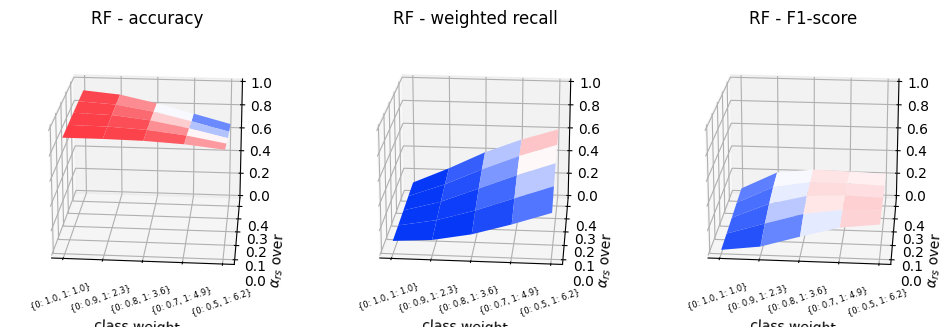

In [271]:
fig_ex1_rf = generate_3d_plots('CLASS_WEIGHT', 'RF', grid_search=grid_search_experiment_1_rf, metrics=performance_metrics)
savefig_for_overleaf("fig_ex1_rf", fig_ex1_rf)

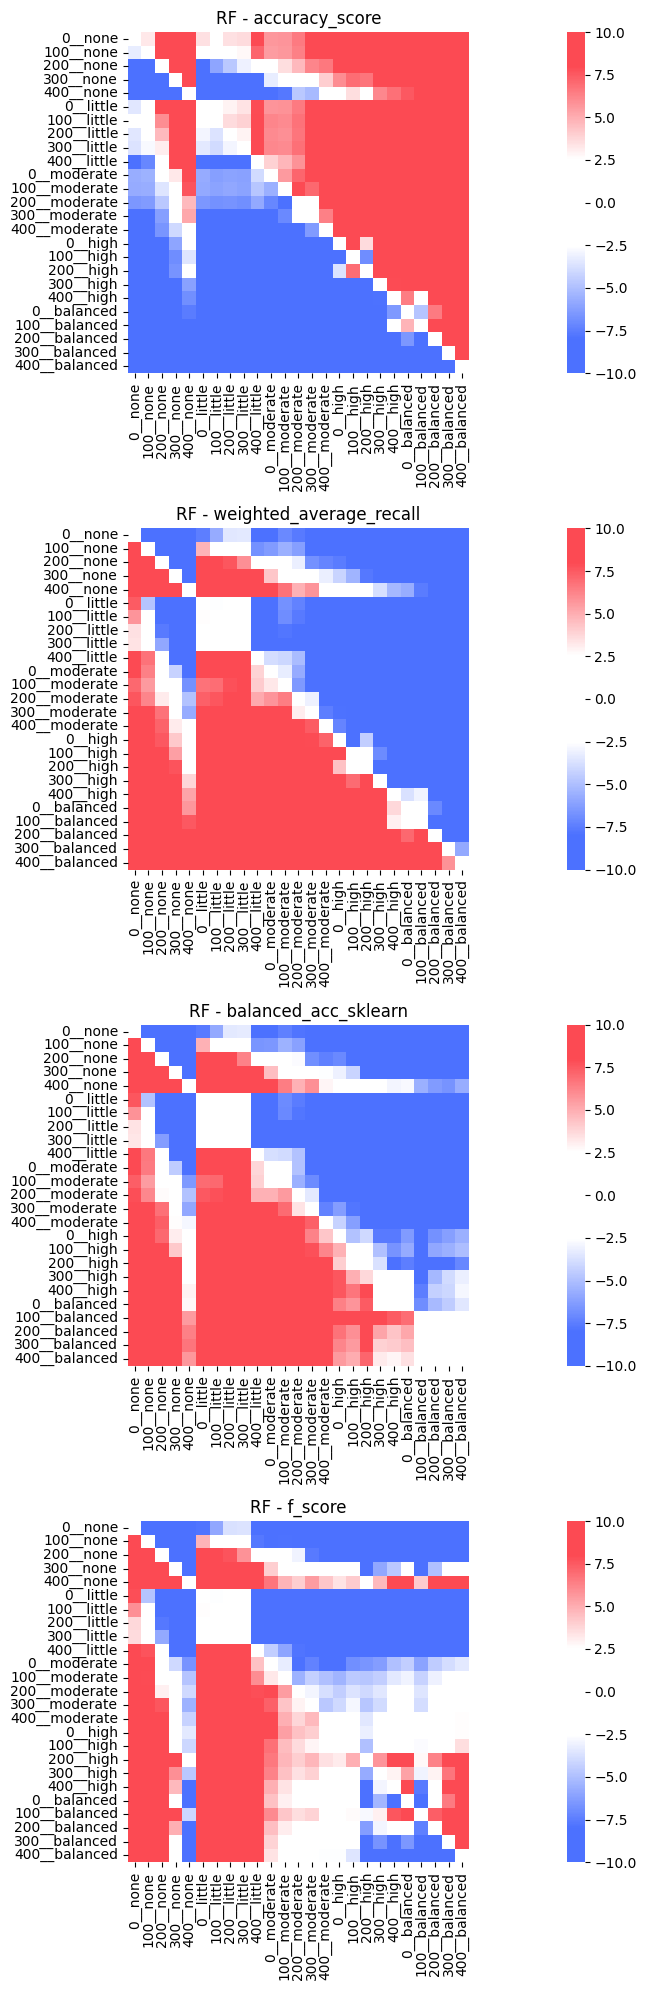

In [195]:
fig = generate_statistical_diff_heatmap(experiment_name = 'CLASS_WEIGHT', model_name='RF', grid_search=grid_search_experiment_1_rf, metrics=performance_metrics)

### lightgbm

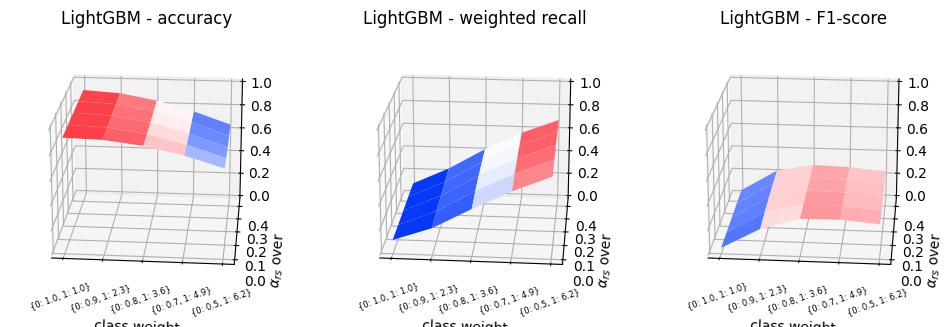

In [272]:
fig_ex1_lightgbm = generate_3d_plots('CLASS_WEIGHT', 'LightGBM', grid_search=grid_search_experiment_1_lightgbm, metrics=performance_metrics)
savefig_for_overleaf("fig_ex1_lightgbm", fig_ex1_lightgbm)

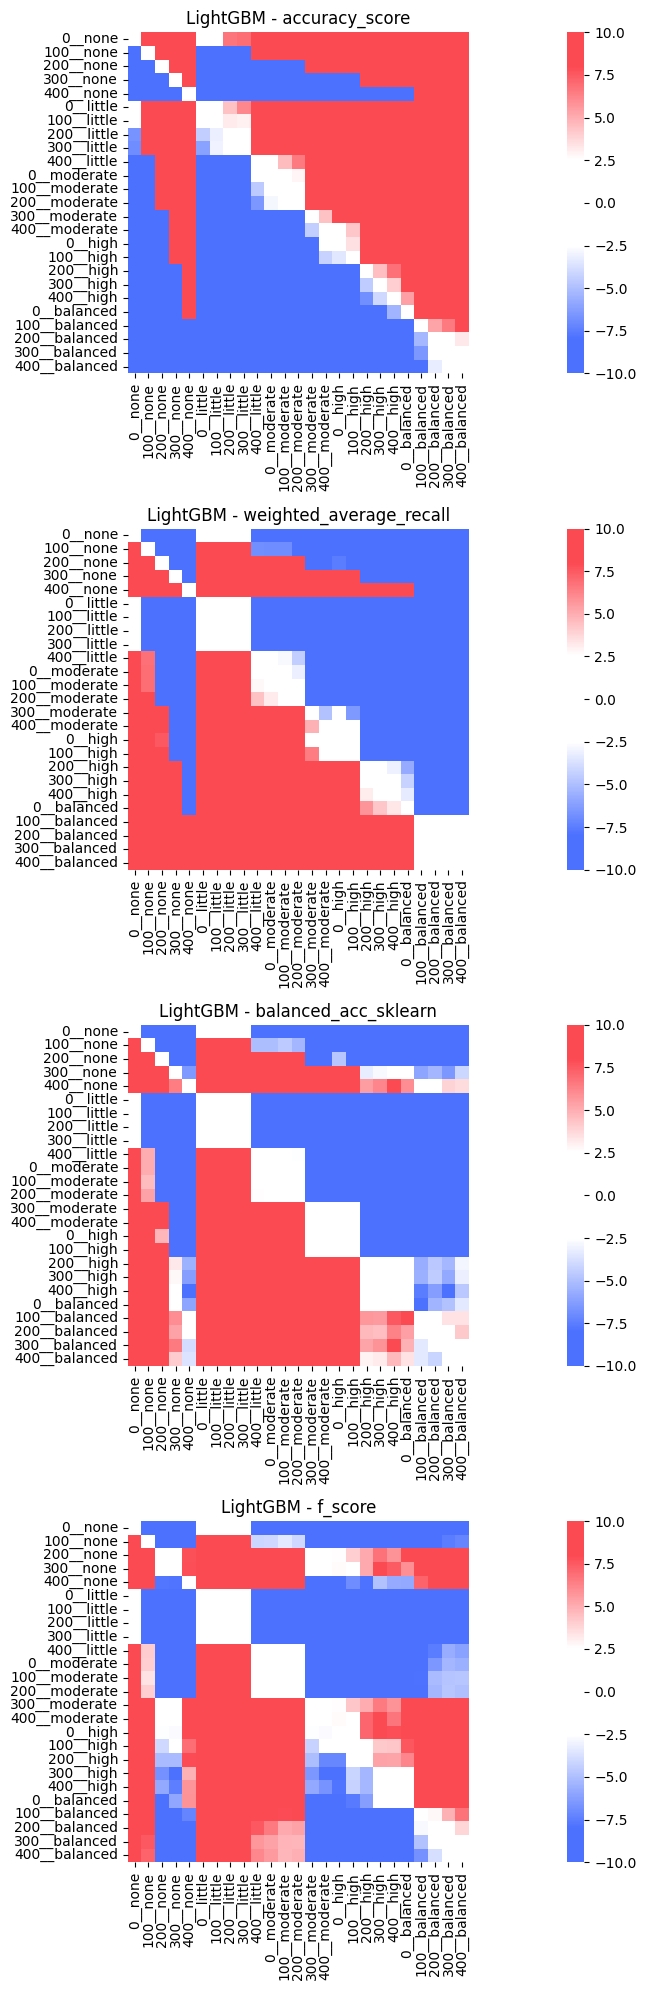

In [176]:
fig = generate_statistical_diff_heatmap(experiment_name = 'CLASS_WEIGHT', model_name='LightGBM', grid_search=grid_search_experiment_1_lightgbm, metrics=performance_metrics)

### catboost

In [188]:
grid_search_experiment_1_catboost.cv_results_['mean_test_accuracy_score']

array([0.91927118, 0.91678737, 0.88036461, 0.80427302, 0.68206991,
       0.91926858, 0.91908582, 0.91834113, 0.91651941, 0.90204968,
       0.88244973, 0.85895139, 0.83331847, 0.81813659, 0.75891333,
       0.70265844, 0.6511858 , 0.67592053, 0.58561937, 0.51559521,
       0.46102285, 0.50439236, 0.40944421, 0.34394932, 0.29746772])

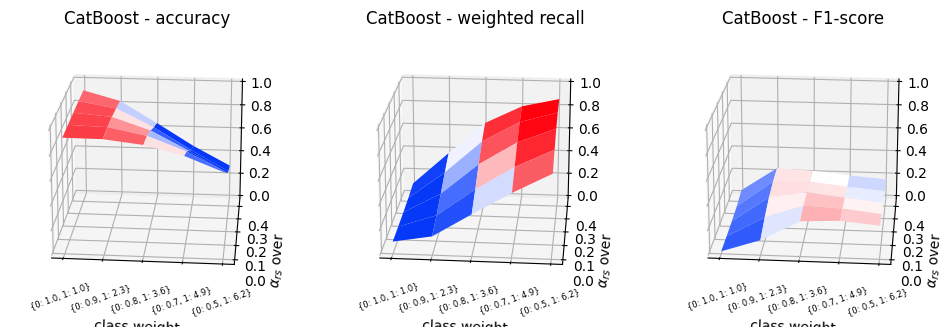

In [273]:
fig_ex1_catboost = generate_3d_plots('CLASS_WEIGHT', 'CatBoost', grid_search=grid_search_experiment_1_catboost, metrics=performance_metrics)
savefig_for_overleaf("fig_ex1_catboost", fig_ex1_catboost)

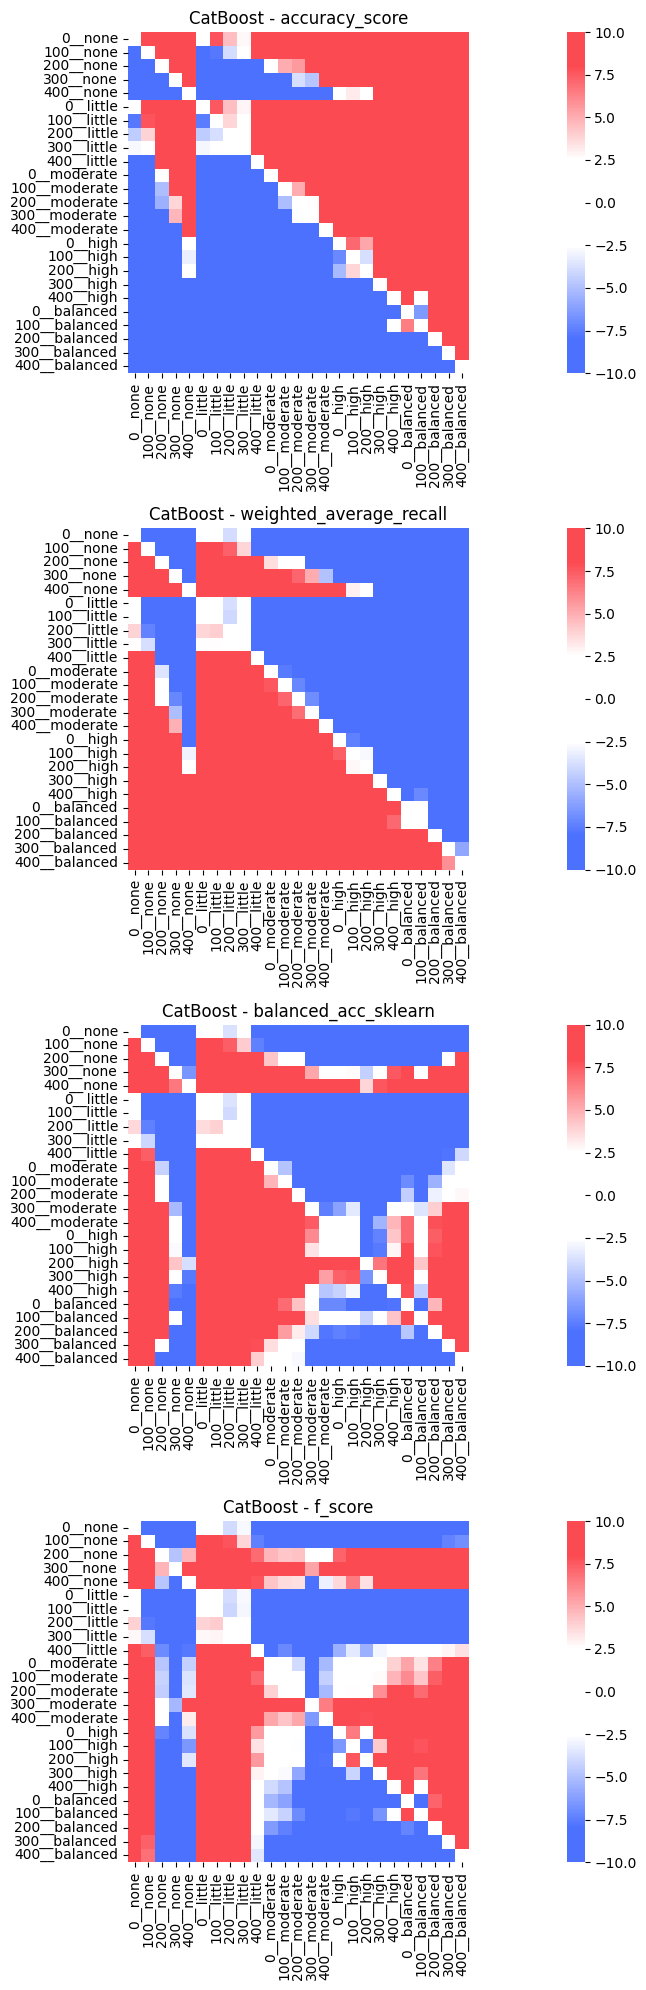

In [177]:
fig = generate_statistical_diff_heatmap(experiment_name = 'CLASS_WEIGHT', model_name='CatBoost', grid_search=grid_search_experiment_1_catboost, metrics=performance_metrics)

### between-model comparison
The results of the best_estimator_ of each algorithm will be compared between each other to see if there is any difference in performance.

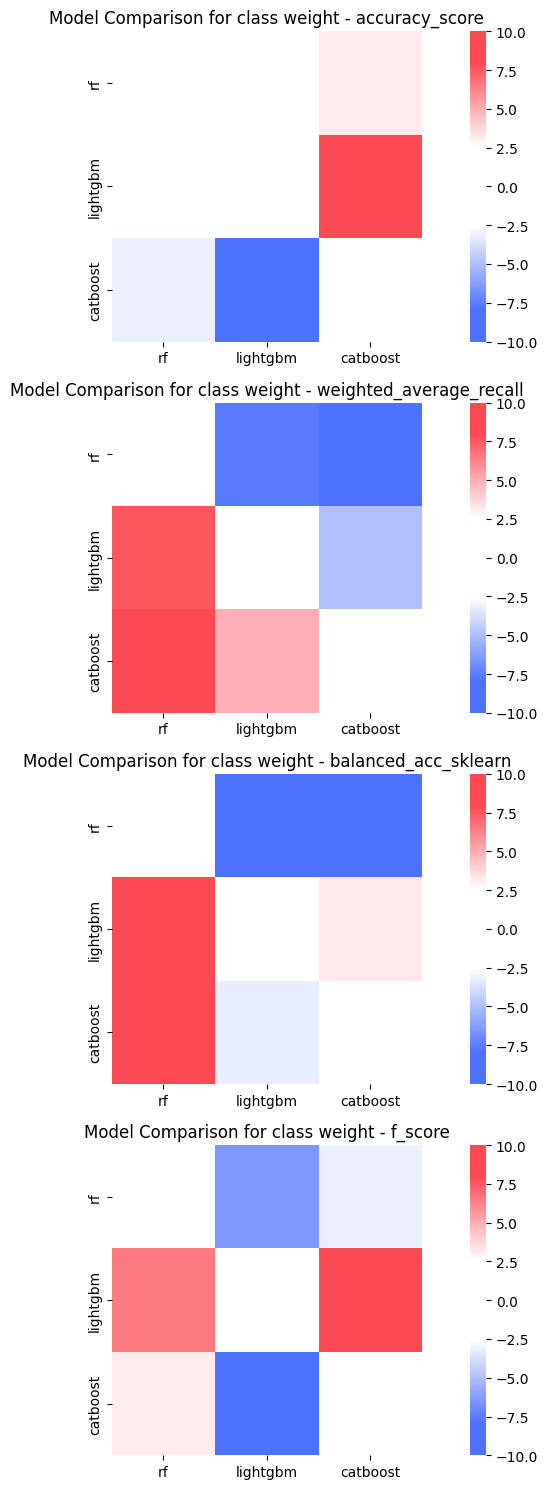

In [351]:
grid_search_arr_ex1 = [grid_search_experiment_1_rf, grid_search_experiment_1_lightgbm, grid_search_experiment_1_catboost]
labels = ["rf", "lightgbm", "catboost"]
fig = generate_statistical_diff_model_comparison_heatmap(experiment_name='class weight', labels=labels, grid_search_arr=grid_search_arr_ex1, metrics=performance_metrics)

## Experiment 2

In [229]:
grid_search_experiment_2_rf.cv_results_['params'][0]['undersample__sampling_strategy']

0.43909143006728313

### in-model comparison
The three algorithms used to train the models will be evaluated under applying different levels of oversampling and random undersampling.

### rf

In [287]:
np.array(grid_search_experiment_1_rf.cv_results_['params'])[[0,5,6,7,8]]

array([{'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample': 'passthrough', 'undersample': 'passthrough'},
       {'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample__sampling_strategy': 0.17563657202691324, 'undersample': 'passthrough'},
       {'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample__sampling_strategy': 0.2634548580403699, 'undersample': 'passthrough'},
       {'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample__sampling_strategy': 0.3512731440538265, 'undersample': 'passthrough'},
       {'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample__sampling_strategy': 0.43909143006728313, 'undersample': 'passthrough'}],
      dtype=object)

In [288]:
np.array(grid_search_experiment_2_rf.cv_results_['mean_test_accuracy_score'])[[0,5,6,7,8]]

array([0.86809578, 0.89762643, 0.87189466, 0.84136697, 0.80639847])

In [281]:
np.array(grid_search_experiment_2_rf.cv_results_['params'])[[0, 5, 10, 15, 20]]

array([{'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample': 'passthrough', 'undersample__sampling_strategy': 0.43909143006728313},
       {'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample__sampling_strategy': 0.17563657202691324, 'undersample__sampling_strategy': 0.43909143006728313},
       {'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample__sampling_strategy': 0.2634548580403699, 'undersample__sampling_strategy': 0.43909143006728313},
       {'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample__sampling_strategy': 0.3512731440538265, 'undersample__sampling_strategy': 0.43909143006728313},
       {'classifier__class_weight': {0: 1.0, 1: 1.0}, 'oversample__sampling_strategy': 0.43909143006728313, 'undersample__sampling_strategy': 0.43909143006728313}],
      dtype=object)

In [282]:
np.array(grid_search_experiment_2_rf.cv_results_['mean_test_accuracy_score'])[[0, 5, 10, 15, 20]]

array([0.86809578, 0.89762643, 0.91060807, 0.91515946, 0.91669696])

In [296]:
grid_search_experiment_2_rf.cv_results_['params'][20:24]

[{'classifier__class_weight': {0: 1.0, 1: 1.0},
  'oversample__sampling_strategy': 0.43909143006728313,
  'undersample__sampling_strategy': 0.43909143006728313},
 {'classifier__class_weight': {0: 1.0, 1: 1.0},
  'oversample__sampling_strategy': 0.43909143006728313,
  'undersample__sampling_strategy': 0.5793185725504624},
 {'classifier__class_weight': {0: 1.0, 1: 1.0},
  'oversample__sampling_strategy': 0.43909143006728313,
  'undersample__sampling_strategy': 0.7195457150336415},
 {'classifier__class_weight': {0: 1.0, 1: 1.0},
  'oversample__sampling_strategy': 0.43909143006728313,
  'undersample__sampling_strategy': 0.8597728575168208}]

In [295]:
np.array(grid_search_experiment_2_rf.cv_results_['mean_test_weighted_average_recall'])[20:24]

array([0.10737035, 0.14585795, 0.19445826, 0.2441464 ])

In [191]:
grid_search_experiment_2_rf.cv_results_['mean_test_accuracy_score']

array([0.86809578, 0.82373444, 0.77663629, 0.72734699, 0.67868011,
       0.89762643, 0.87189466, 0.84136697, 0.80639847, 0.76890257,
       0.91060807, 0.89721408, 0.87750682, 0.85370084, 0.82757104,
       0.91515946, 0.90747128, 0.89481677, 0.87781055, 0.85843043,
       0.91669696, 0.91177486, 0.90326199, 0.89090211, 0.87596346])

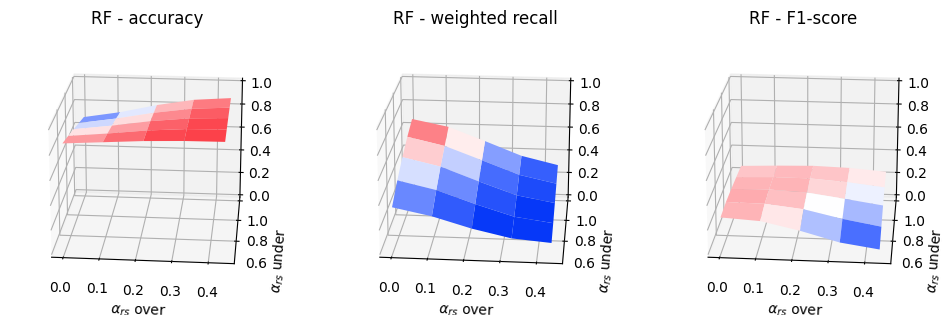

In [274]:
fig_ex2_rf = generate_3d_plots('UNDERSAMPLE', 'RF', grid_search=grid_search_experiment_2_rf, metrics=performance_metrics)
savefig_for_overleaf("fig_ex2_rf", fig_ex2_rf)

### lightgbm

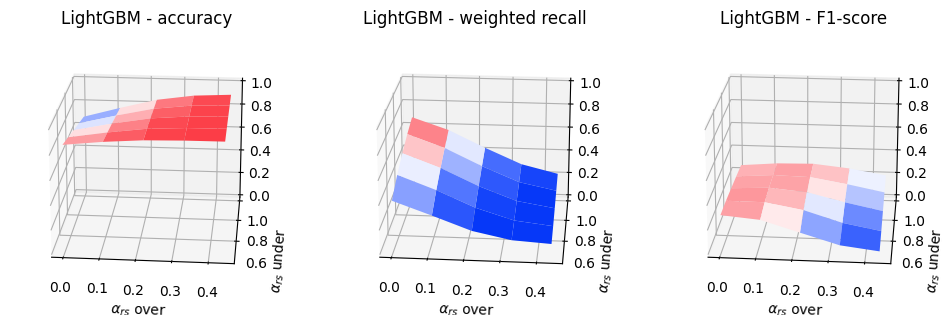

In [275]:
fig_ex2_lightgbm = generate_3d_plots('UNDERSAMPLE', 'LightGBM', grid_search=grid_search_experiment_2_lightgbm, metrics=performance_metrics)
savefig_for_overleaf("fig_ex2_lightgbm", fig_ex2_lightgbm)

### catboost

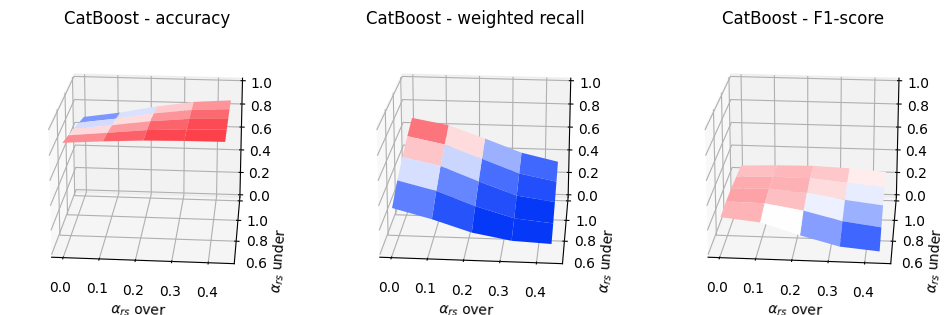

In [276]:
fig_ex2_catboost = generate_3d_plots('UNDERSAMPLE', 'CatBoost', grid_search=grid_search_experiment_2_catboost, metrics=performance_metrics)
savefig_for_overleaf("fig_ex2_catboost", fig_ex2_catboost)

### between-model comparison
The results of the best_estimator_ of each algorithm will be compared between each other to see if there is any difference in performance.

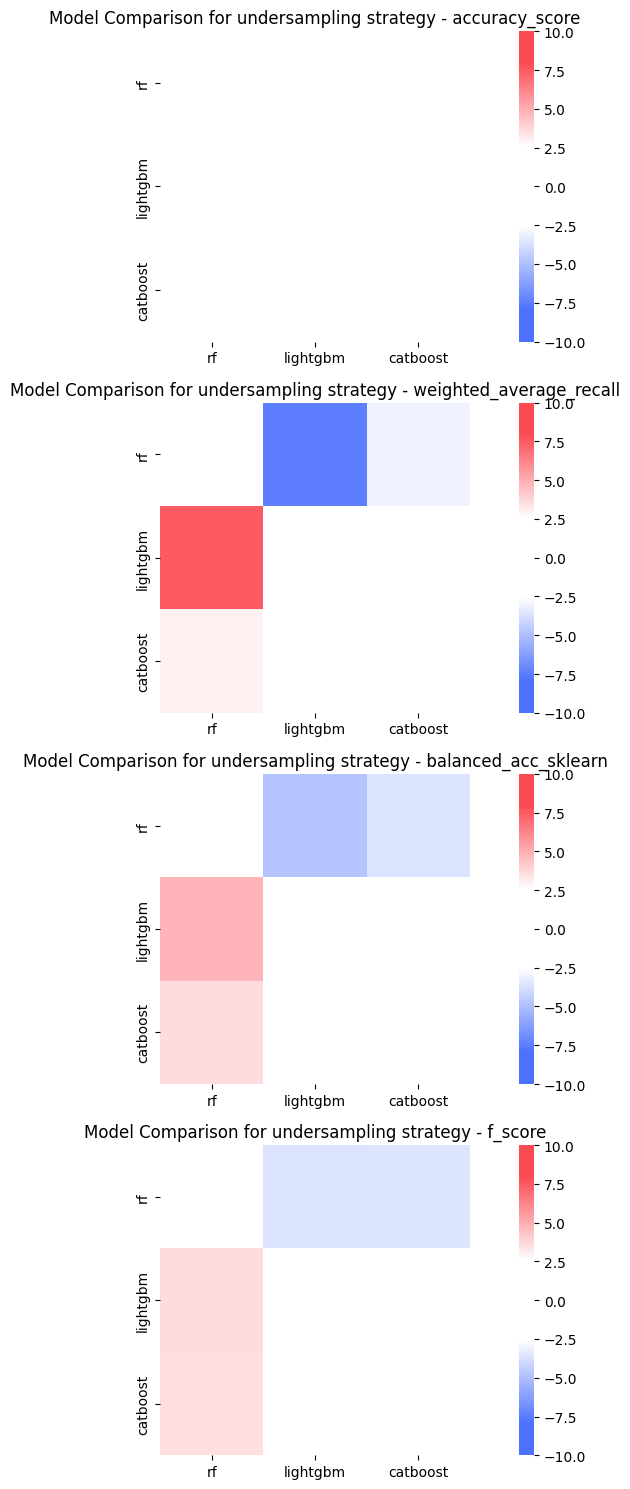

In [349]:
grid_search_arr_ex2 = [grid_search_experiment_2_rf, grid_search_experiment_2_lightgbm, grid_search_experiment_2_catboost]
labels = ["rf", "lightgbm", "catboost"]
fig = generate_statistical_diff_model_comparison_heatmap(experiment_name='undersampling strategy', labels=labels, grid_search_arr=grid_search_arr_ex2, metrics=performance_metrics)

## Experiment 3
The last experiment tries to mitigate any bias present by applying a data preprocessing called DisparateImpactRemover to the dataset. In the experiment the repair-level is varied between [0, 0.33, 0.66, 1]. The impact not only on the fairness metrics will be measured, but also on the performance metrics of the model

## in model comparison

In [101]:
# param_grid_ex3 = createParamGridEx3(grid_searches)

#should be smae order as grid_searches
experiment_and_model_name = {
  'experiment_1_rf',
  'experiment_2_rf',
  'experiment_1_lightgbm',
  'experiment_2_lightgbm',
  'experiment_1_catboost',
  'experiment_2_catboost'
}

if len(grid_searches) != len(experiment_and_model_name):
  print("please adjust the experiment")

# experiment_and_model_to_params_map = {}
# for i in range(len(experiment_and_model_name)):
#   experiment_and_model_to_params_map[experiment_and_model_name[i]] = grid_searches[i]

NameError: name 'grid_searches' is not defined

In [ ]:
# #for this purpose the classifier is considered equal if the same ML algorithm is used
# def isSameClassifier(single_param_combination_1, single_param_combination):
#   if single_param_combination_1['classifier'].__class__.__name__ == single_param_combination_1['classifier'].__class__.__name__:
#     return True
#   return False

In [ ]:
len(repair_levels)

In [ ]:
lister = [1,2,3]
list(map(lambda x: x - lister[0], lister))

In [ ]:
def generateGraphData(grid_searches_experiment_3, repair_levels, metrics, i):
  graph_data = {'repair_levels':repair_levels}
  # print(len(repair_levels))
  for metric in metrics:
    col = []
    for grid_search in grid_searches_experiment_3:
      results = grid_search.cv_results_
      col.append(results['mean_test_' + metric][i])
    diff = list(map(lambda x: x - col[0], col))
    graph_data[metric] = diff
    # print(len(col))
  return graph_data   

def generateRepairLevelPlots(dfs, axes, ylim=None):
  if len(dfs) != len(axes):
    raise Exception("Unequal length axes and dfs ", dfs, axes)
  last_ax = None
  for i in range(len(dfs)):
    melted = pd.melt(dfs[i], 'repair_levels', var_name='scorer', value_name=r'$\Delta$ metric score')
    ax = sns.lineplot(data=melted, x='repair_levels', y=r'$\Delta$ metric score', hue='scorer', ax=axes[i])
    ax.legend().set_visible(False)
    ax.set_ylabel(None)
    ax.set_ylim(*ylim)
    if i == len(dfs)-1:
      last_ax = ax
  return last_ax


In [105]:
grid_searches_experiment_3[0].cv_results_['mean_test_spd_gender']


array([-0.03954224, -0.04914555, -0.11726642, -0.11537756, -0.09783279,
       -0.05003333])

In [106]:
grid_searches_experiment_3[4].cv_results_['mean_test_spd_gender']

array([-0.03651857, -0.04876562, -0.14076981, -0.13887714, -0.13327688,
       -0.05611618])

In [ ]:
for i in range(1, 6, 2):
  print(i)

In [ ]:
def getMLAlgorithmName(param):
  alg = param['classifier']
  name = alg.__class__.__name__
  alg_name = None
  if name == 'RandomForestClassifier':
    alg_name = 'RF'
  elif name == 'LGBMClassifier':
    alg_name = 'LightGBM'
  elif name == 'CatBoostClassifier':
    alg_name = 'CatBoost'
  else:
    raise Exception("unknown classifier")
  return alg_name

In [ ]:
def compare_param_grid(experiment_name, grid_searches_experiment_3, repair_levels, performance_metrics, fairness_metrics):
  #ex1 fairness and performance
  dfs_protected_fairness = []
  dfs_unprotected_fairness = []
  dfs_performance = []
  titles = []
  #experiment 1
  loop_range = []
  if experiment_name == 'CLASS_WEIGHT':
    loop_range = range(0, len(grid_searches_experiment_3[0].cv_results_['params']), 2)
  elif experiment_name == 'UNDERSAMPLE':
    loop_range = range(1, len(grid_searches_experiment_3[0].cv_results_['params']), 2)
  #each gridsearch is 1 repair level
  #looping through the params responsible for all the results for experiment 1
  for i in loop_range:
    #QUICK SOLUTION
    #fairness_metrics = ['spd_gender', 'eod_gender', 'spd_education', 'eod_education', 'spd_region', 'eod_region']
    protected_fairness_data = generateGraphData(grid_searches_experiment_3, repair_levels, ['spd_gender', 'eod_gender'], i=i)
    df_protected_fairness_metrics = pd.DataFrame(protected_fairness_data)
    dfs_protected_fairness.append(df_protected_fairness_metrics)
    
    unprotected_fairness_data = generateGraphData(grid_searches_experiment_3, repair_levels, ['spd_education', 'eod_education', 'spd_region', 'eod_region'], i=i)
    df_unprotected_fairness_metrics = pd.DataFrame(unprotected_fairness_data)
    dfs_unprotected_fairness.append(df_unprotected_fairness_metrics)
    
    performance_data = generateGraphData(grid_searches_experiment_3, repair_levels, performance_metrics, i=i)
    df_performance_metrics = pd.DataFrame(performance_data)
    dfs_performance.append(df_performance_metrics)
    
    #save name for title
    param = grid_searches_experiment_3[0].cv_results_['params'][i]
    alg_name = getMLAlgorithmName(param)
    titles.append(alg_name)
  
  figsize = (10, 8)
  fig, axes = plt.subplots(nrows=3, ncols=3, figsize=figsize)
  last_ax_row1 = generateRepairLevelPlots(dfs_protected_fairness, axes[0], ylim=[-0.1, 0.1])
  last_ax_row2 = generateRepairLevelPlots(dfs_unprotected_fairness, axes[1], ylim=[-0.1, 0.1])
  last_ax_row3 = generateRepairLevelPlots(dfs_performance, axes[2], ylim=[-0.1, 0.1])
  
  #adjust for legend room
  # fig.subplots_adjust(right=0.8)
  last_ax_row1.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left', 
    borderaxespad=0.,
    fontsize=10
  );
  
  last_ax_row2.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left', 
    borderaxespad=0.,
    fontsize=10
  );
  
  last_ax_row3.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left', 
    borderaxespad=0.,
    fontsize=10
  );
  
  for ax, titles in zip(axes[0], titles):
    ax.set_title(titles)
    
  rows = ['protected bias feature', 'unprotected bias features', 'performance trade-off']
  for ax, row in zip(axes[:, 0], rows):
    ax.set_ylabel(row + '\n' + r'$\Delta$ metric score')
  
  fig.suptitle("Results for experiment " + experiment_name.lower().replace("_", " "))
  fig.tight_layout()
  return fig

In [378]:
grid_searches_experiment_3[0].cv_results_['mean_test_f_score']

array([0.25830898, 0.27279173, 0.292709  , 0.29084287, 0.28413084,
       0.27564277])

In [182]:
grid_searches_experiment_3[0].cv_results_['mean_test_spd_gender']

array([-0.03954224, -0.04914555, -0.11726642, -0.11537756, -0.09783279,
       -0.05003333])

In [234]:
grid_searches_experiment_3[4].cv_results_['mean_test_f_score']

array([0.25528462, 0.26144029, 0.26903877, 0.2681497 , 0.26686274,
       0.26314141])

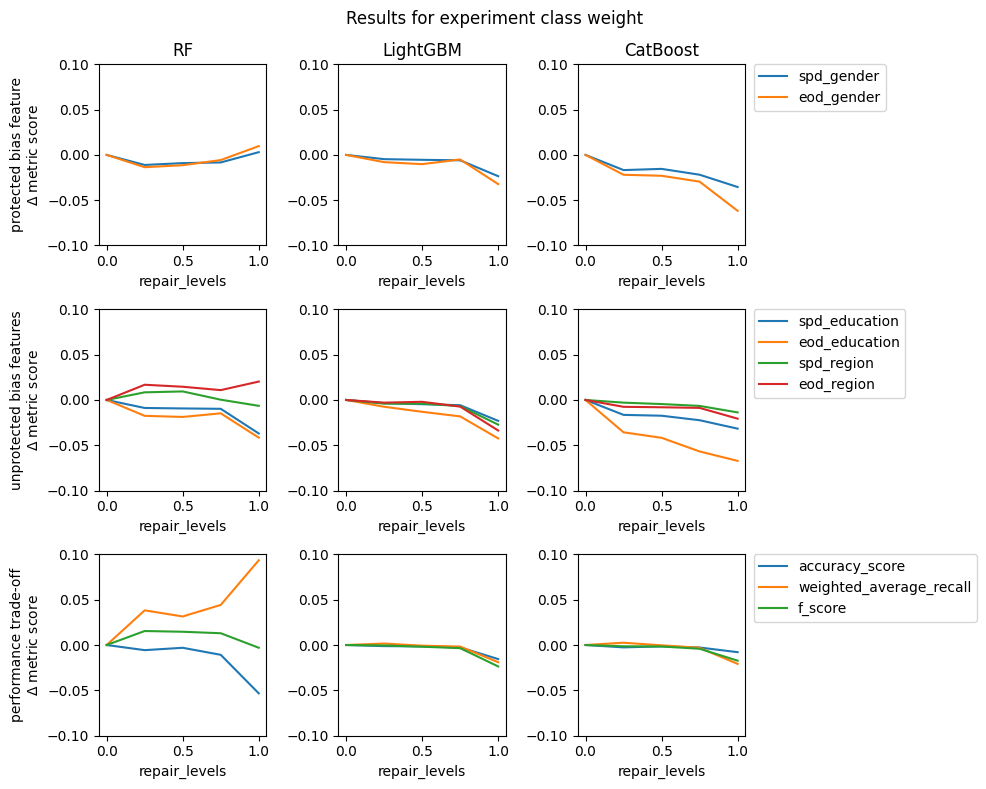

In [402]:
fig = compare_param_grid('CLASS_WEIGHT', grid_searches_experiment_3, repair_levels, performance_metrics, fairness_metrics)
savefig_for_overleaf('experiment_3_class_weight', fig)

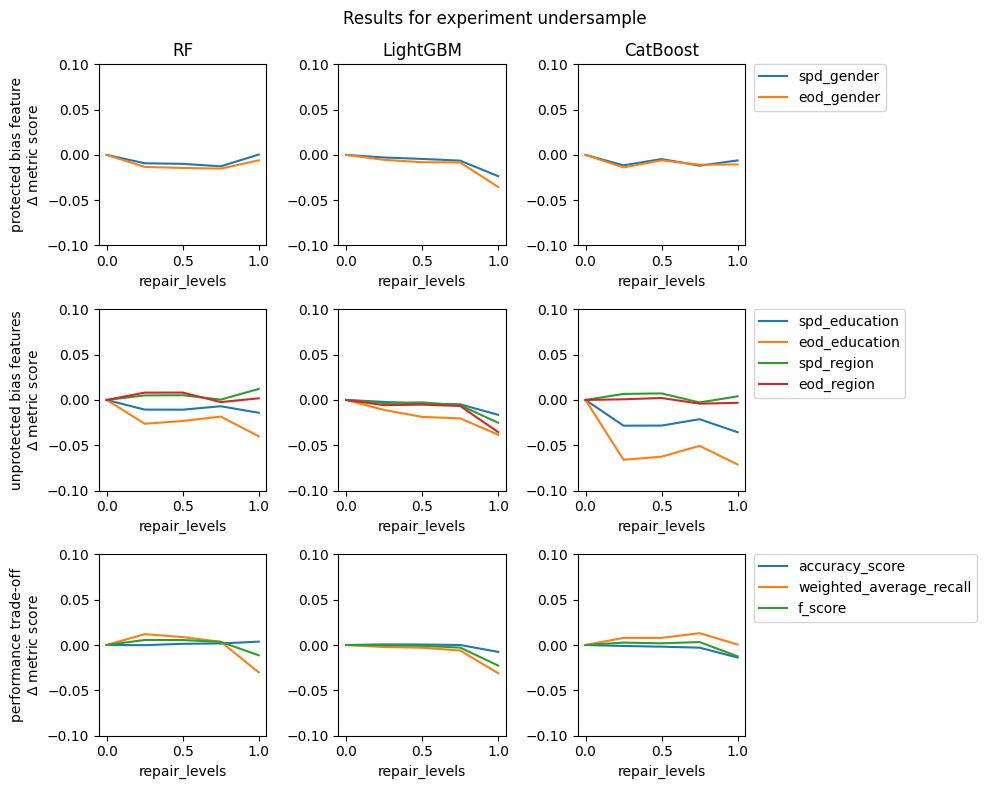

In [403]:
fig = compare_param_grid('UNDERSAMPLE', grid_searches_experiment_3, repair_levels, performance_metrics, fairness_metrics)
savefig_for_overleaf('experiment_3_undersample', fig)

### rf

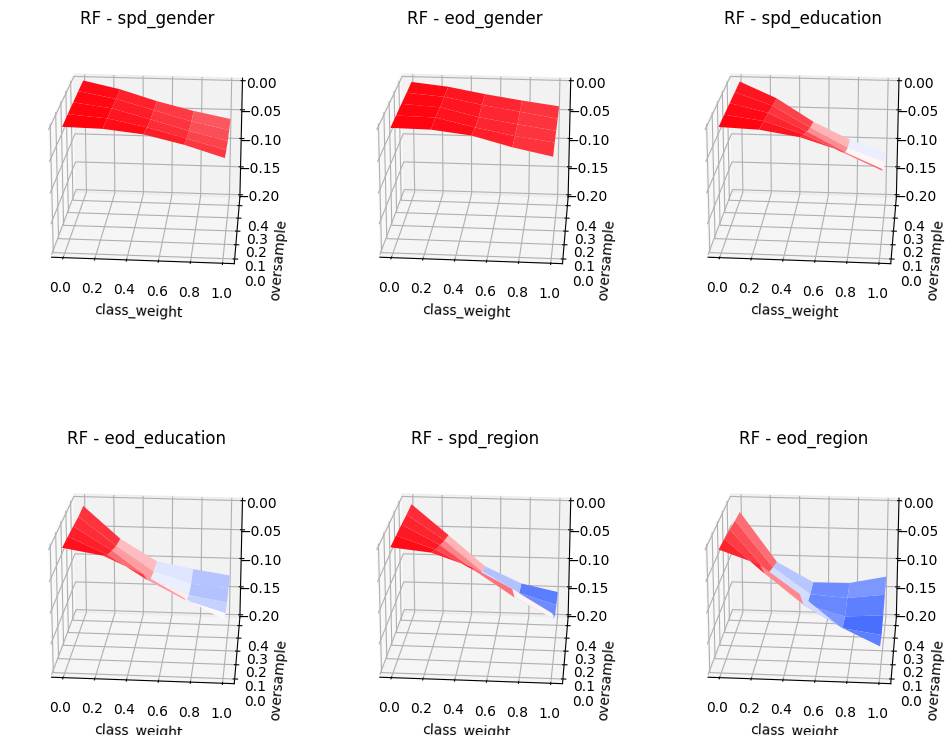

In [551]:
fig = generate_3d_plots_BIAS('CLASS_WEIGHT', 'RF', grid_search=grid_search_experiment_1_rf, metrics=fairness_metrics, zlim=[-0.2, 0])

unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric


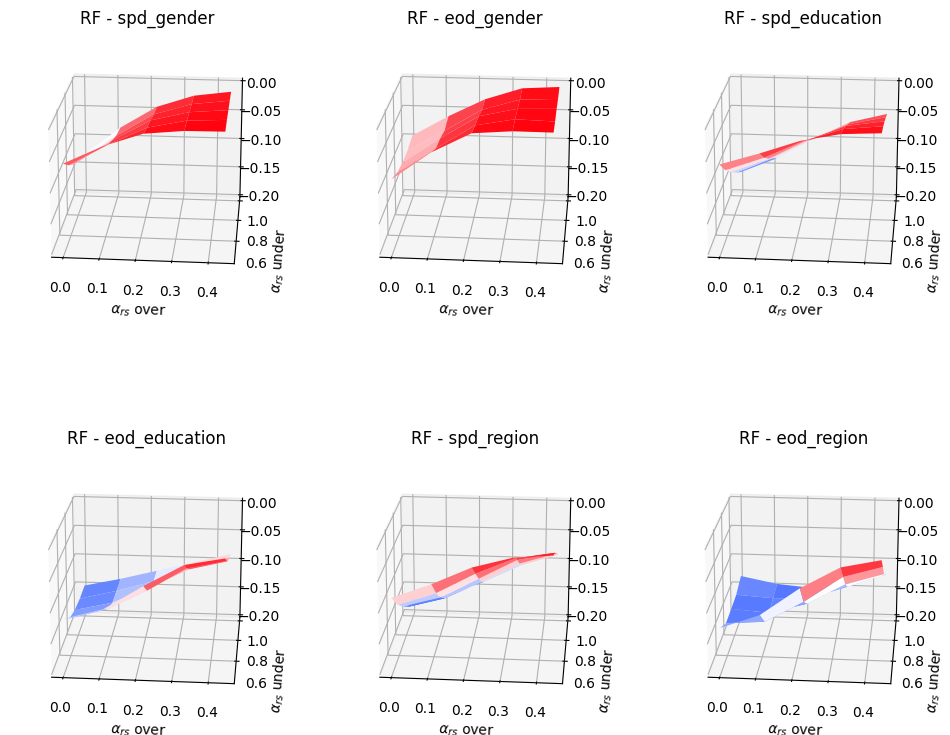

In [104]:
fig = generate_3d_plots_BIAS('UNDERSAMPLE', 'RF', grid_search=grid_search_experiment_2_catboost, metrics=fairness_metrics, zlim=[-0.2, 0])

### lightgbm

unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric


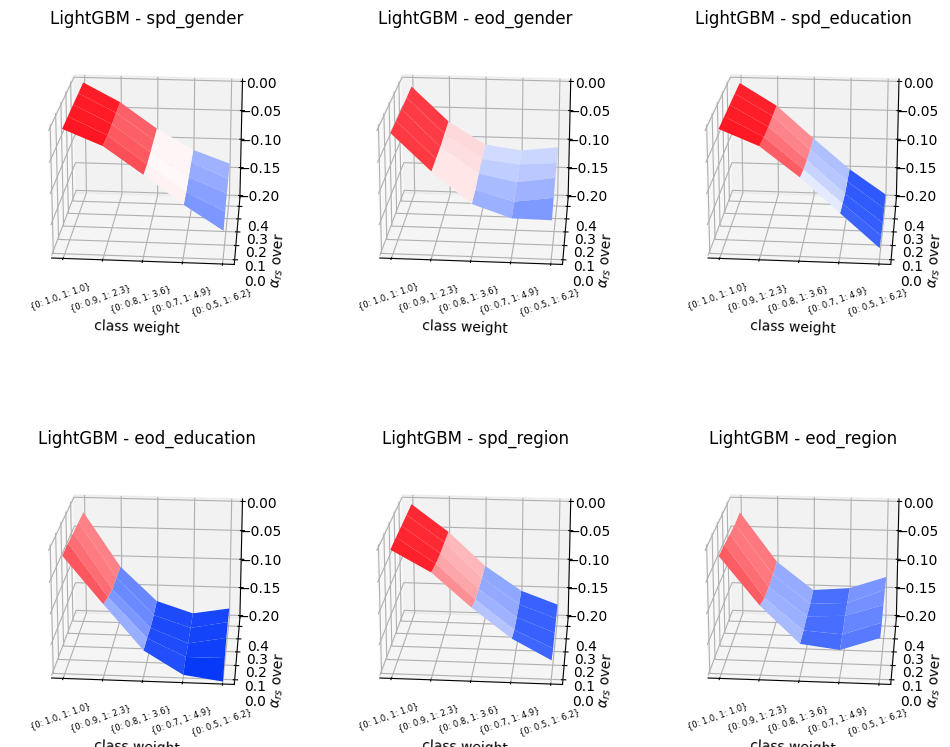

In [104]:
fig = generate_3d_plots_BIAS('CLASS_WEIGHT', 'LightGBM', grid_search=grid_search_experiment_1_lightgbm, metrics=fairness_metrics, zlim=[-0.2, 0])

unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric
unfamiliar metric, metricRead is set to metric


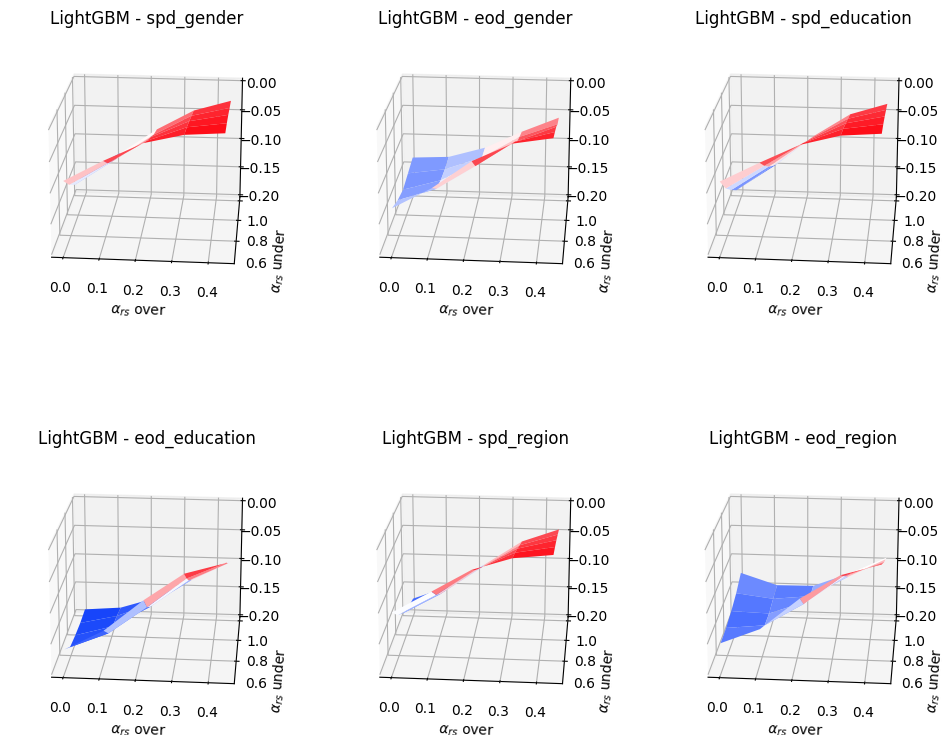

In [105]:
fig = generate_3d_plots_BIAS('UNDERSAMPLE', 'LightGBM', grid_search=grid_search_experiment_2_lightgbm, metrics=fairness_metrics, zlim=[-0.2, 0])

### catboost

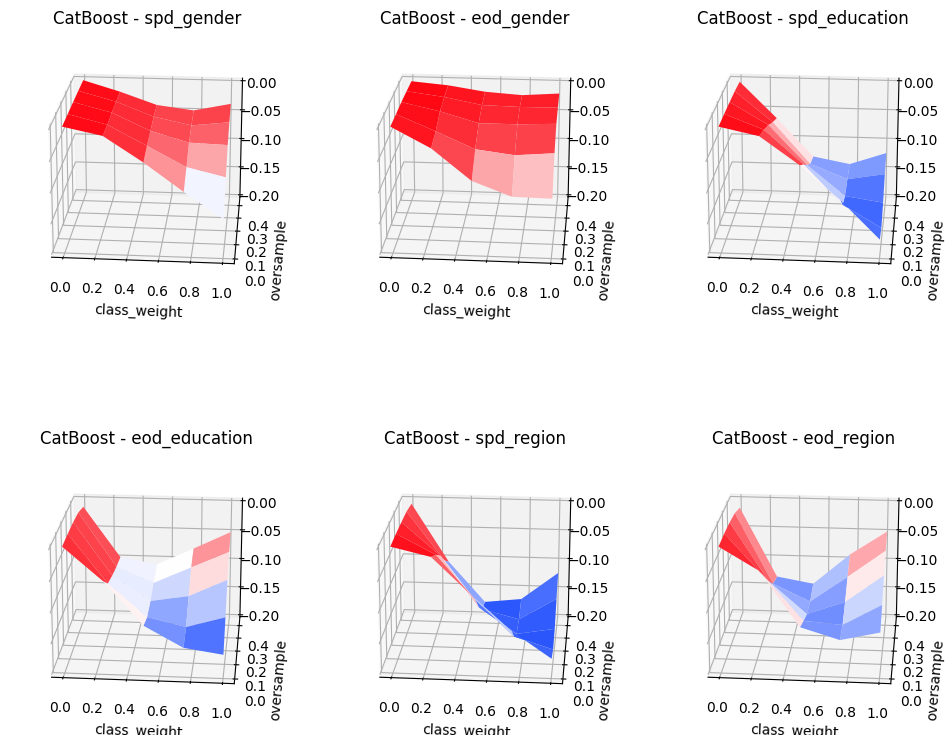

In [553]:
fig = generate_3d_plots_BIAS('CLASS_WEIGHT', 'CatBoost', grid_search=grid_search_experiment_1_catboost, metrics=fairness_metrics, zlim=[-0.2, 0])

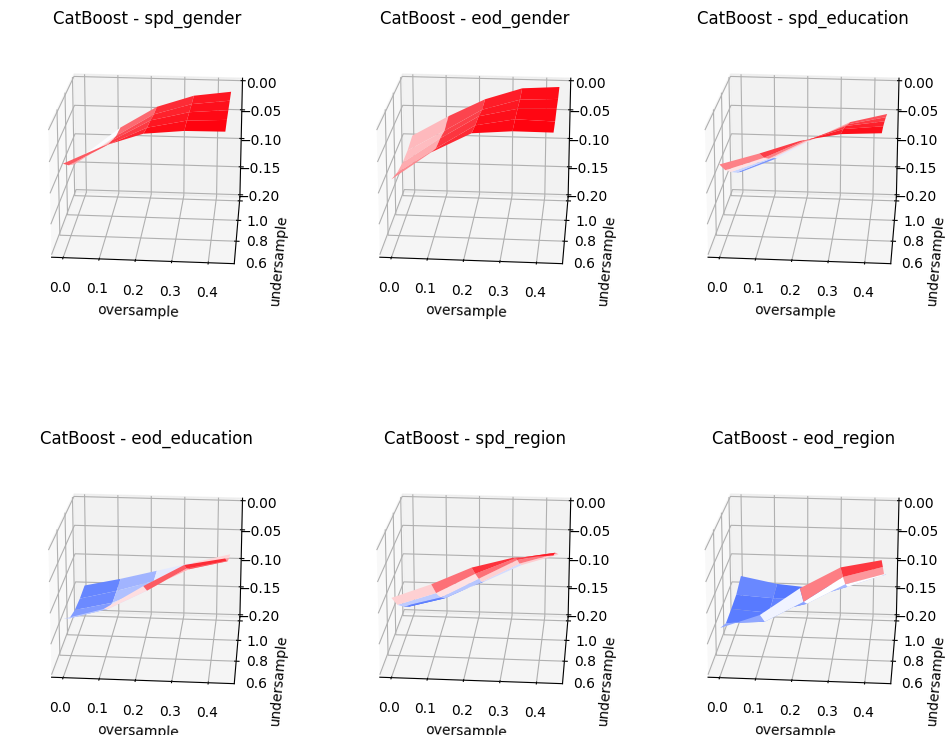

In [555]:
fig = generate_3d_plots_BIAS('UNDERSAMPLE', 'CatBoost', grid_search=grid_search_experiment_2_catboost, metrics=fairness_metrics, zlim=[-0.2, 0])

### between model comparison

## Feature Importance Plot

In [491]:
def getFinalColnames(grid_search):
  pipeline = grid_search.best_estimator_
  if len(pipeline.steps) != 5:
    raise Exception("please change this function to reflect the changes")
  #prepocessing pipeline_steps
  # data_cleaning_and_preparation = grid_search.best_estimator_.steps[0][1]
  # oversample = grid_search.best_estimator_.steps[1][1]
  # undersample = grid_search.best_estimator_.steps[2][1]
  # cat_encoding_and_feature_engineering = grid_search.best_estimator_.steps[3][1]
  # [data_cleaning_and_preparation, oversample, undersample, cat_encoding_and_feuture_engineering
  prev_features_names_out = None
  for i in range(len(pipeline.steps)-1):
    step = pipeline.steps[i][1]
    if i == 0:
      prev_features_names_out = step.get_feature_names_out()
    elif step == 'passthrough':
      continue
    else:
      prev_features_names_out = step.get_feature_names_out(input_features=prev_features_names_out)
  #last step is classifier
  return prev_features_names_out

In [458]:
def plot_feature_importances(feature_names, importances, amount_of_features):
  #src: https://www.kaggle.com/code/ashishpatel26/feature-importance-of-lightgbm
  features_importances_dict = list(zip(feature_names, importances))
  feature_imp = pd.DataFrame(sorted(features_importances_dict), columns=['Feature', 'Importance'])
  data = feature_imp.sort_values(by="Importance", ascending=False).head(amount_of_features)
  fig = plt.figure(figsize=(20, 10))
  ax = sns.barplot(x="Importance", y="Feature", data=data)
  ax.set_xlabel("Feature importance")
  ax.set_ylabel("Features")
  return ax

### rf

<Axes: xlabel='Feature importance', ylabel='Features'>

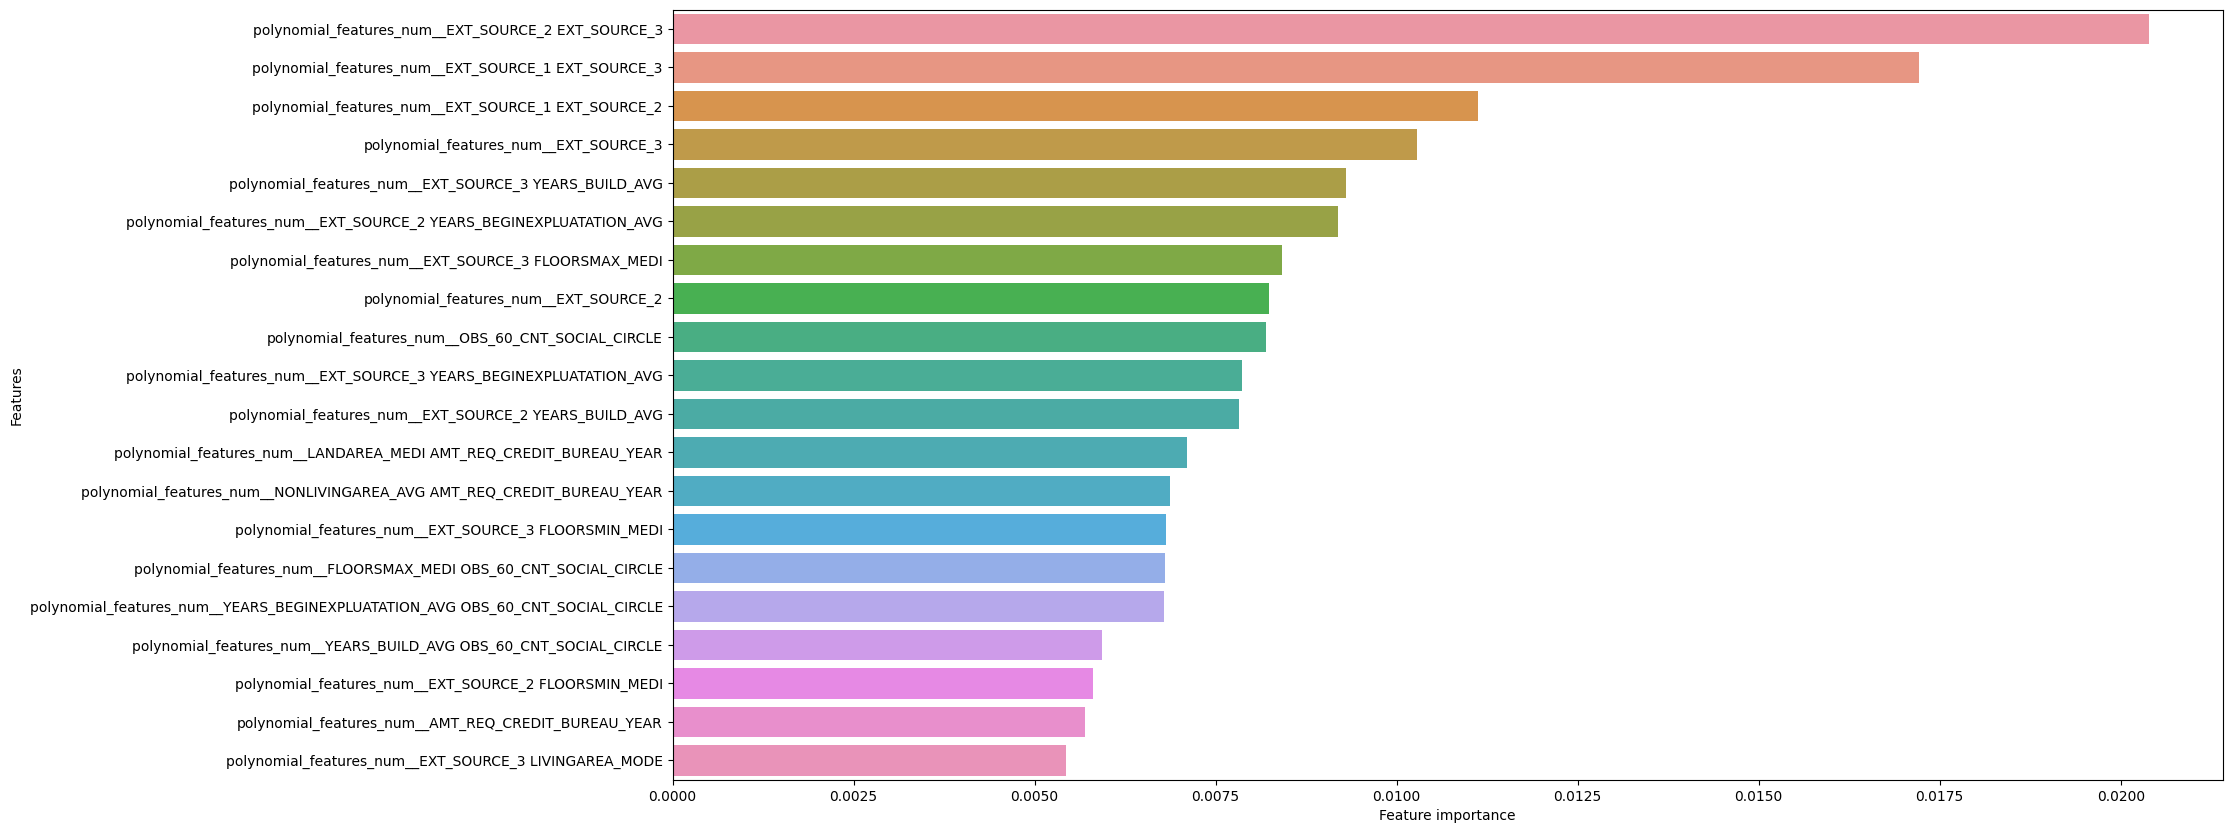

In [494]:
fitted_rf_clf = grid_search_experiment_1_rf.best_estimator_.named_steps['classifier']
importances_rf = fitted_rf_clf.feature_importances_
feature_names_rf = getFinalColnames(grid_search_experiment_1_rf)
plot_feature_importances(feature_names_rf, importances_rf, 20)

### lightgbm

<Axes: xlabel='Feature importance', ylabel='Features'>

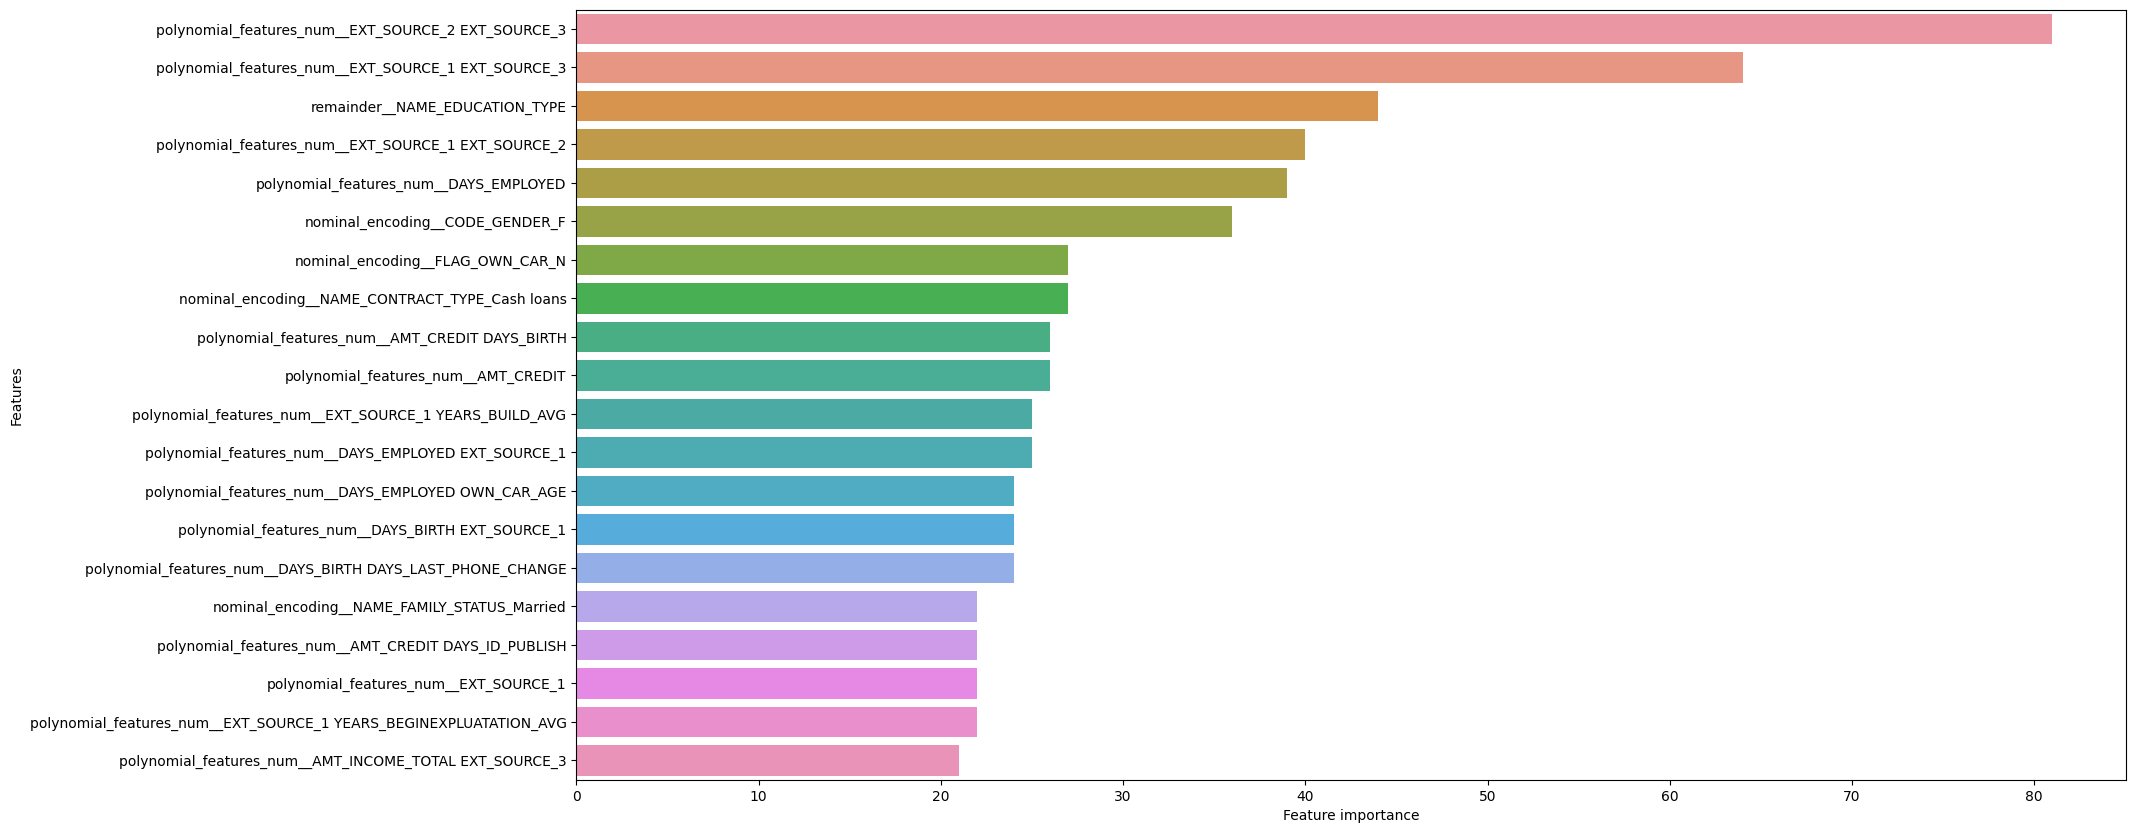

In [496]:
# importance_type (str, optional (default='split')) – The type of feature importance to 
# be filled into feature_importances_. If ‘split’, result contains numbers of times the 
# feature is used in a model. If ‘gain’, result contains total gains of splits which use the feature.

fitted_lightgbm_clf = grid_search_experiment_1_lightgbm.best_estimator_.named_steps['classifier']
# print(fitted_lightgbm_clf._Booster.dump_model()['feature_names'])
#plot_feature_importance(features_importances_dict_lightgbm)
importances_lightgbm = fitted_lightgbm_clf.feature_importances_
feature_names_lightgbm = getFinalColnames(grid_search_experiment_1_lightgbm)
plot_feature_importances(feature_names_lightgbm, importances_lightgbm, 20)

### catboost

<Axes: xlabel='Feature importance', ylabel='Features'>

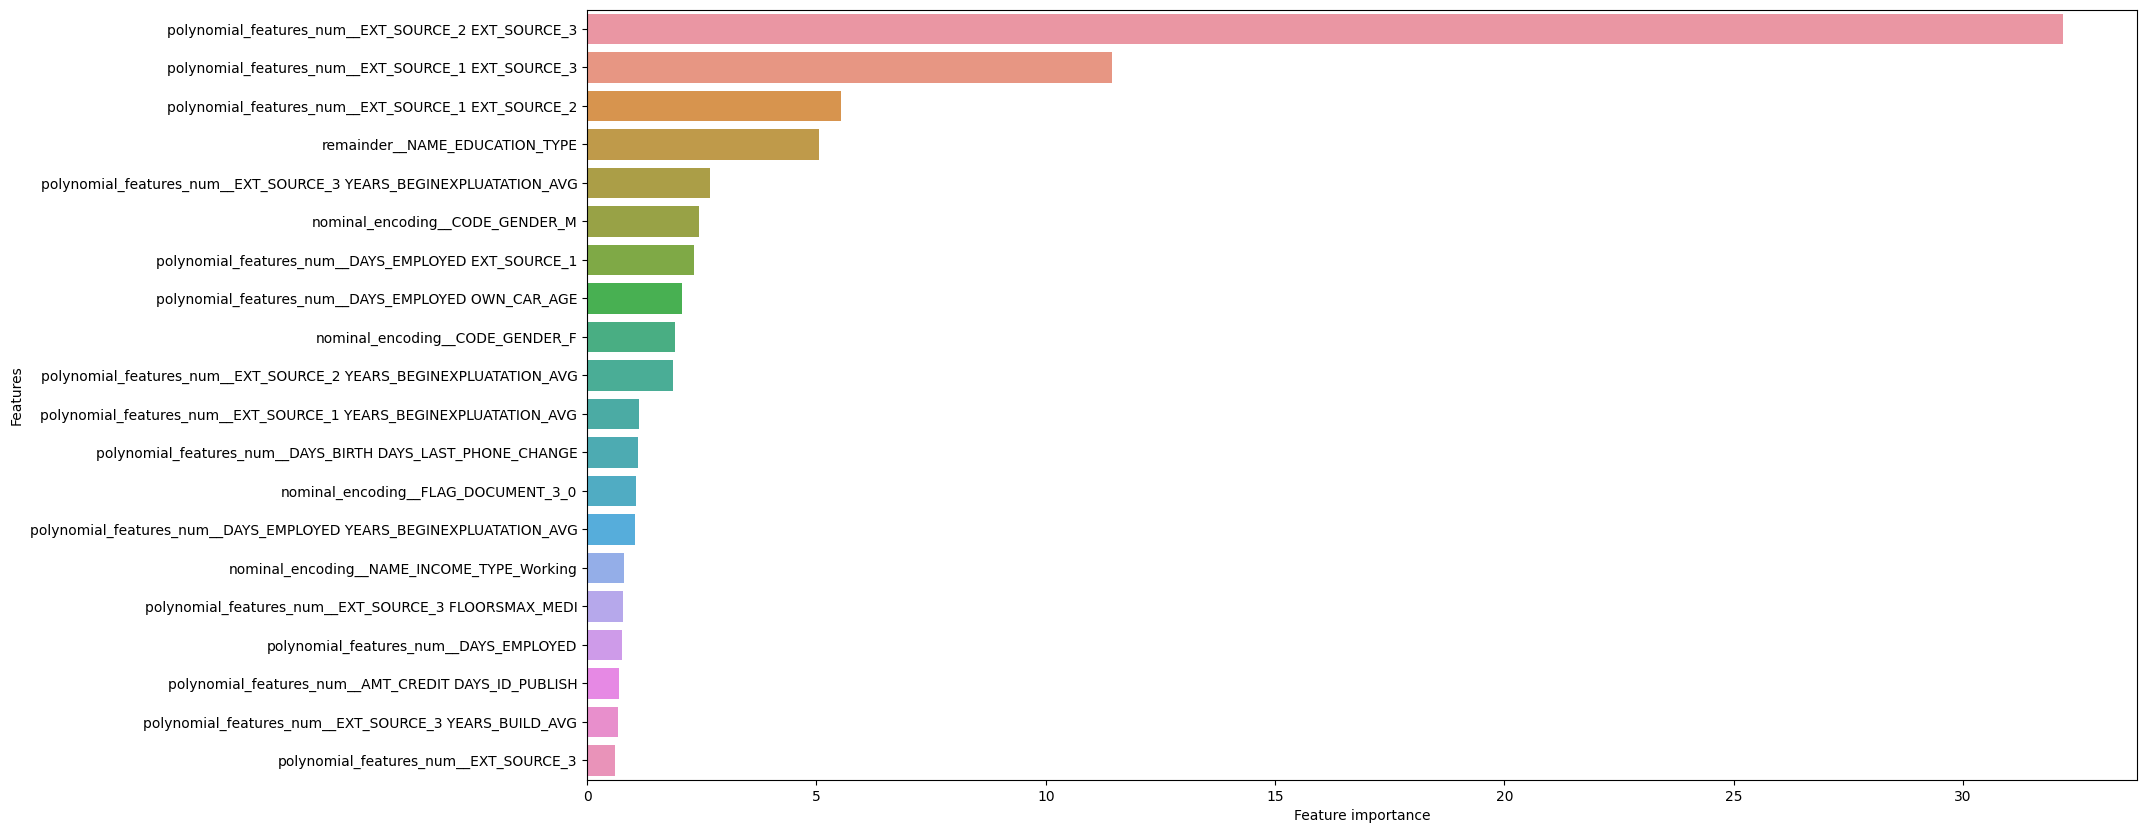

In [497]:
# for catboost
# https://catboost.ai/en/docs/features/feature-importances-calculation
#https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_get_feature_importance
fitted_catboost_clf = grid_search_experiment_1_catboost.best_estimator_.named_steps['classifier']                                                                 
importances_catboost = fitted_catboost_clf.get_feature_importance()
feature_names_catboost = getFinalColnames(grid_search_experiment_1_catboost)
plot_feature_importances(feature_names_catboost, importances_catboost, 20)

# Bias evaluation

In [502]:
#the test for bias will be evaluated on the whole dataset
X_test = X
y_test = y

##Partial dependency plot

https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence
https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html

In [509]:
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)
def get_all_partial_dependence_plots(experiment_name, bias_sensitive_cols, grid_search_rf, grid_search_lightgbm, grid_search_catboost):
  included_cols = bias_sensitive_cols
  n_cols = 2
  n_rows = int(math.ceil(len(included_cols)/n_cols))
  #src: https://towardsdatascience.com/partial-dependence-plots-with-scikit-learn-966ace4864fc
  summary = {}

  fig, ax = plt.subplots(n_rows, n_cols, figsize=(10,12), sharey=True)
  for i, x in enumerate(included_cols):
    print("plotting...")
    # make dataframe
    # summary[x] = pd.DataFrame(columns=values)
    raw_values = partial_dependence(grid_search_rf.best_estimator_, X_test, x, kind='average')
    print("partial dependency plot for rf created")
    summary[x] = pd.DataFrame(columns=raw_values['values'][0])
    # load in partial_dependency_per_model
    summary[x].loc['rf'] = raw_values['average'][0]
    summary[x].loc['lightgbm'] = partial_dependence(
        grid_search_lightgbm.best_estimator_, X, x, kind='average'
    )['average'][0]
    print("partial dependency plot for lightgbm created")
    summary[x].loc['catboost'] = partial_dependence(
        grid_search_catboost.best_estimator_, X_test, x, kind='average'
    )['average'][0]
    print("partial dependency plot for catboost created")
    data = summary[x].reset_index().melt('index')
    loc = i//n_cols, i%n_cols
    if x=='CODE_GENDER' or x=='NAME_EDUCATION_TYPE':
      sns.barplot(data=data, x='variable', y='value', 
                     hue='index',ax=ax[loc]);
    elif i==1:
        sns.lineplot(data=data, x='variable', y='value', 
                     hue='index',ax=ax[loc]);
        ax[loc].legend(bbox_to_anchor=(1, 1));
        sns.scatterplot(data=data, x='variable', y='value', 
                    hue='index', ax=ax[loc], legend=False)
    else: 
        sns.lineplot(data=data, x='variable', y='value', 
                     hue='index', ax=ax[loc], legend=False);
        sns.scatterplot(data=data, x='variable', y='value', 
                    hue='index', ax=ax[loc], legend=False)
    if x=='NAME_EDUCATION_TYPE':
      ax[loc].set_xticklabels(ax[loc].get_xticklabels(), rotation=60)

    ax[loc].set_xlabel(x)
    if i%n_cols==0:
        ax[loc].set_ylabel('Partial dependence')
  fig.suptitle('Partial Dependence Plots')
  fig.tight_layout()
  return fig

plotting...
partial dependency plot for rf created
partial dependency plot for lightgbm created
partial dependency plot for catboost created
plotting...
partial dependency plot for rf created
partial dependency plot for lightgbm created
partial dependency plot for catboost created
plotting...
partial dependency plot for rf created
partial dependency plot for lightgbm created
partial dependency plot for catboost created


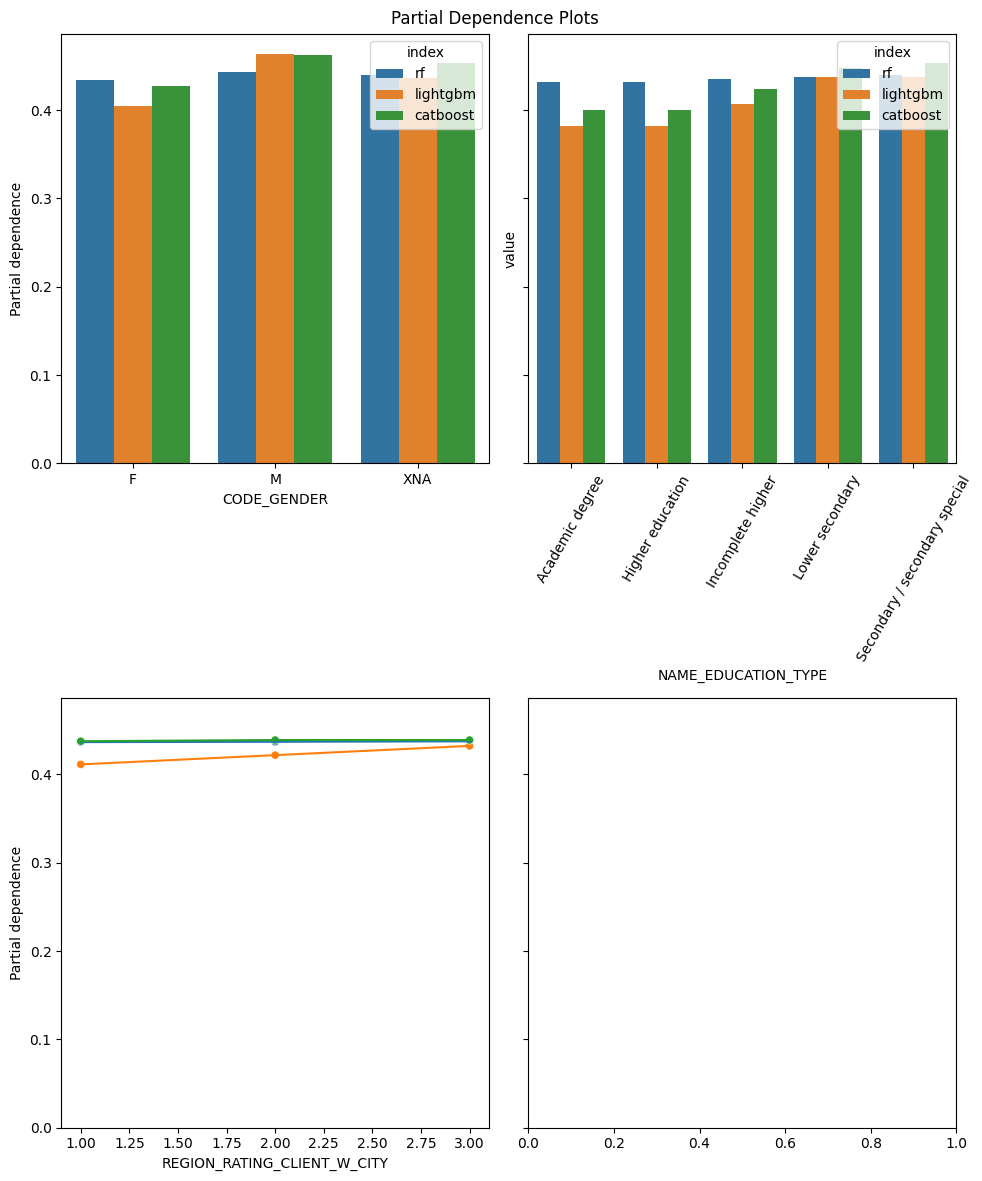

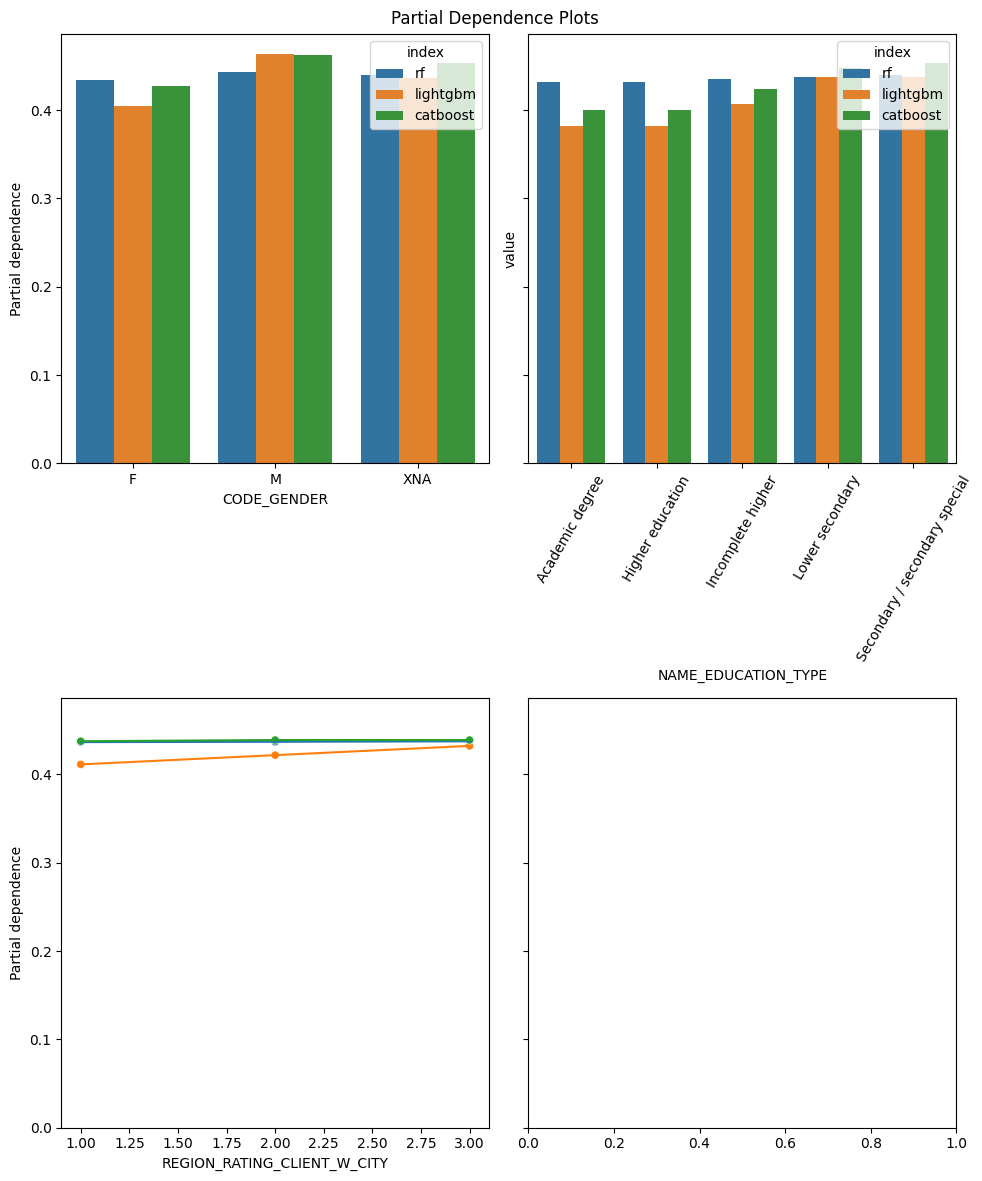

In [510]:
bias_sensitive_cols = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT_W_CITY'] #'REGION_RATING_CLIENT' dropped due to correlation analysis
fig = get_all_partial_dependence_plots(experiment_name='UNDERSAMPLE', bias_sensitive_cols=bias_sensitive_cols, grid_search_rf=grid_search_experiment_2_rf, grid_search_lightgbm=grid_search_experiment_2_lightgbm, grid_search_catboost=grid_search_experiment_2_catboost)

plotting...
partial dependency plot for rf created
partial dependency plot for lightgbm created
partial dependency plot for catboost created
plotting...
partial dependency plot for rf created
partial dependency plot for lightgbm created
partial dependency plot for catboost created
plotting...
partial dependency plot for rf created
partial dependency plot for lightgbm created
partial dependency plot for catboost created


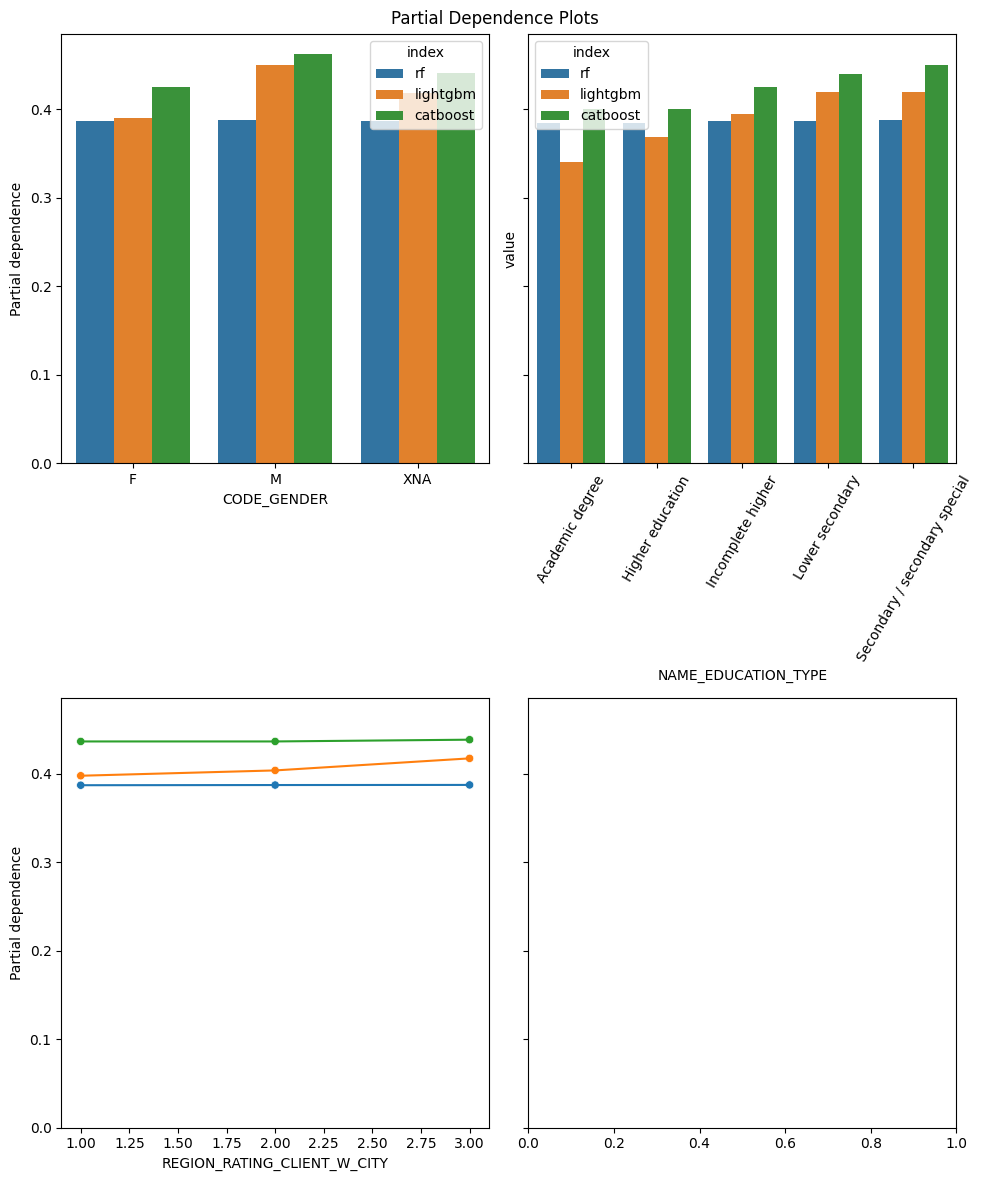

In [505]:
#https://towardsdatascience.com/how-to-tune-hyperparameters-of-machine-learning-models-a82589d48fc8
#look at this for how to build cool graphs
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py
#this as well
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)
included_cols = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT_W_CITY'] #'REGION_RATING_CLIENT' dropped due to correlation analysis
n_cols = 2
n_rows = int(math.ceil(len(included_cols)/n_cols))
#src: https://towardsdatascience.com/partial-dependence-plots-with-scikit-learn-966ace4864fc
summary = {}

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10,12), sharey=True)
for i, x in enumerate(included_cols):
  print("plotting...")
  # make dataframe
  # summary[x] = pd.DataFrame(columns=values)
  raw_values = partial_dependence(grid_search_experiment_1_rf.best_estimator_, X_test, x, kind='average')
  print("partial dependency plot for rf created")
  summary[x] = pd.DataFrame(columns=raw_values['values'][0])
  # load in partial_dependency_per_model
  summary[x].loc['rf'] = raw_values['average'][0]
  summary[x].loc['lightgbm'] = partial_dependence(
      grid_search_experiment_1_lightgbm.best_estimator_, X, x, kind='average'
  )['average'][0]
  print("partial dependency plot for lightgbm created")
  summary[x].loc['catboost'] = partial_dependence(
      grid_search_experiment_1_catboost.best_estimator_, X_test, x, kind='average'
  )['average'][0]
  print("partial dependency plot for catboost created")
  data = summary[x].reset_index().melt('index')
  loc = i//n_cols, i%n_cols
  if x=='CODE_GENDER' or x=='NAME_EDUCATION_TYPE':
    sns.barplot(data=data, x='variable', y='value', 
                   hue='index',ax=ax[loc]);
  elif i==1:
      sns.lineplot(data=data, x='variable', y='value', 
                   hue='index',ax=ax[loc]);
      ax[loc].legend(bbox_to_anchor=(1, 1));
      sns.scatterplot(data=data, x='variable', y='value', 
                  hue='index', ax=ax[loc], legend=False)
  else: 
      sns.lineplot(data=data, x='variable', y='value', 
                   hue='index', ax=ax[loc], legend=False);
      sns.scatterplot(data=data, x='variable', y='value', 
                  hue='index', ax=ax[loc], legend=False)
  if x=='NAME_EDUCATION_TYPE':
    ax[loc].set_xticklabels(ax[loc].get_xticklabels(), rotation=60)

  ax[loc].set_xlabel(x)
  if i%n_cols==0:
      ax[loc].set_ylabel('Partial dependence')
fig.suptitle('Partial Dependence Plots')
fig.tight_layout()


In [ ]:
grid_search = grid_search_LIGHTGBM
best_estimator = grid_search.best_estimator_
y_pred = pd.Series(best_estimator.predict(X_test))
y_true = y_test
eod = compute_equality_of_opportunity_difference('CODE_GENDER', X_test['CODE_GENDER'], 'F', 'M', y_true, y_pred)

In [ ]:
grid_search.best_params_
#apply some kind of bias correction and retrain using the same param

#then re-evaluate the model

In [ ]:
#google_drive_root = '/content/'

In [ ]:
grid_search_LIGHTGBM = 1

### Saving results

In [ ]:
import datetime
import os

if not ('results' in os.listdir()):
  os.mkdir("./results")
current_dir = os.getcwd()
current_time = datetime.datetime.now().strftime("%d-%m-%Y_%H;%M;%S")
directory = "results/test_" + current_time
path = os.path.join(current_dir, directory)
# os.listdir(current_results_folder)
os.mkdir(path)
from joblib import dump, load
dump(grid_search_LIGHTGBM, path + '/gridsearch_LIGHTGBM.joblib')
# dump(grid_search_CATBOOST, new_results_folder + 'gridsearch_CATBOOST.joblib')
# dump(grid_search_RF, new_results_folder + 'gridsearch_RF.joblib')


### Reloading results

In [ ]:
active_results_folder = root_folder_path + "test_07-06-2023_19:15:20"

In [ ]:
grid_search_LIGHTGBM = load(active_results_folder + 'gridsearch_LIGHTGBM.joblib')
grid_search_CATBOOST = load(active_results_folder + 'gridsearch_CATBOOST.joblib')
grid_search_CATBOOST = load(active_results_folder + 'gridsearch_RF.joblib')